## Pellet and Meal Analysis and Distribution

In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
from preprocessing import get_all_sheet_names, read_excel_by_sheet

ctrl_path = '../reversal_ctrl.xlsx'
cask_path = '../reversal_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)

time_threshold = 60
pellet_threshold = 2

### Control Group

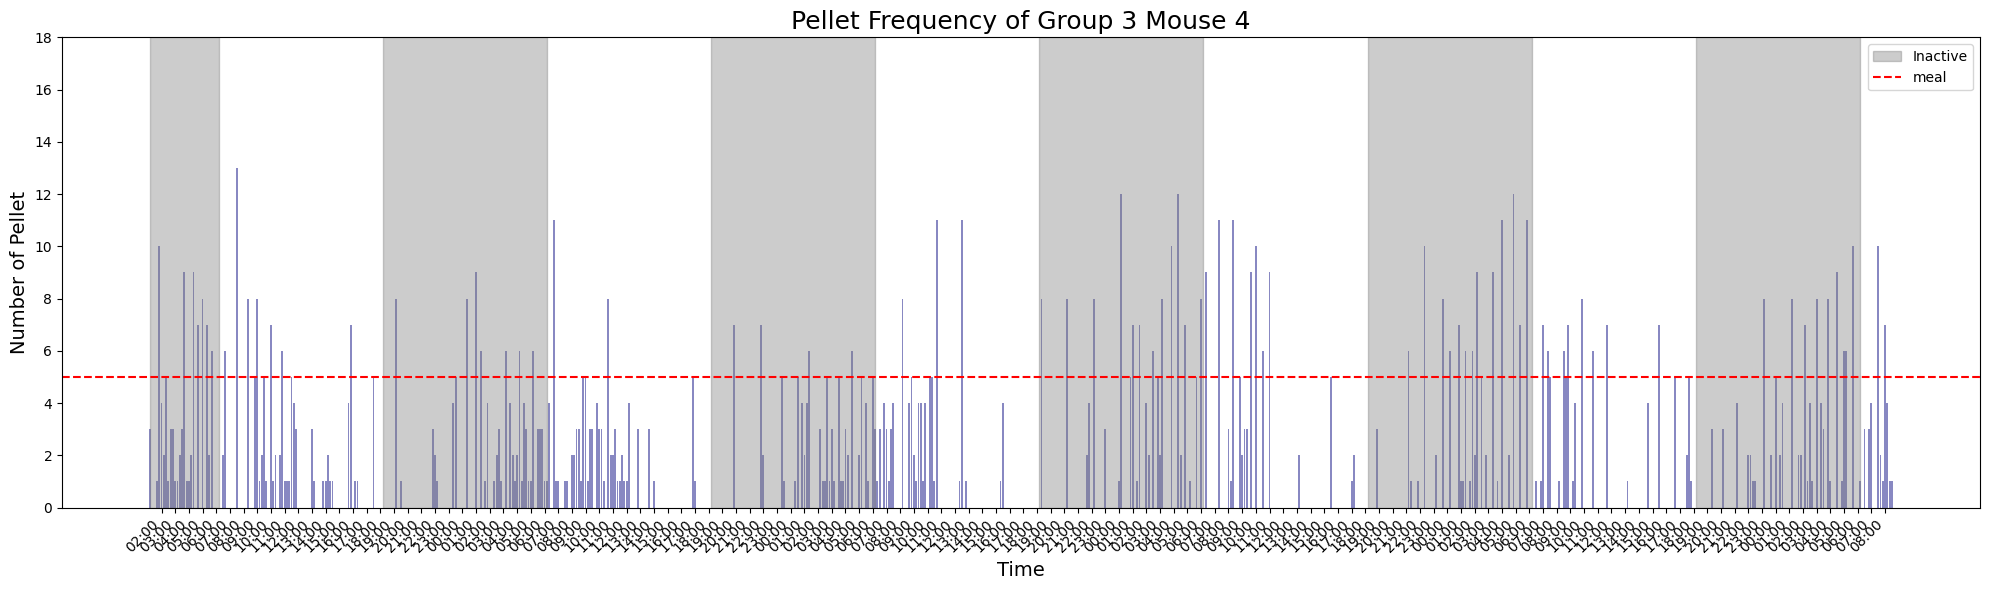

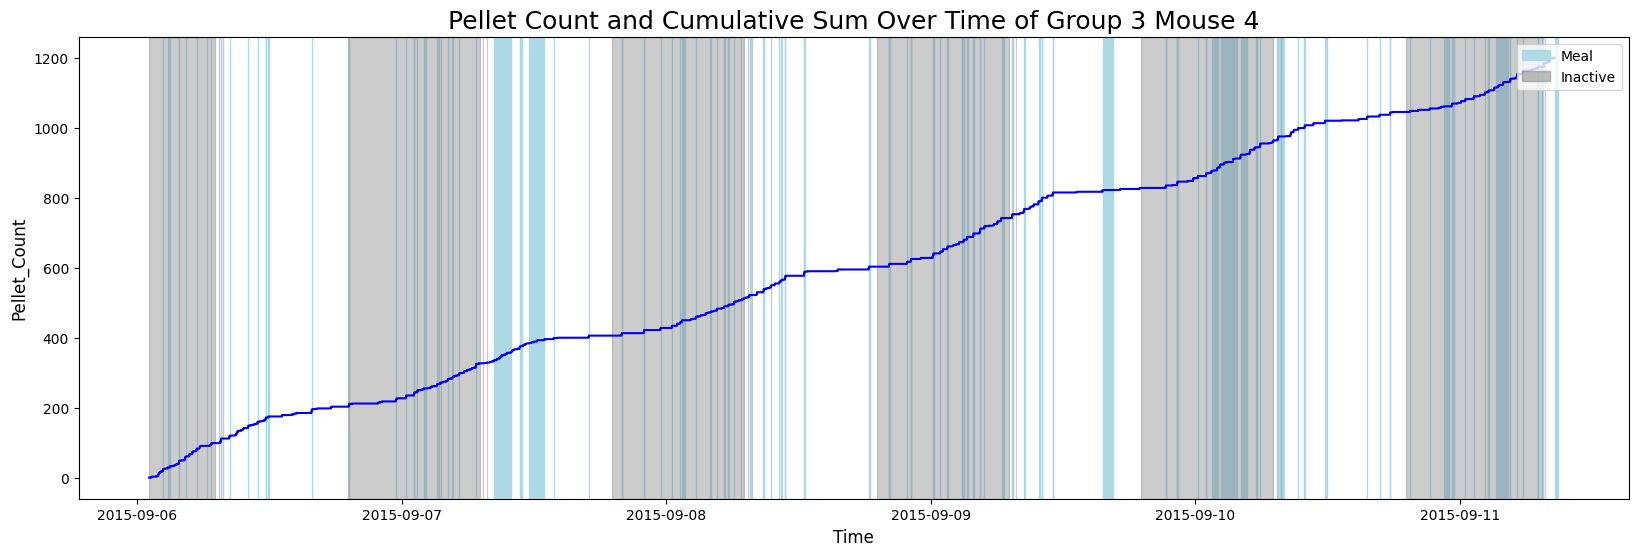

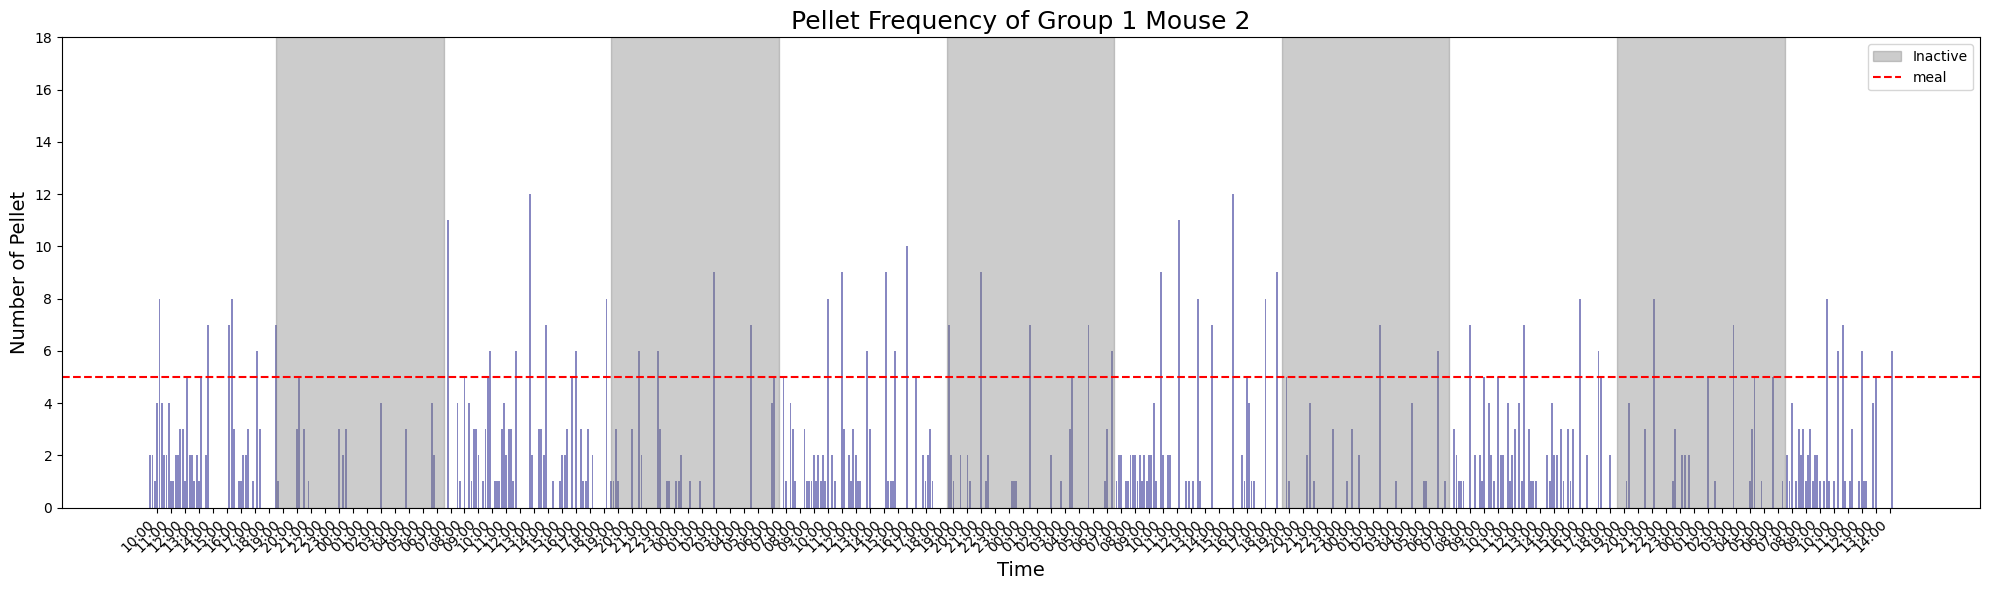

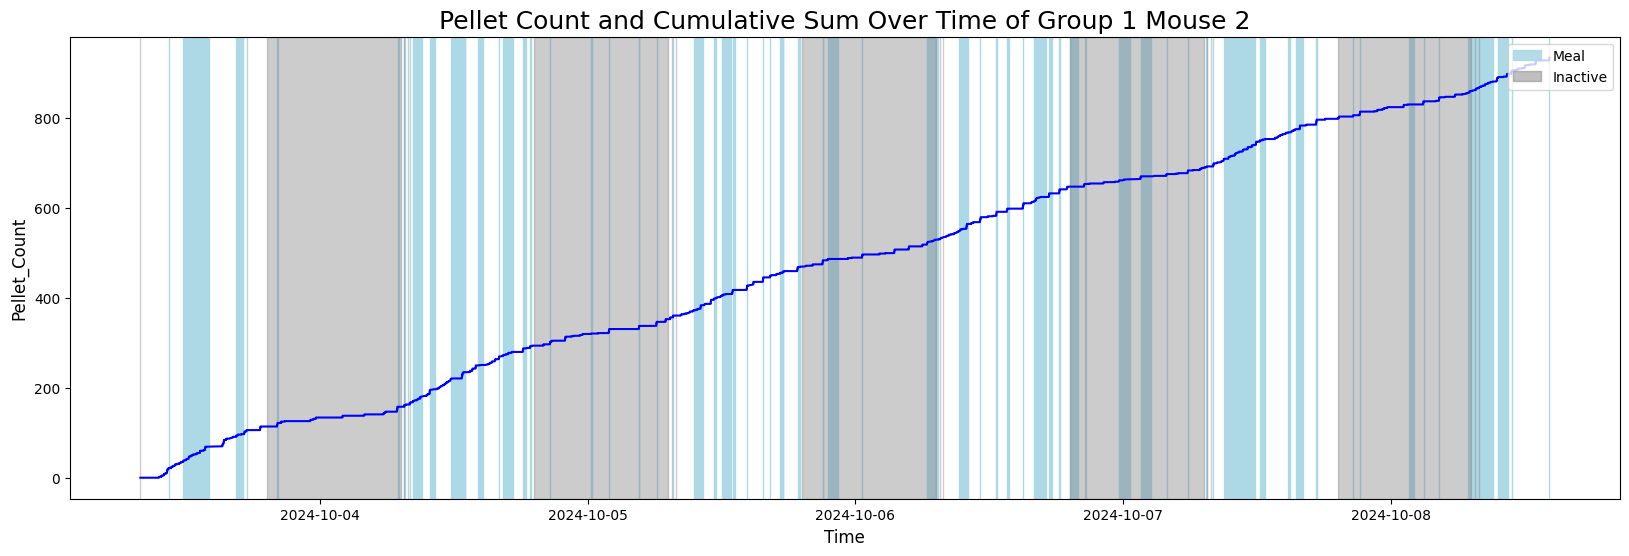

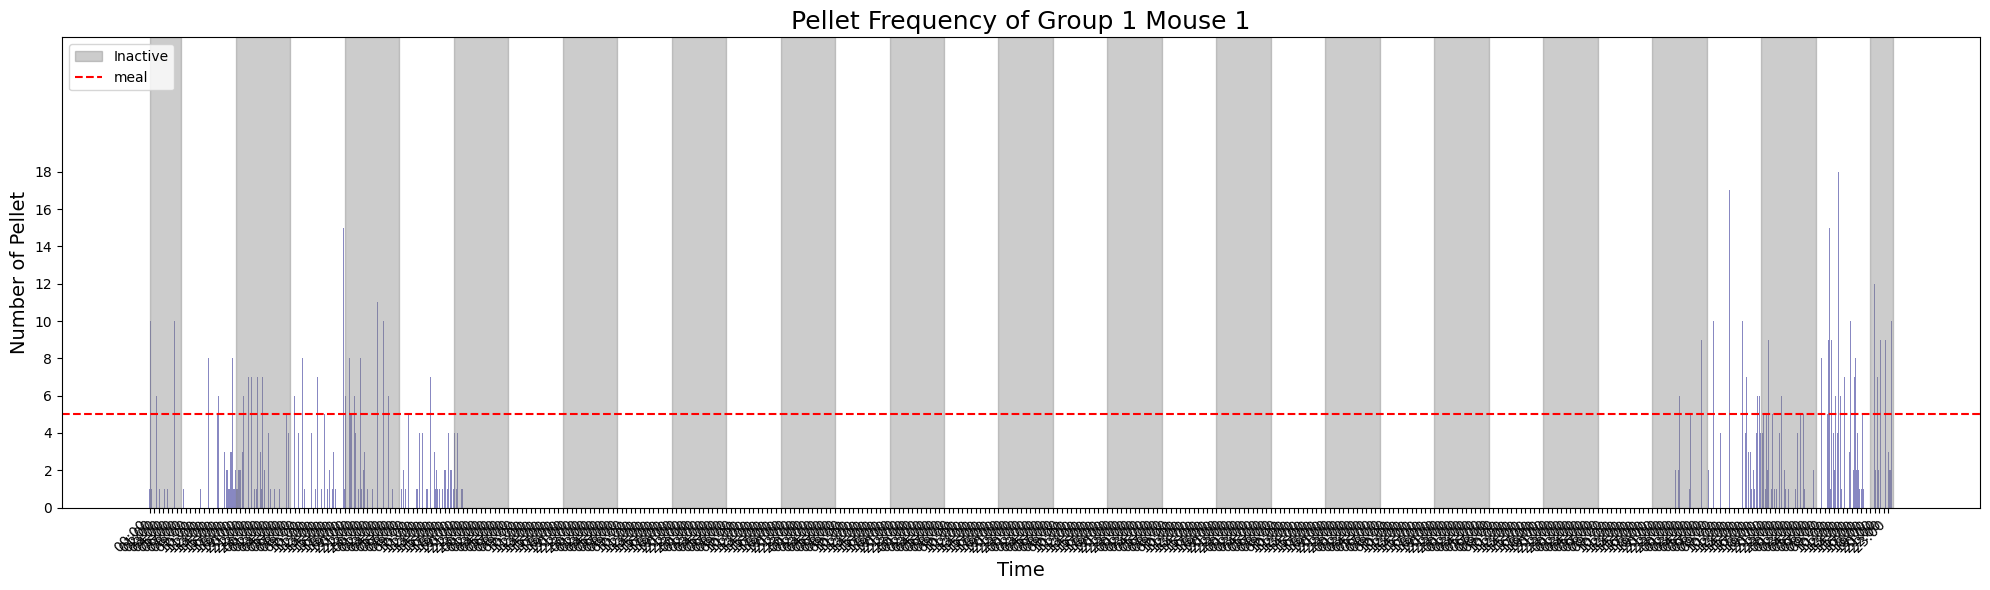

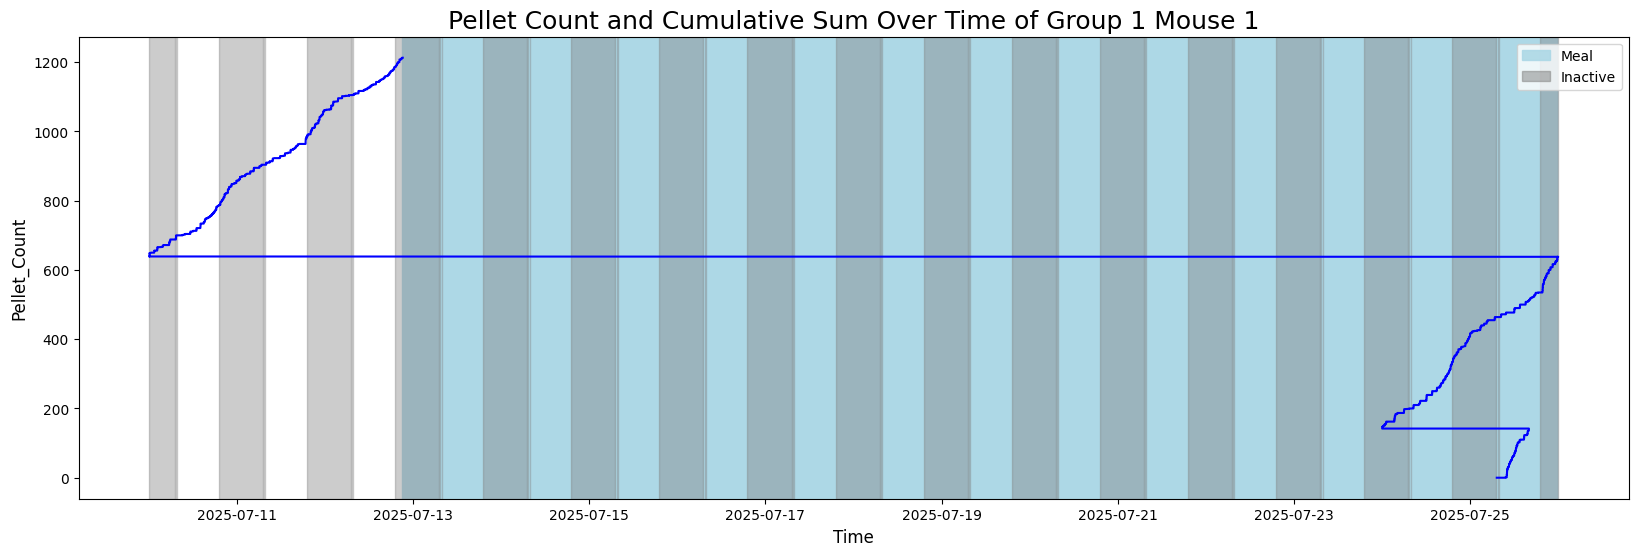

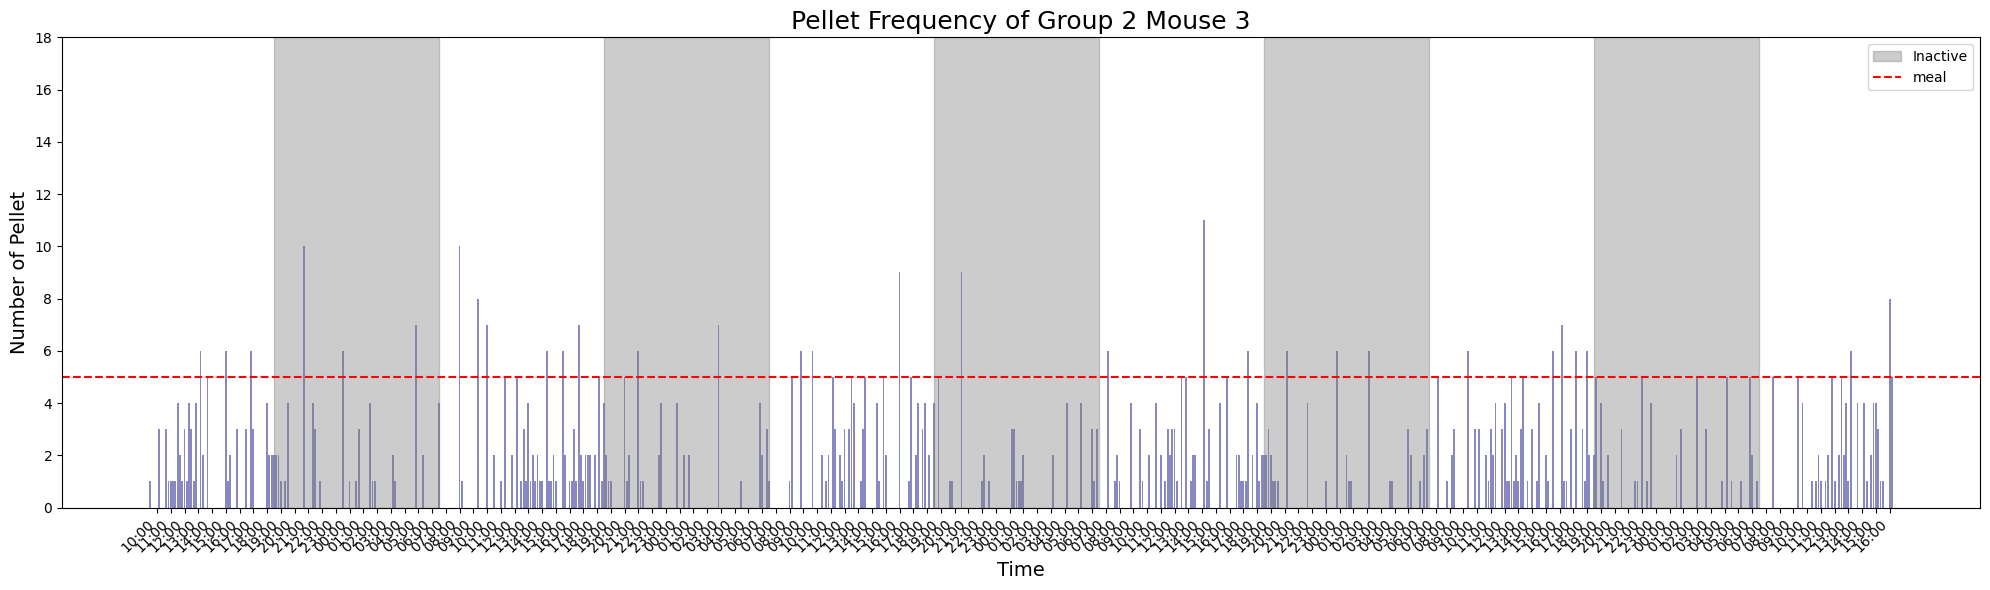

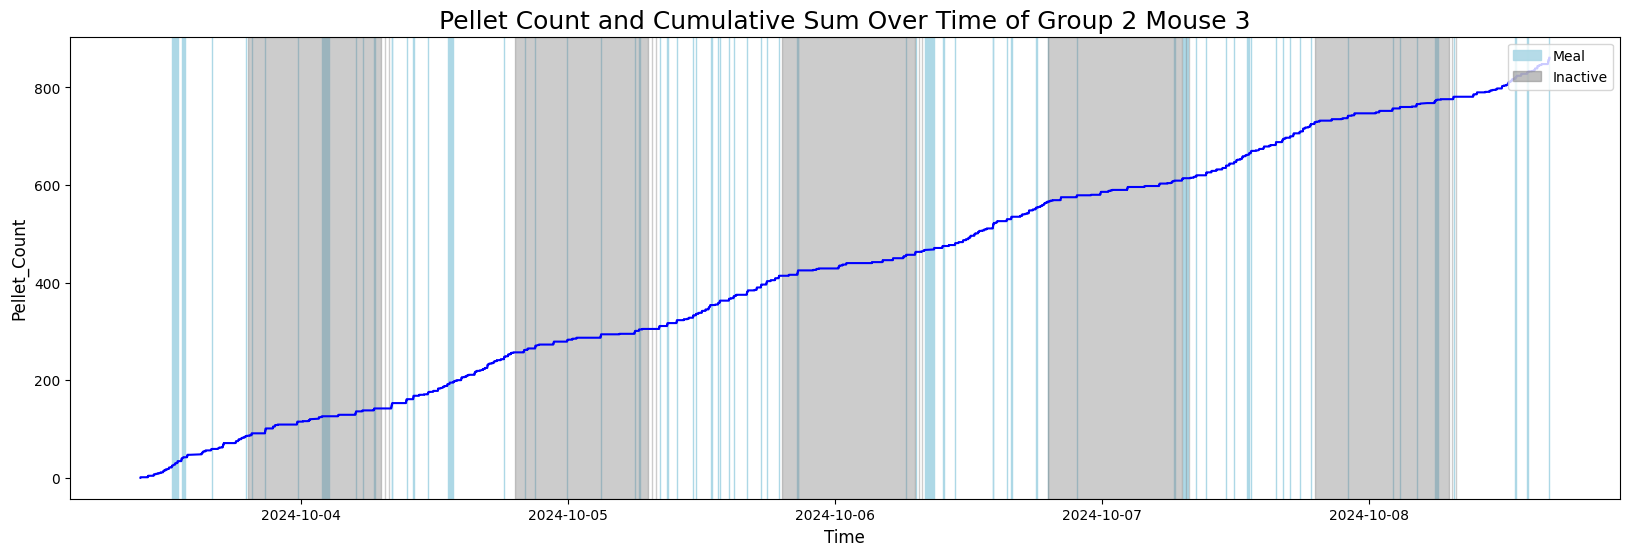

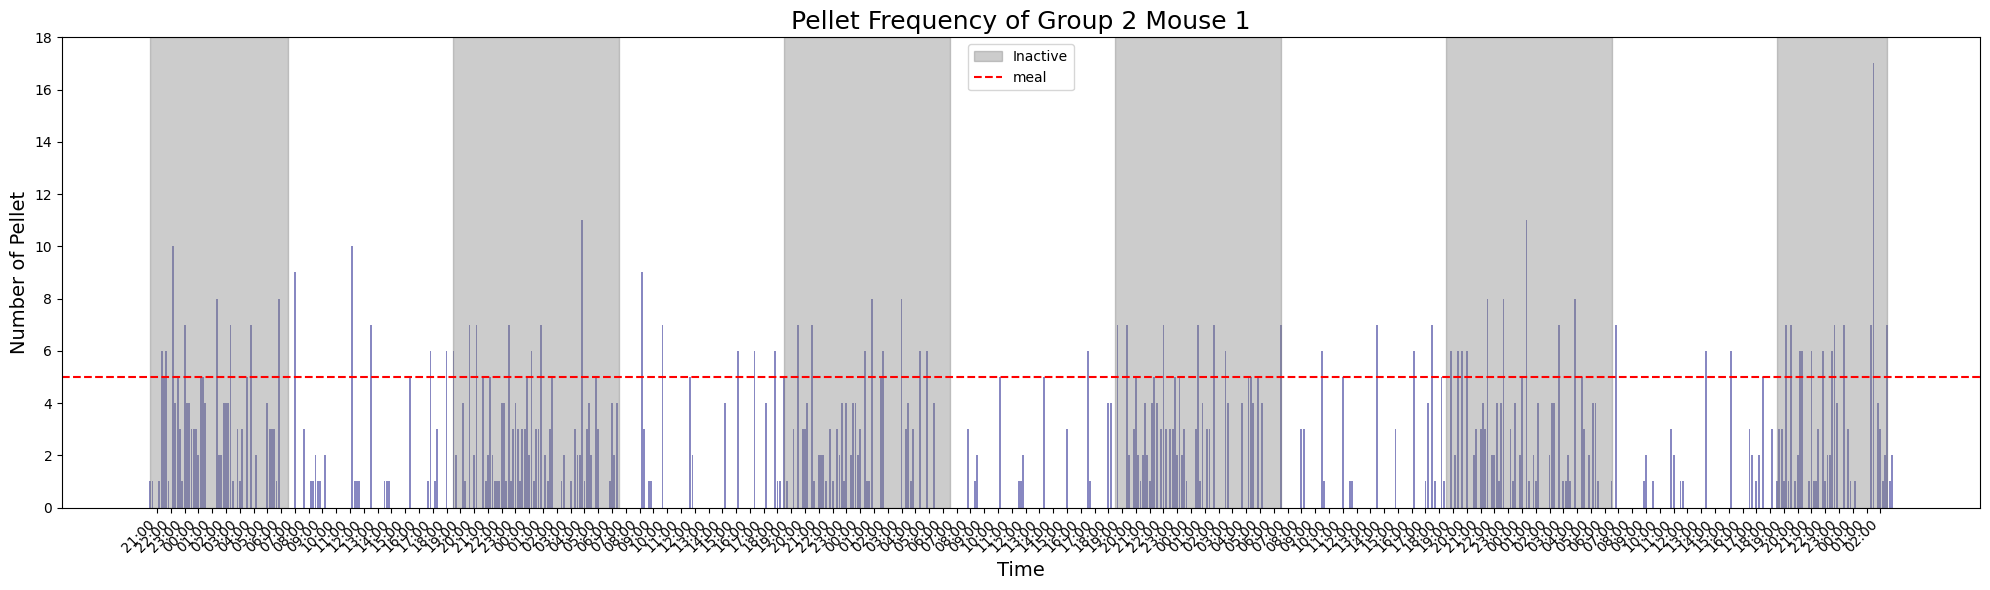

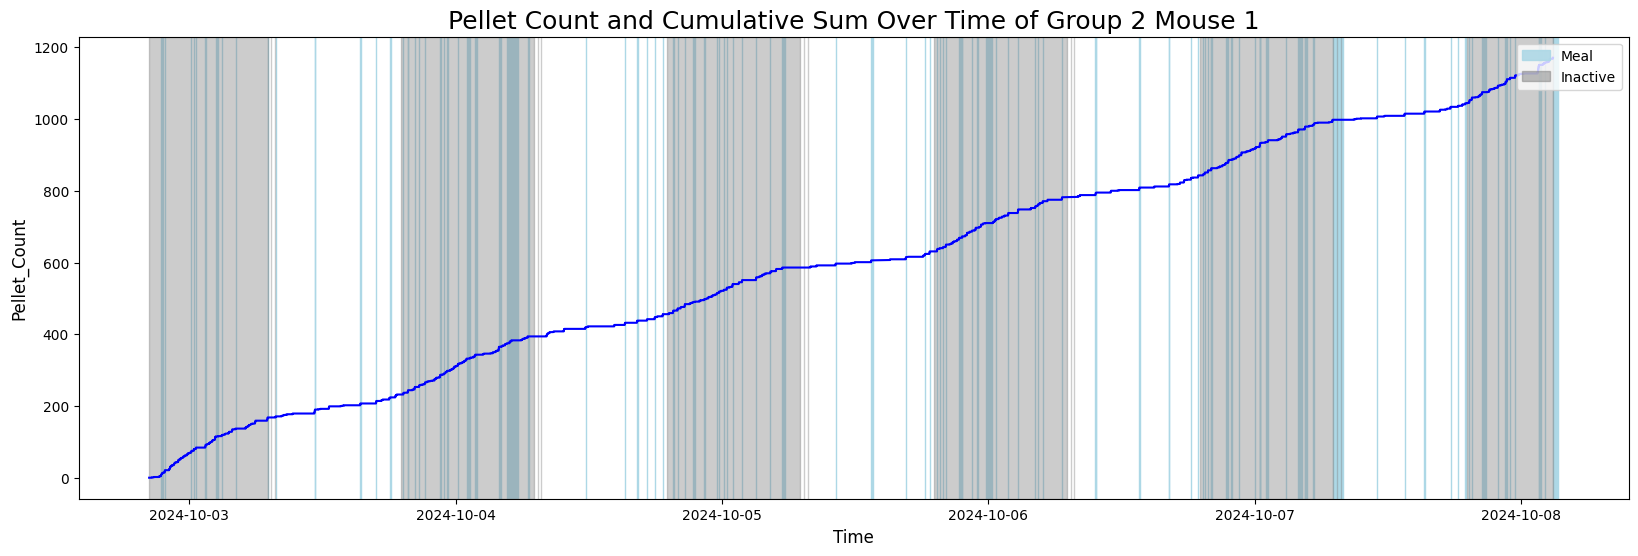

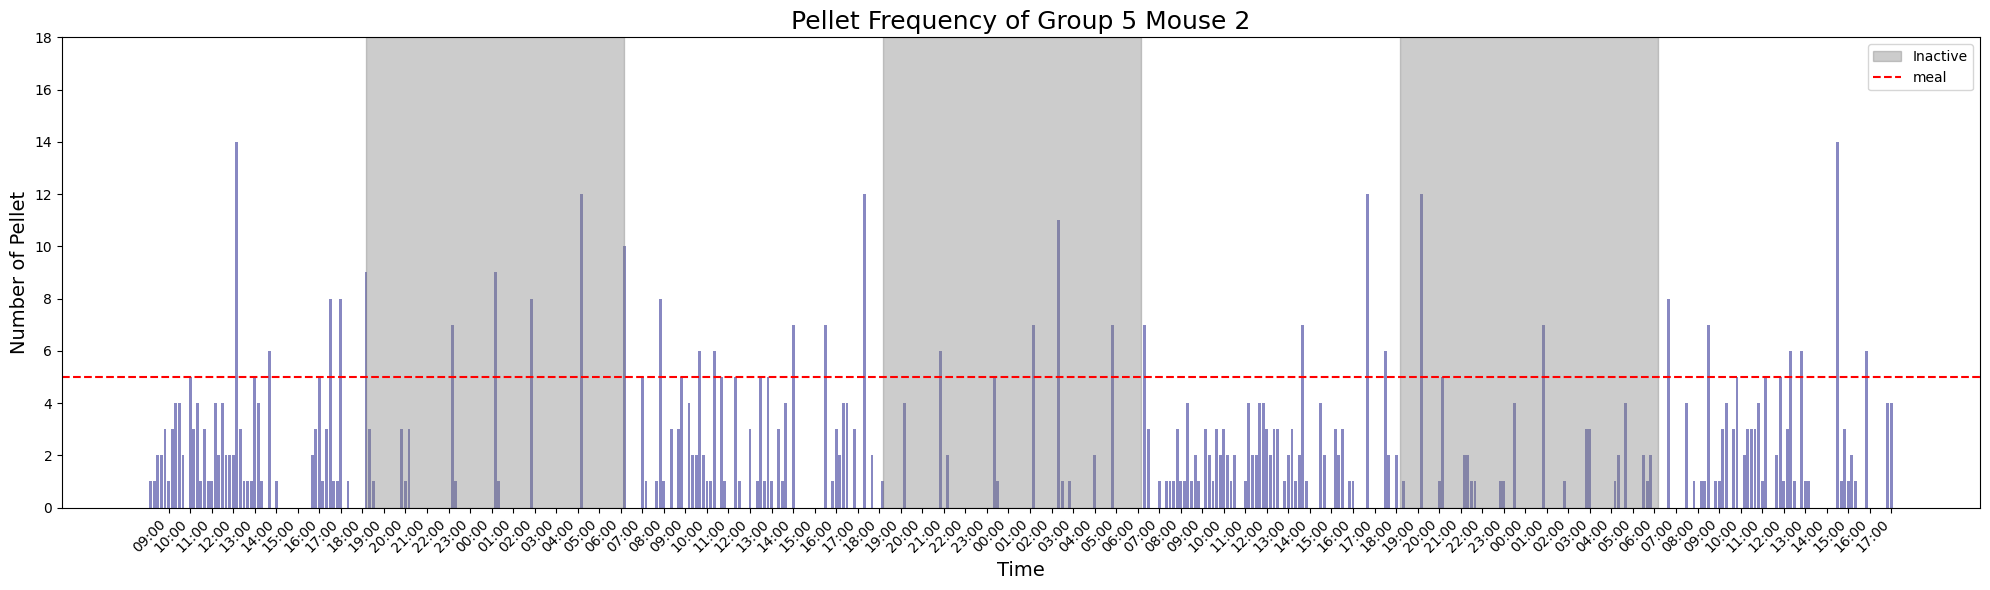

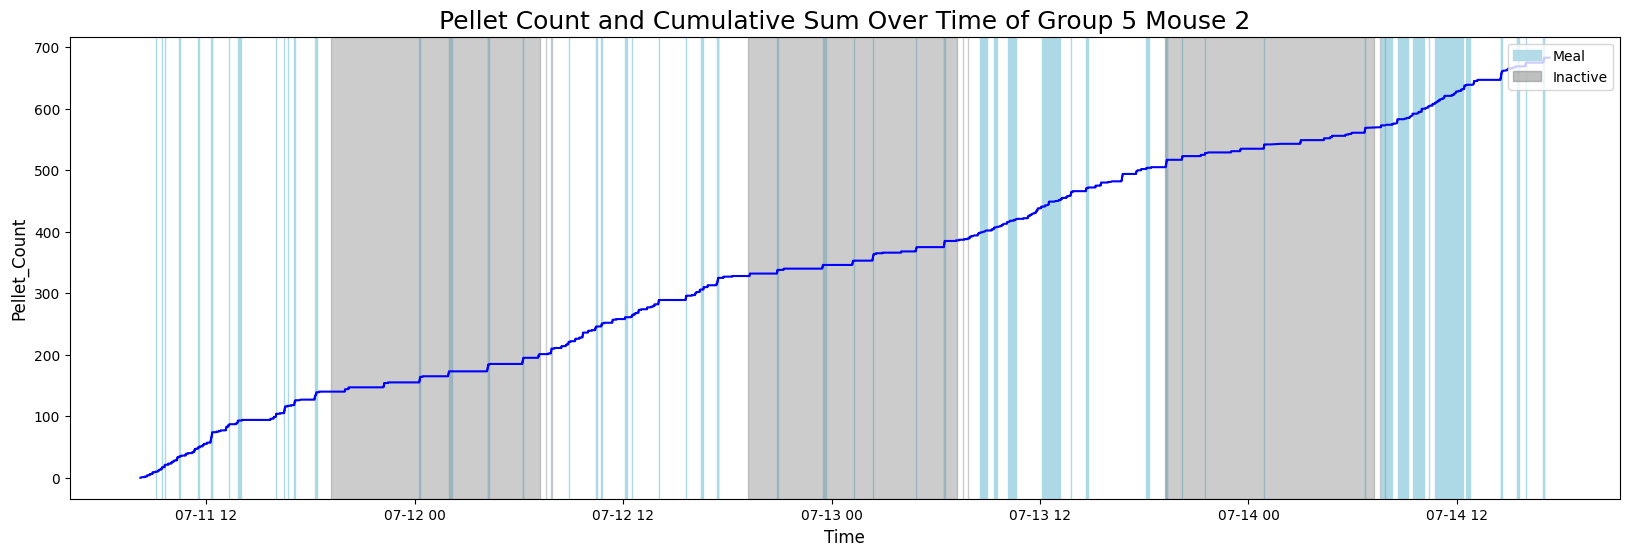

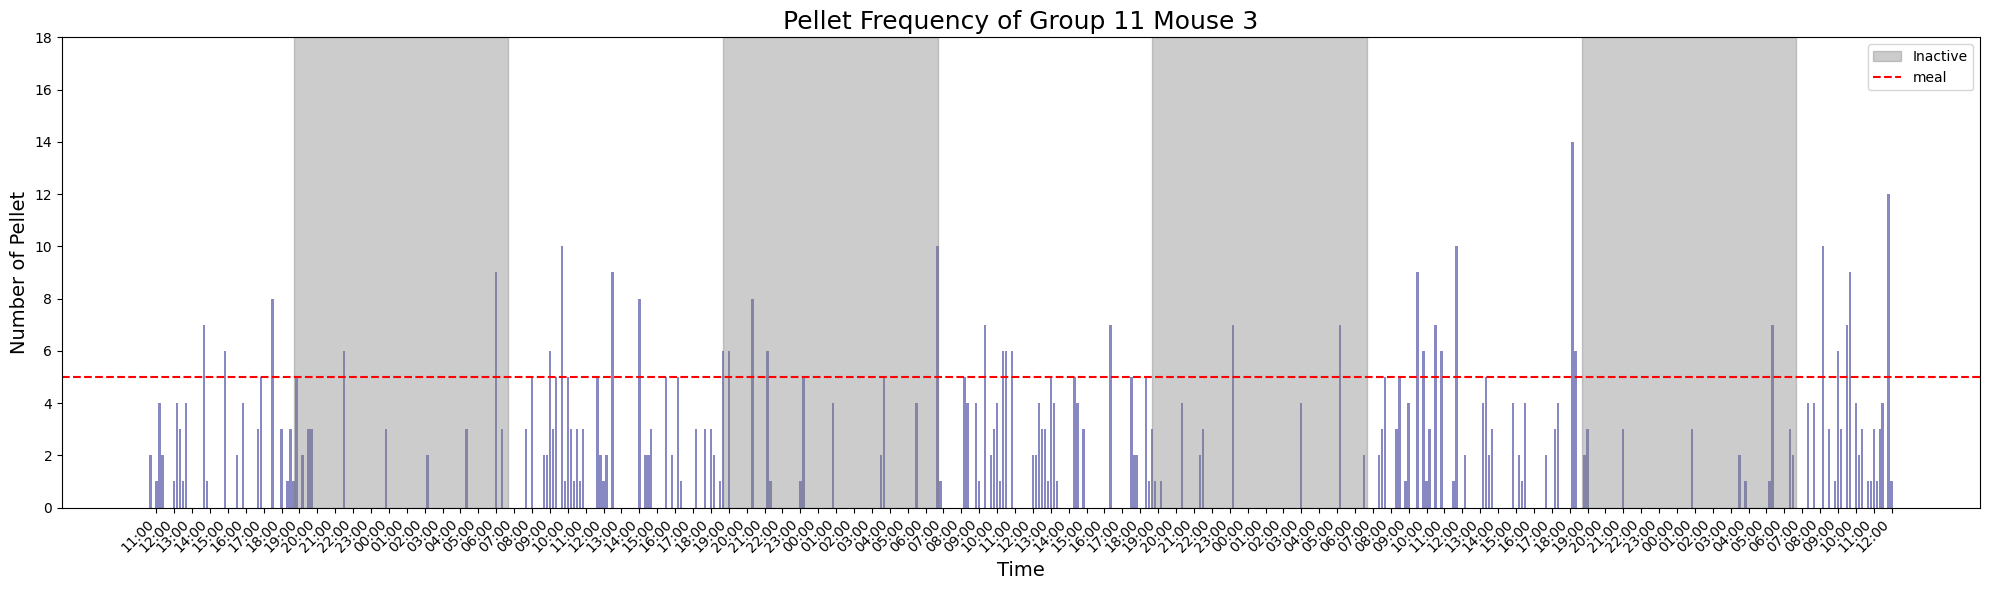

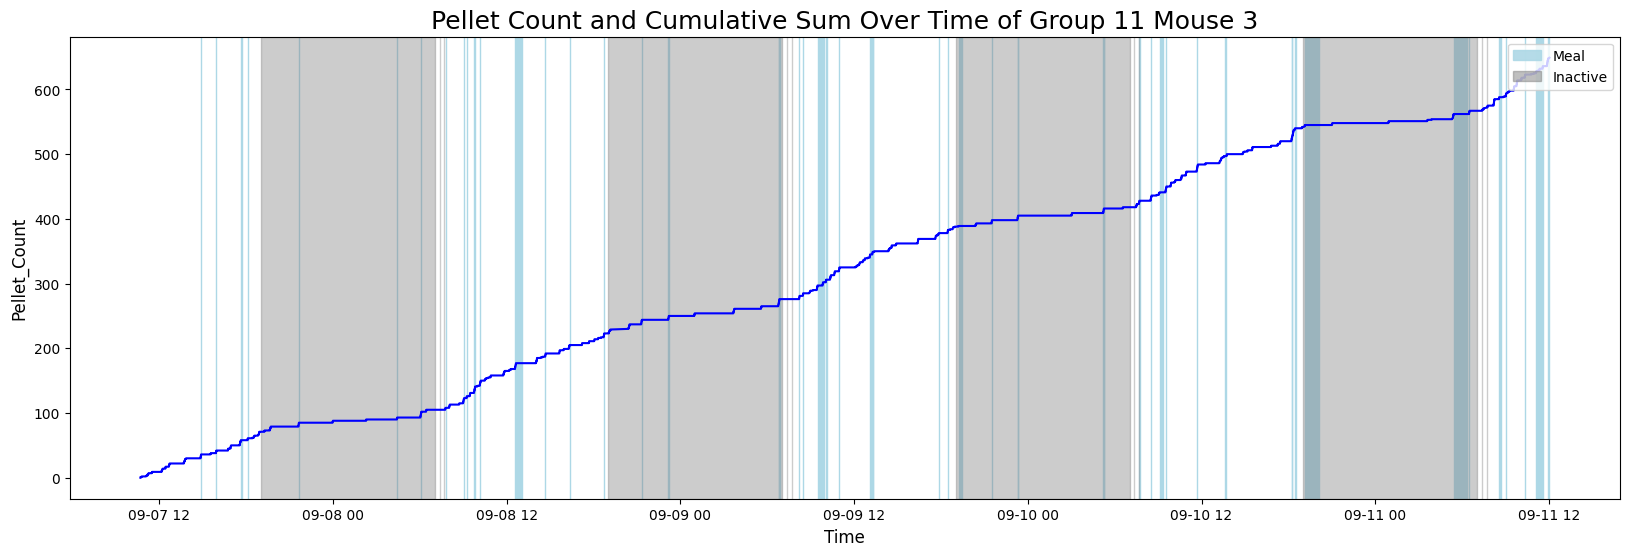

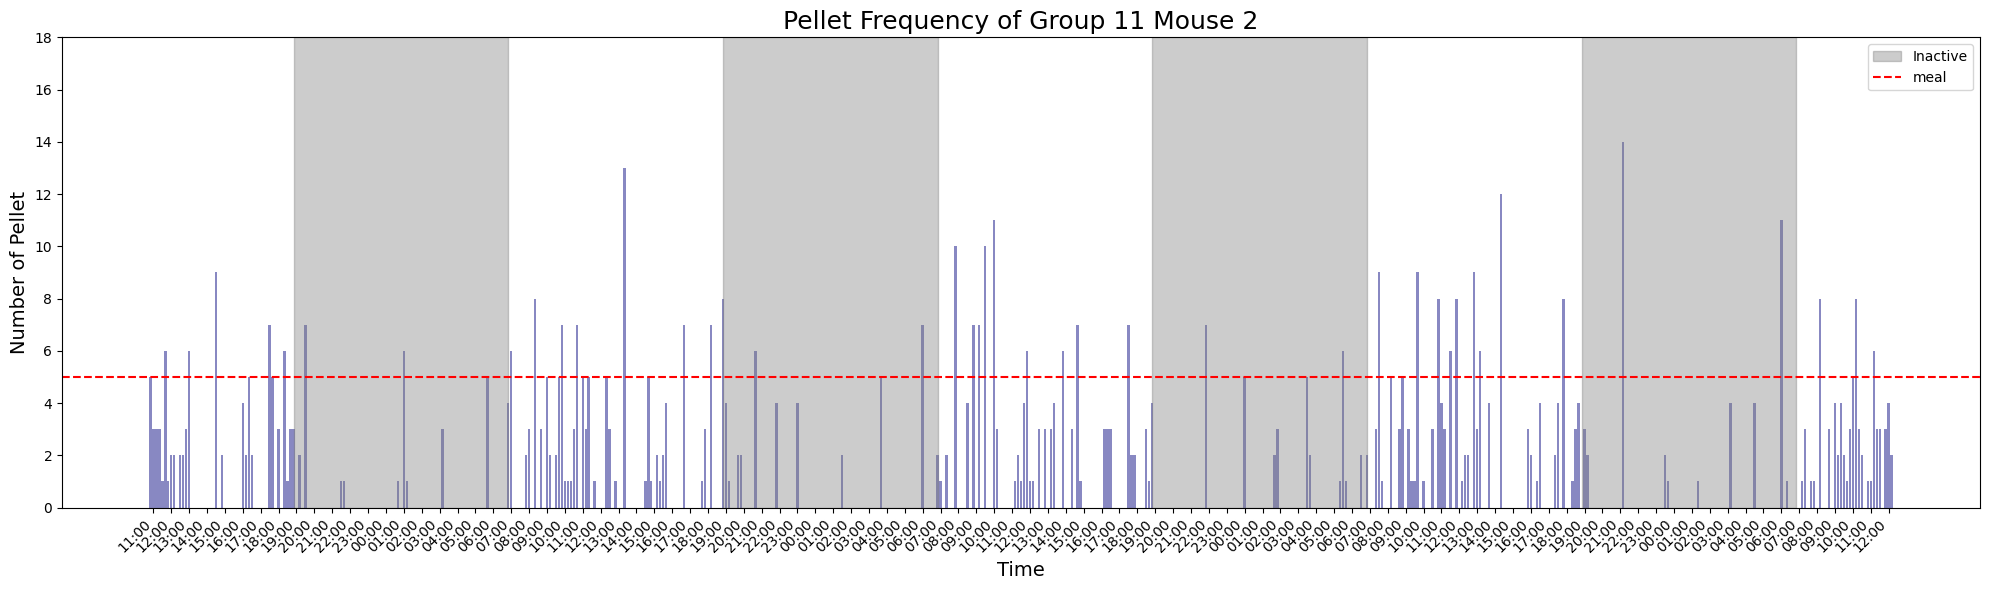

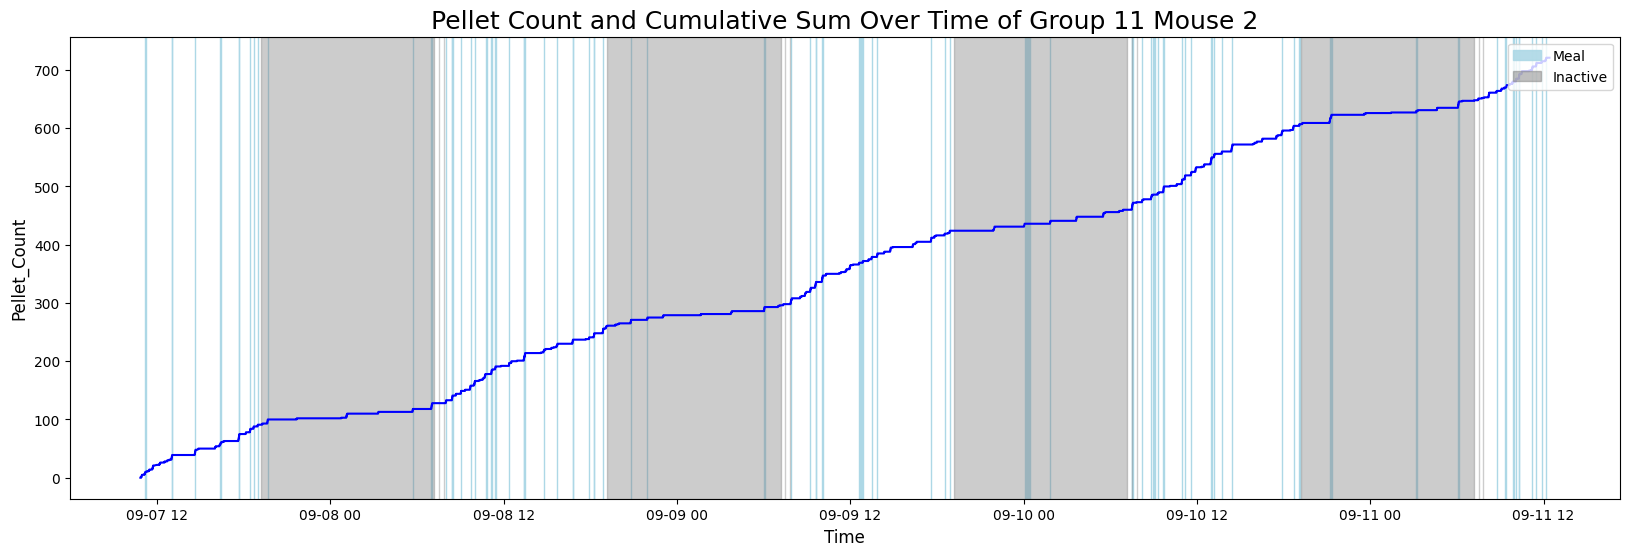

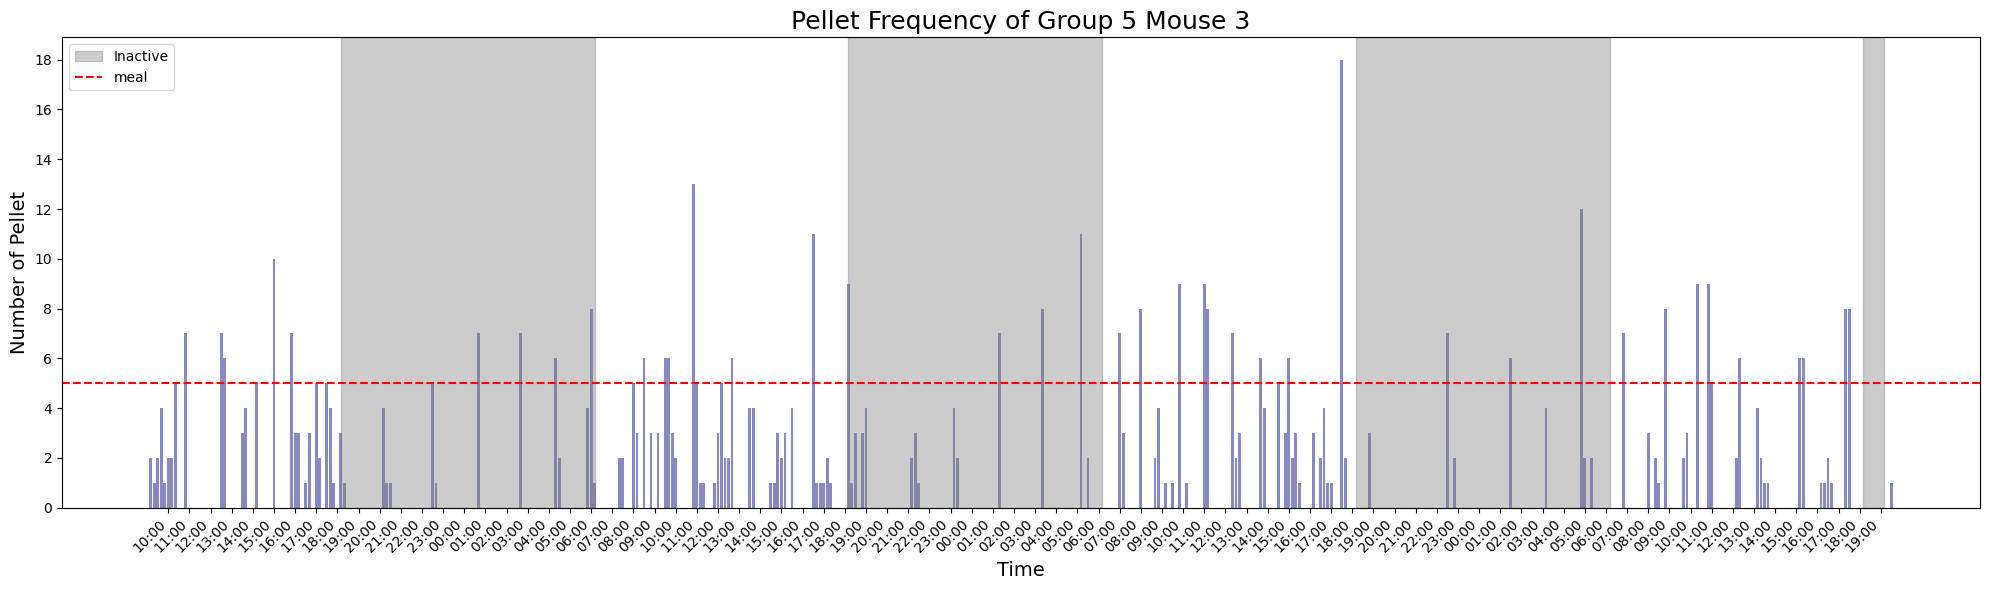

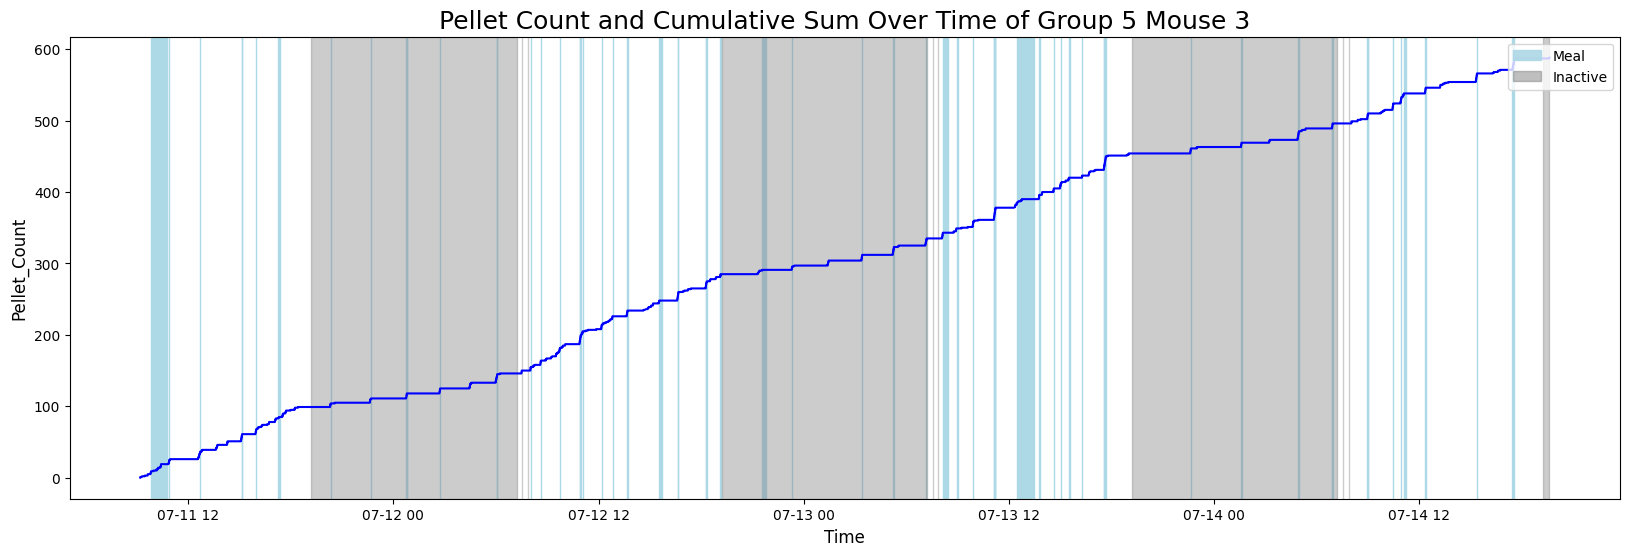

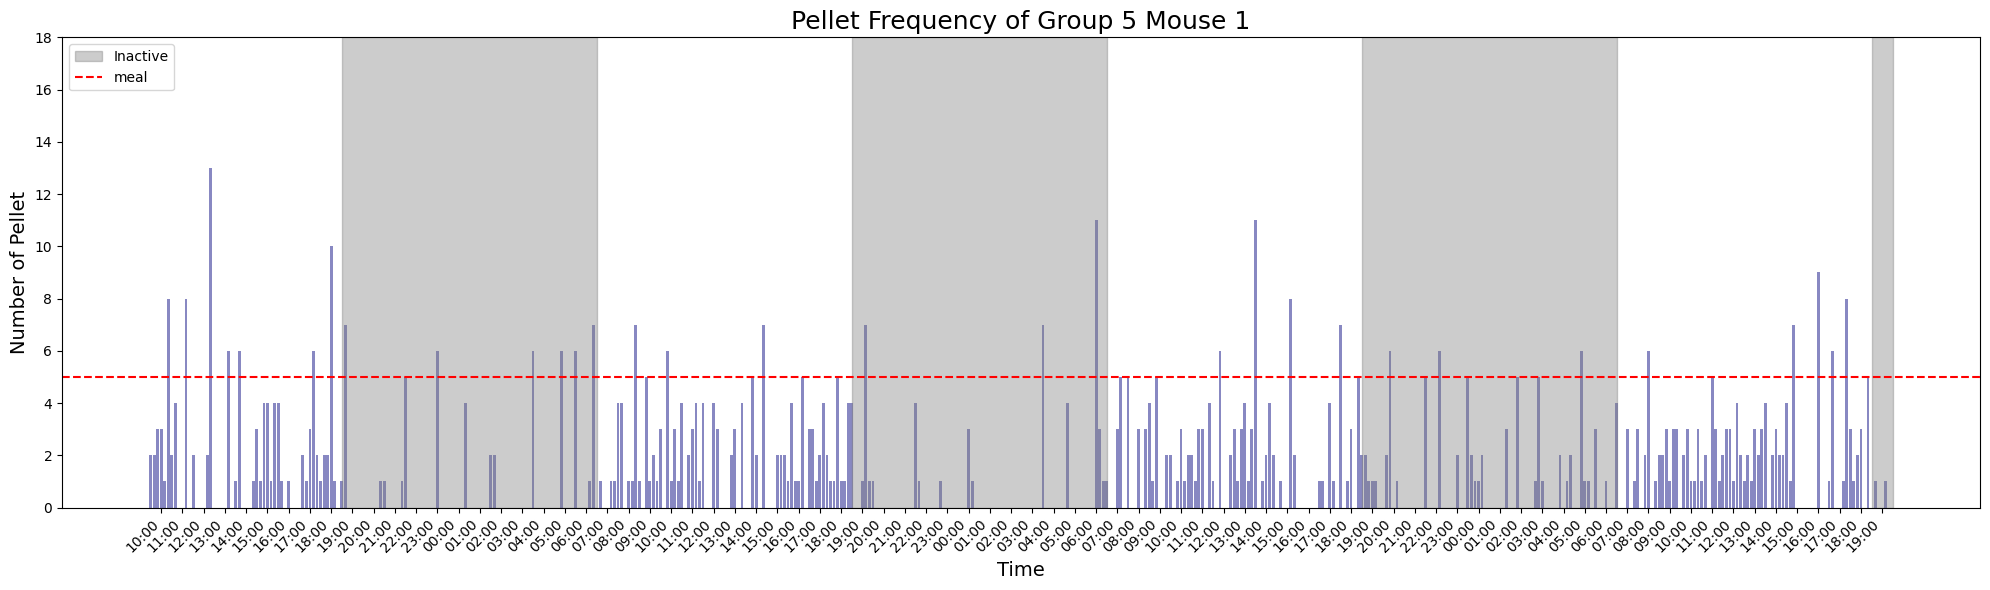

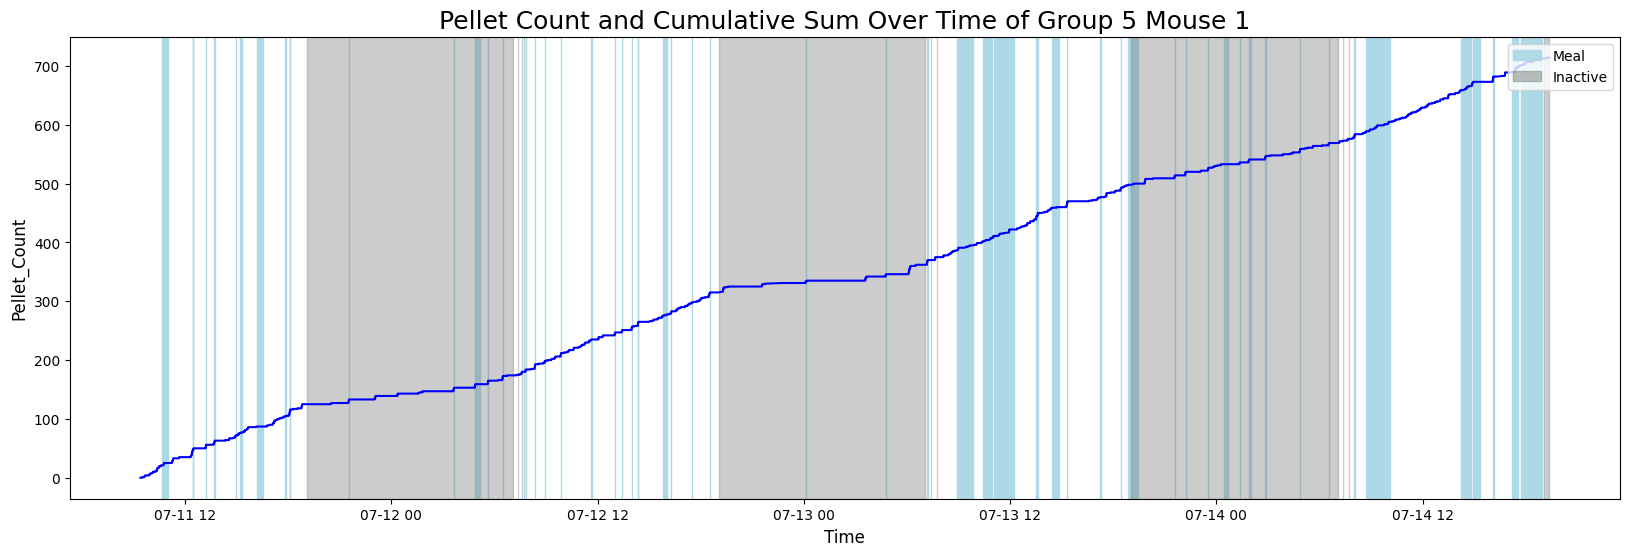

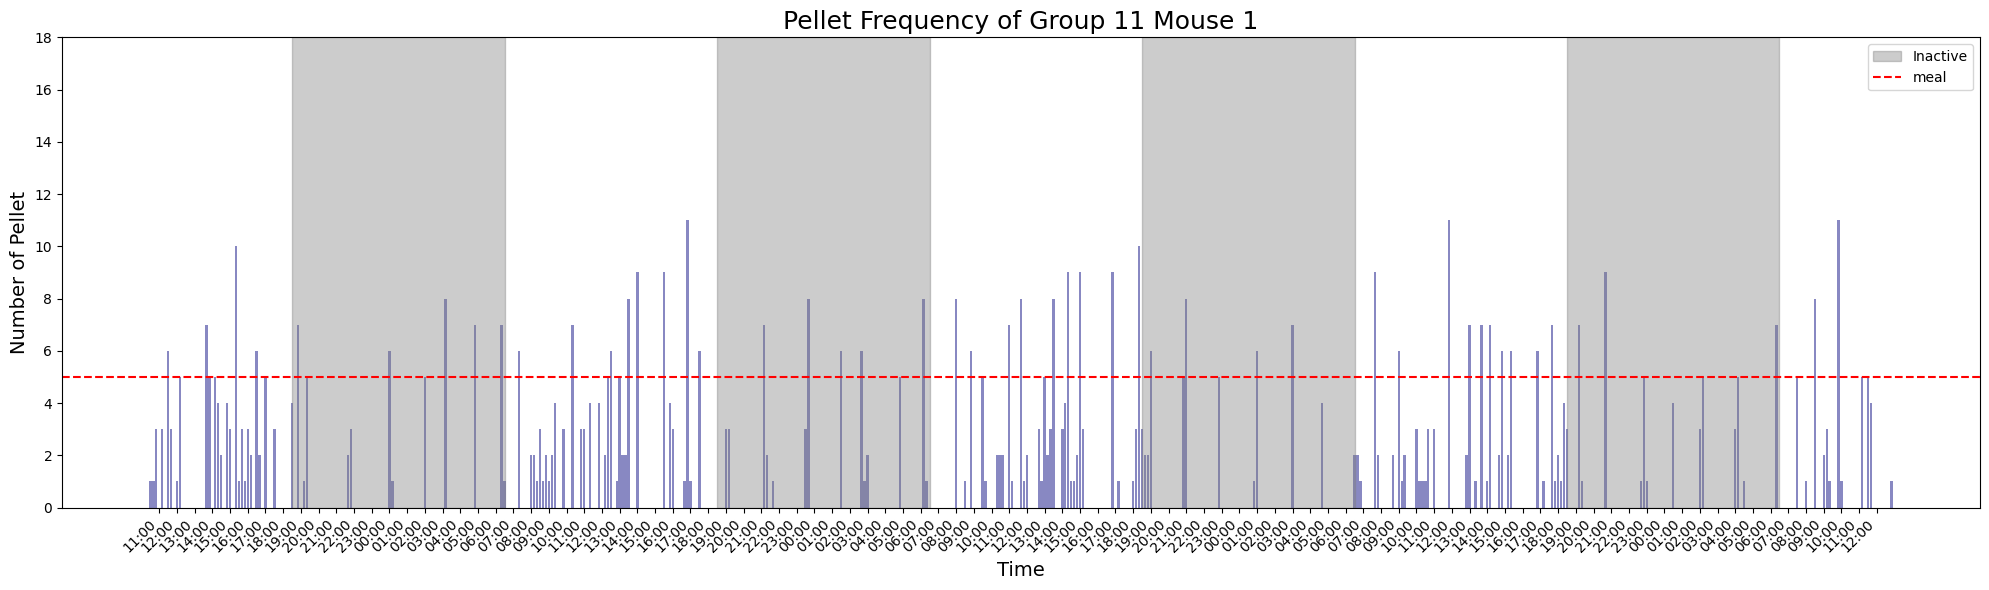

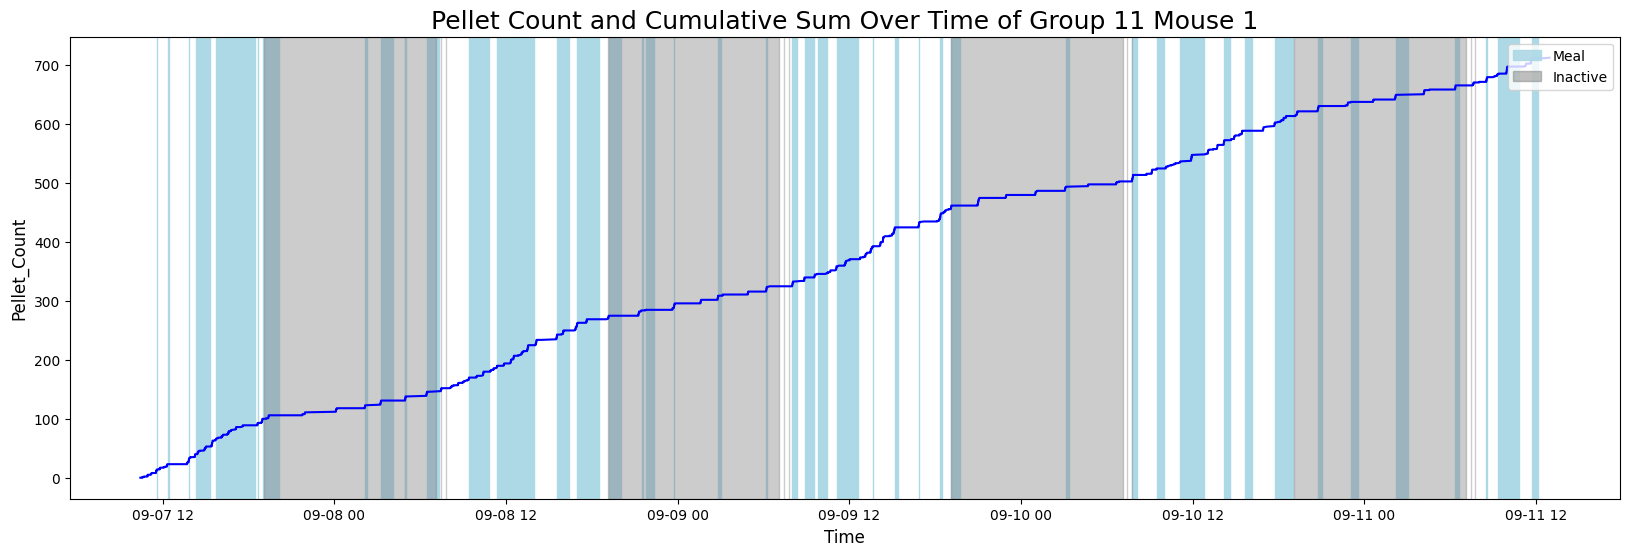

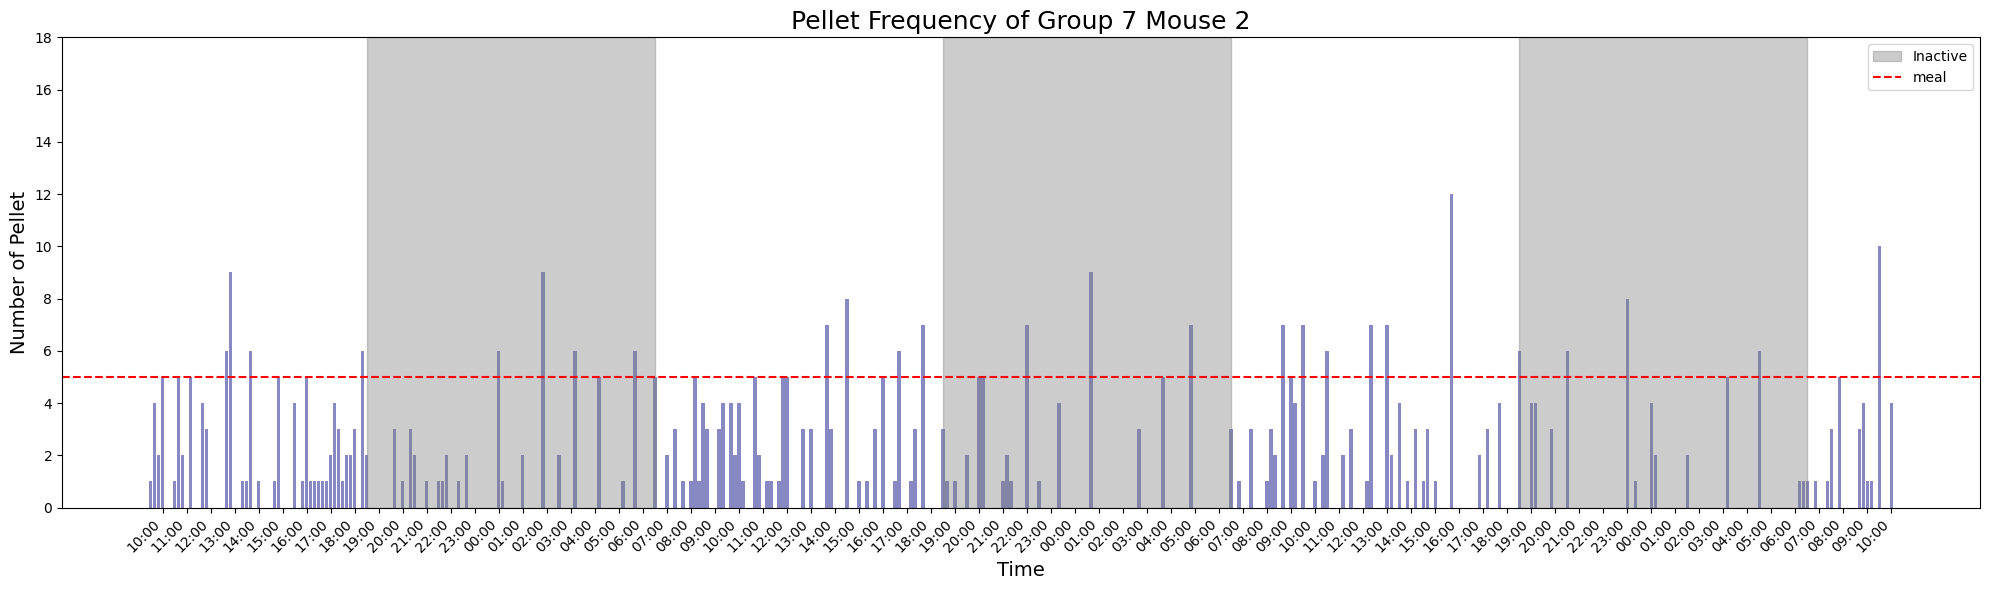

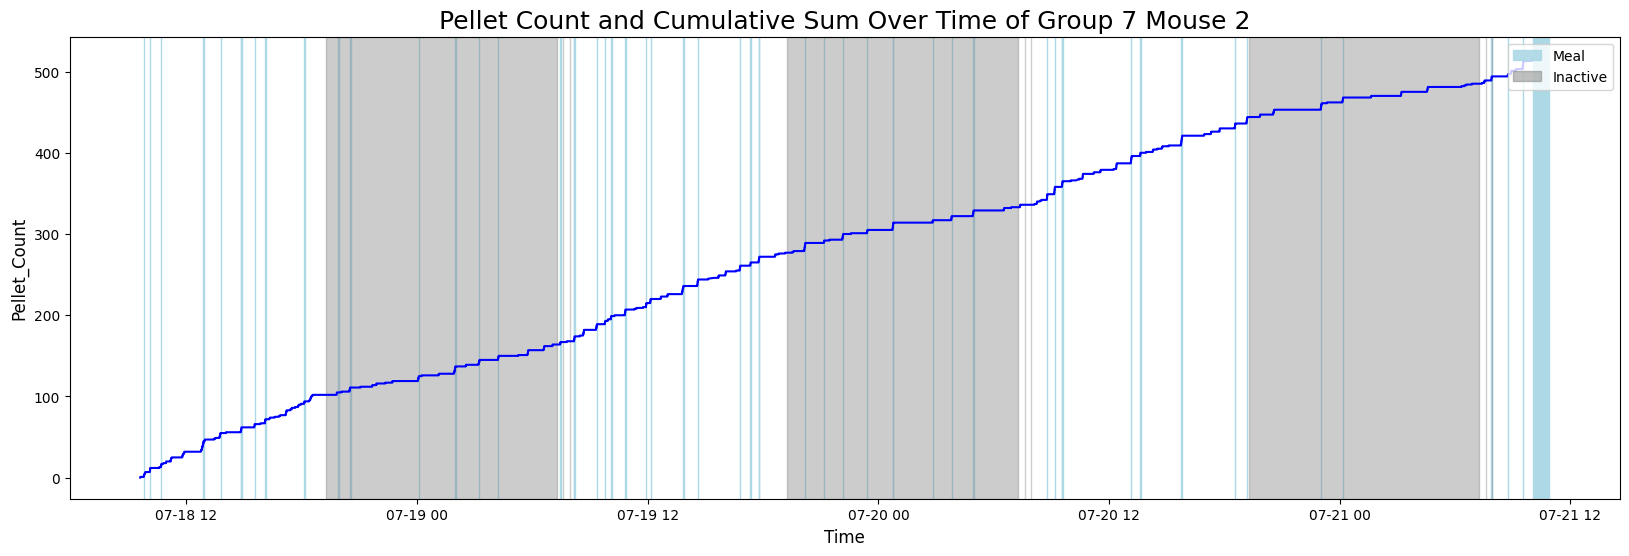

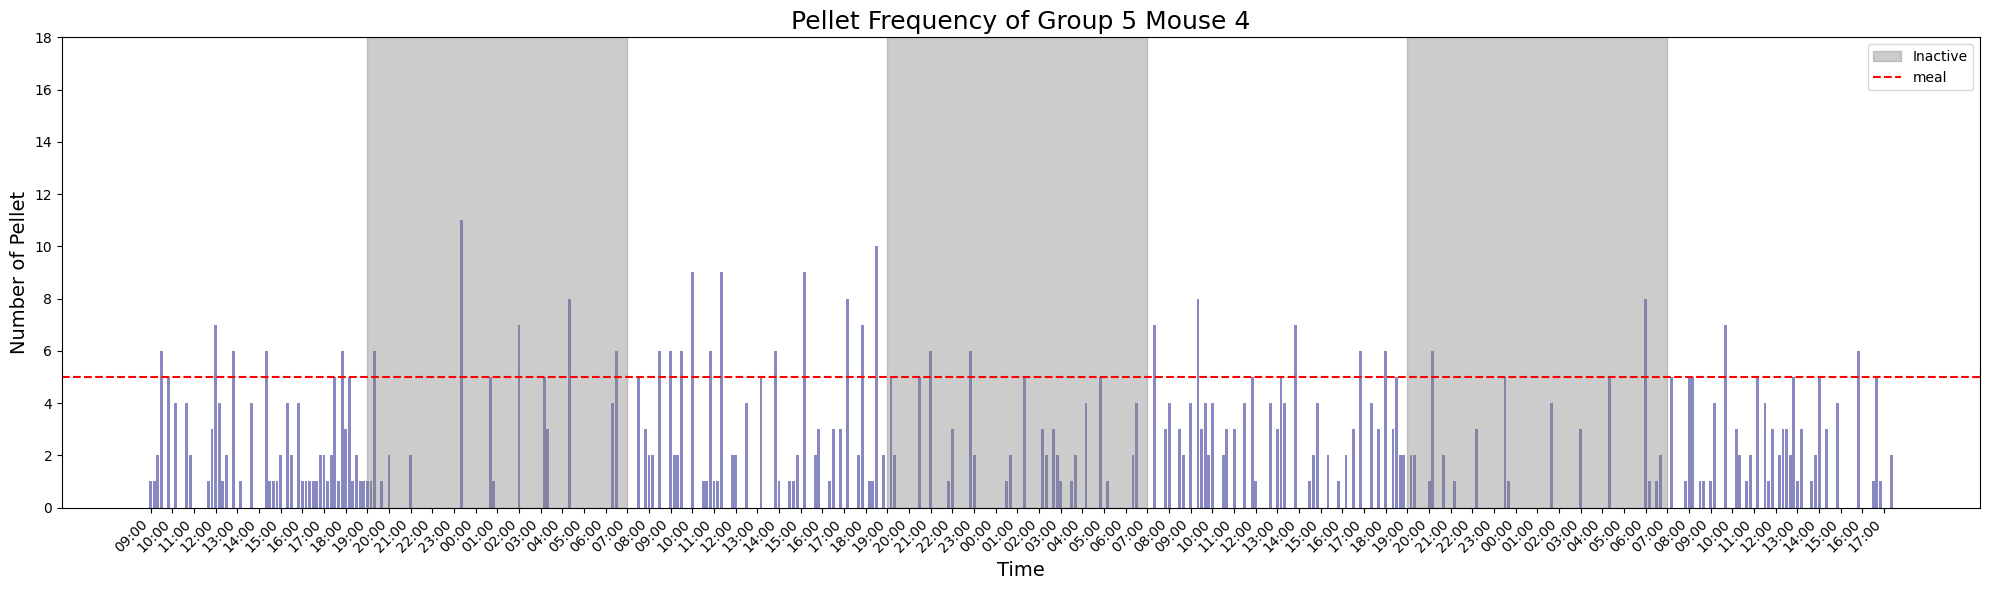

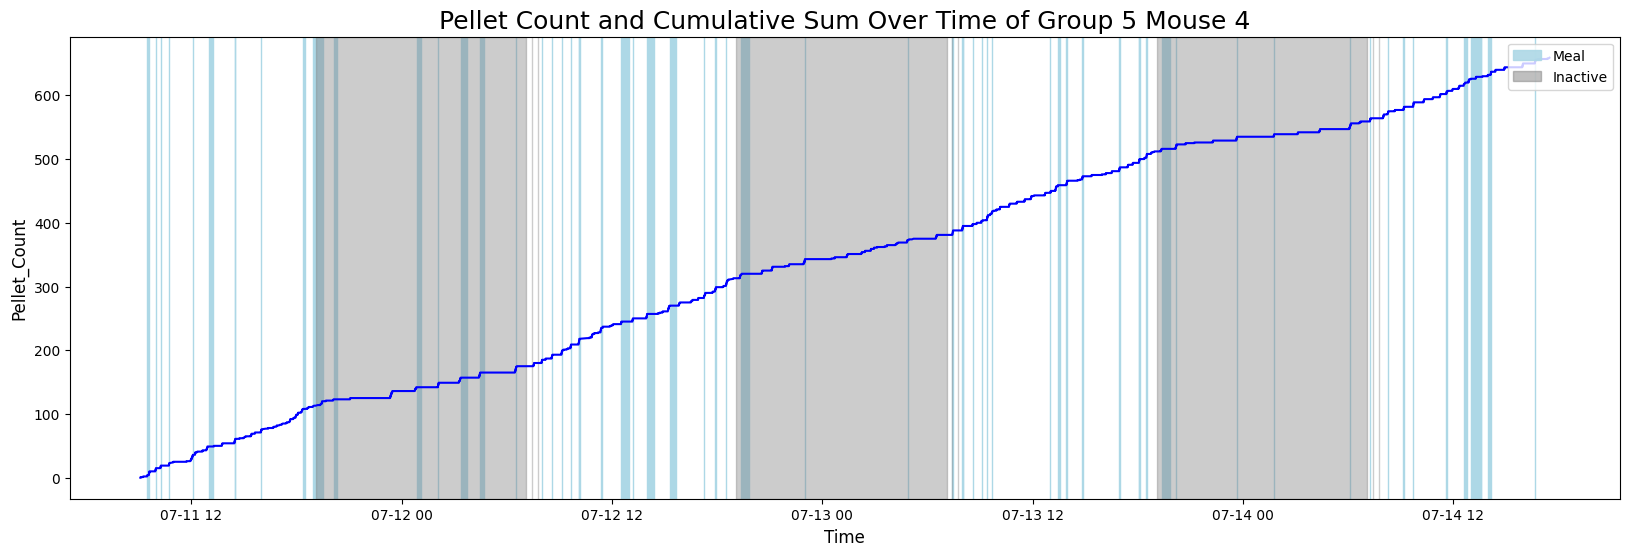

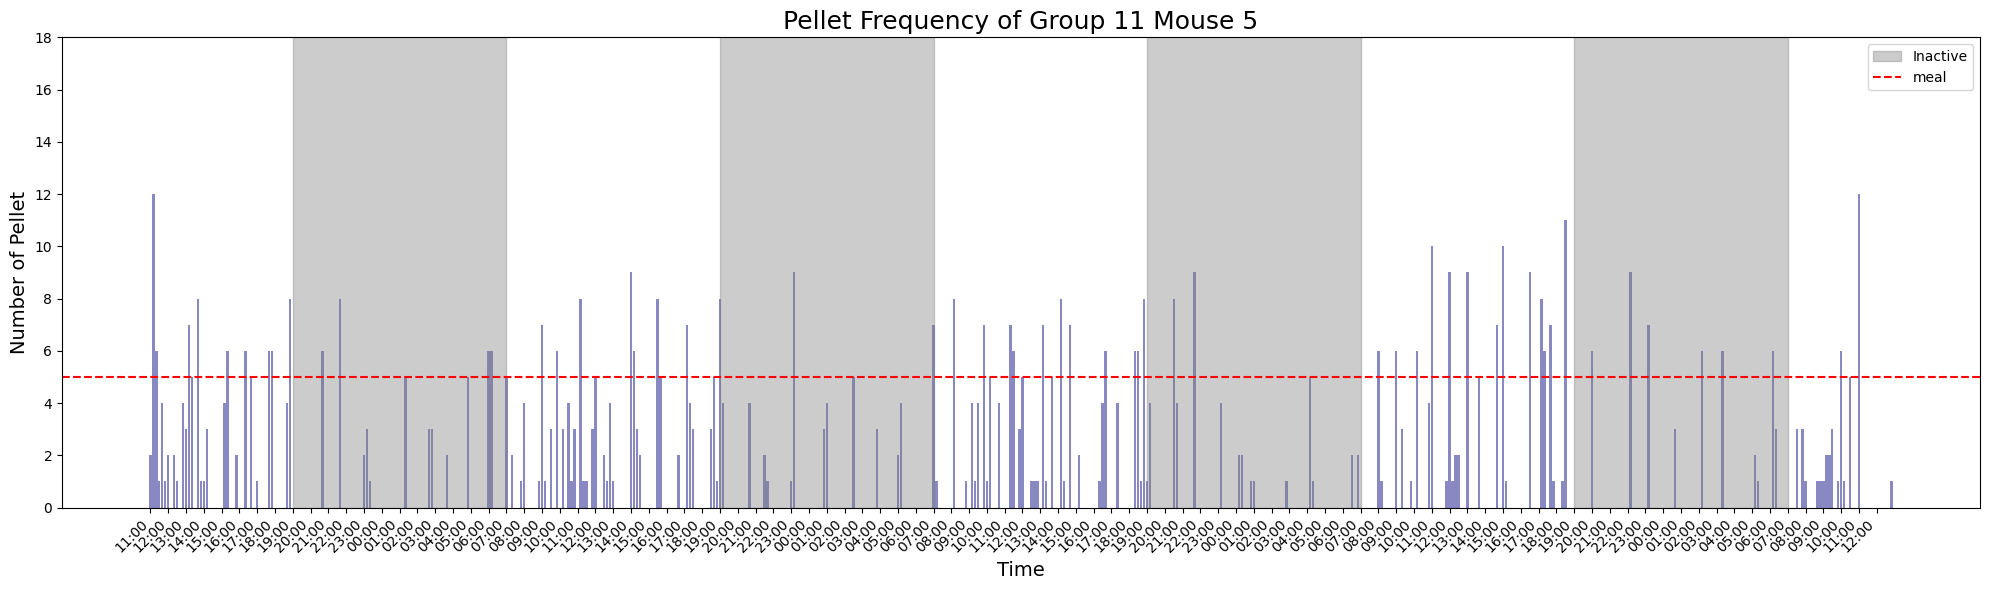

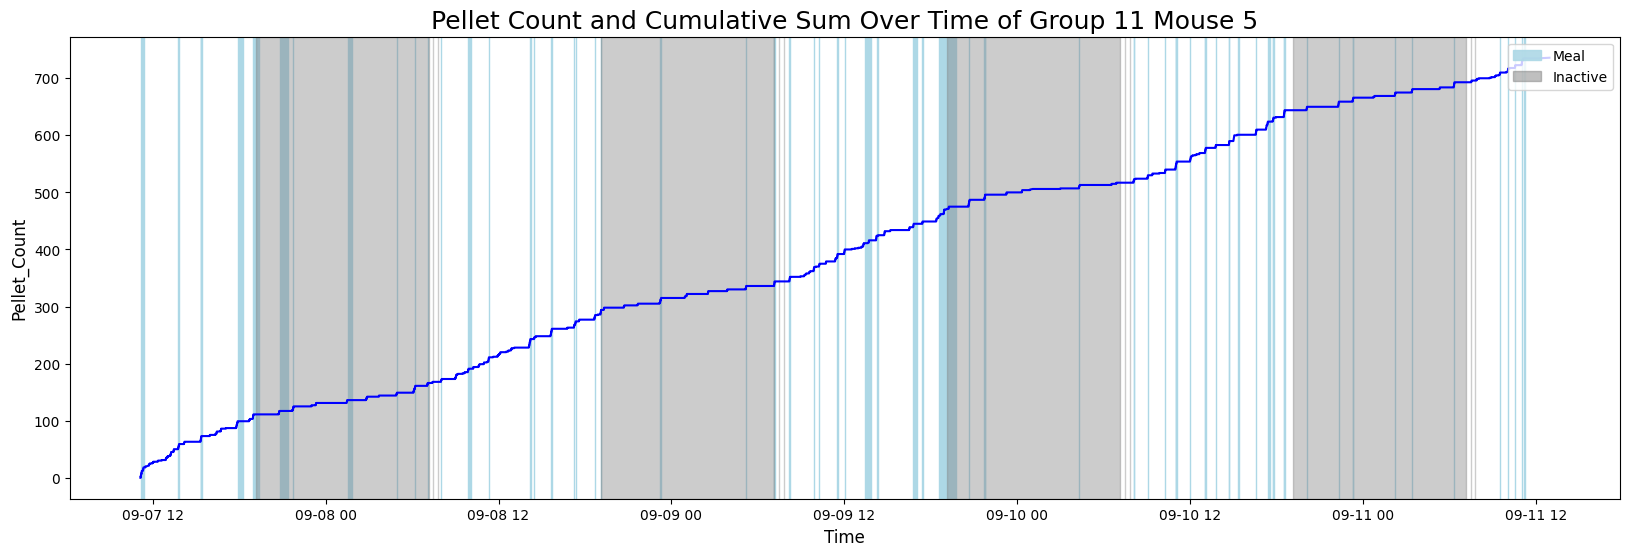

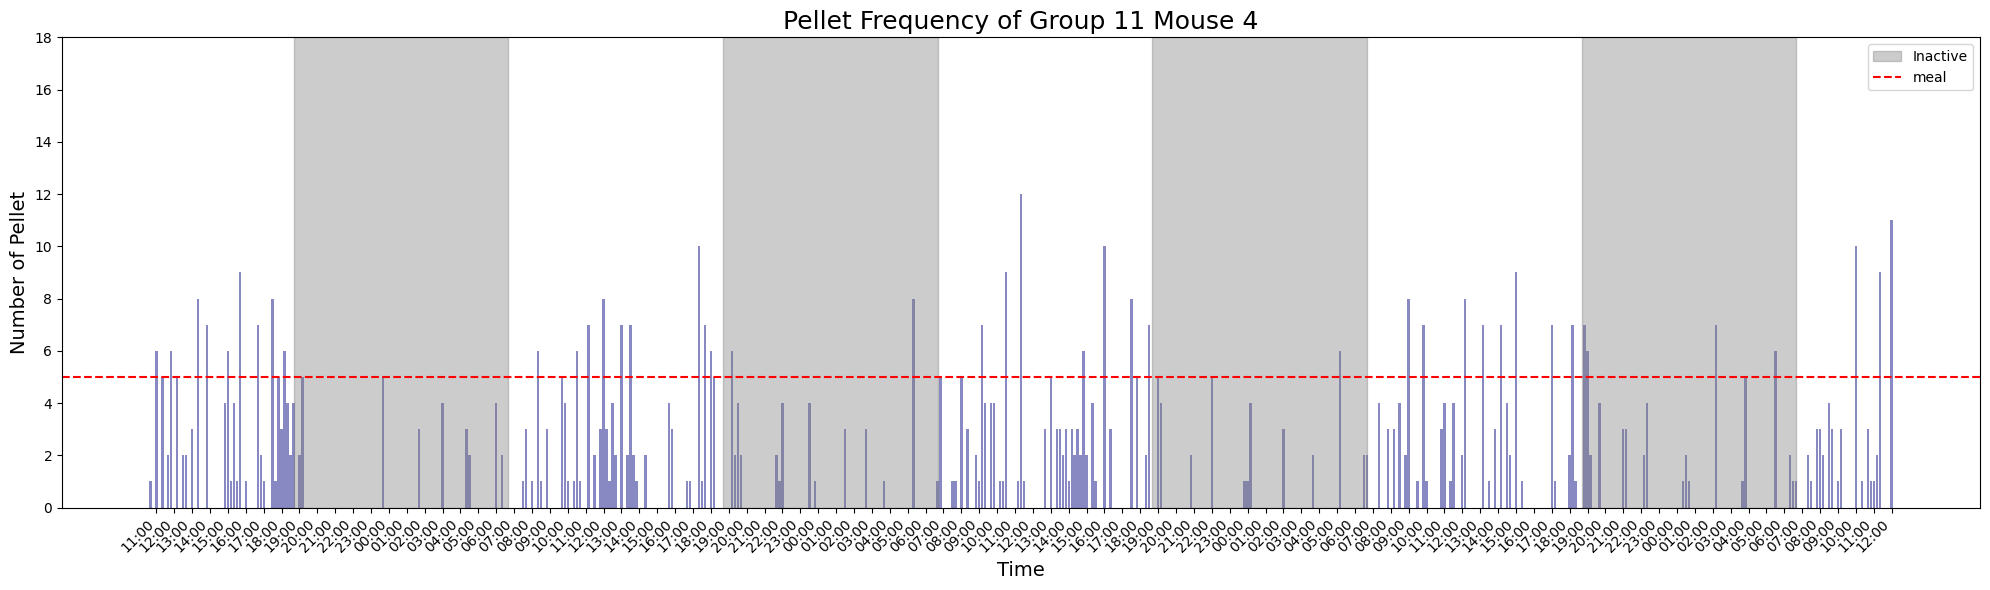

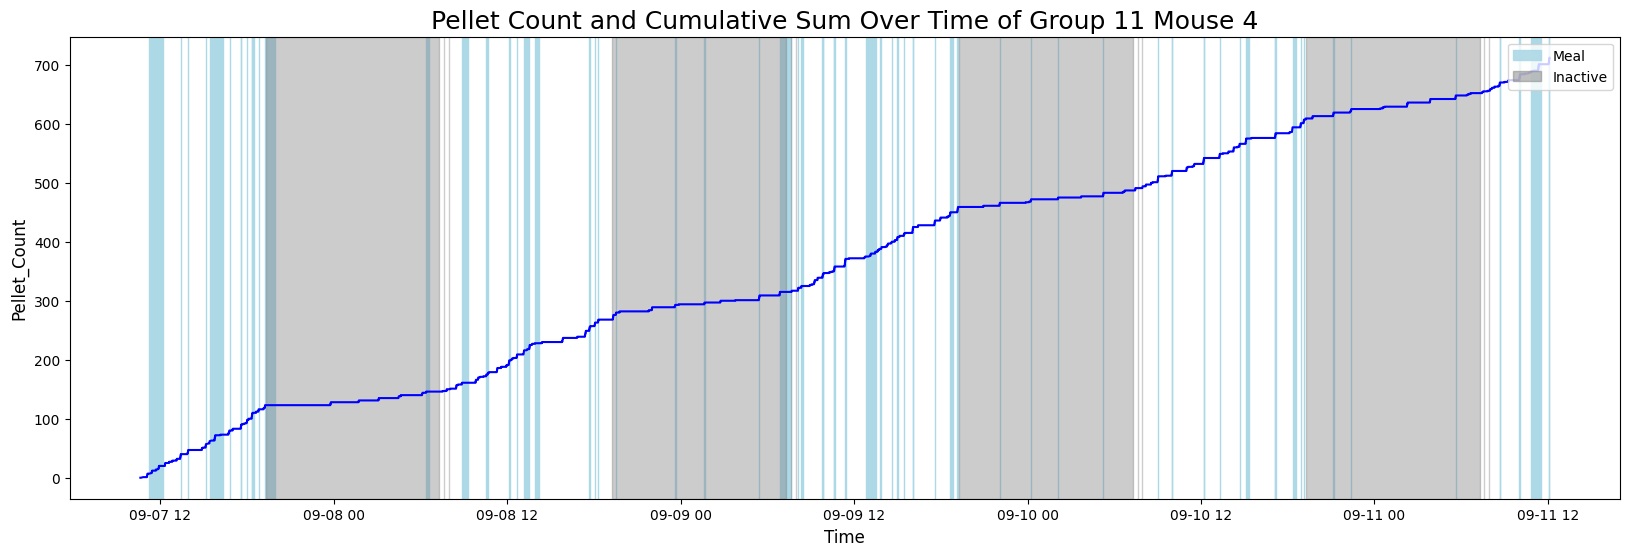

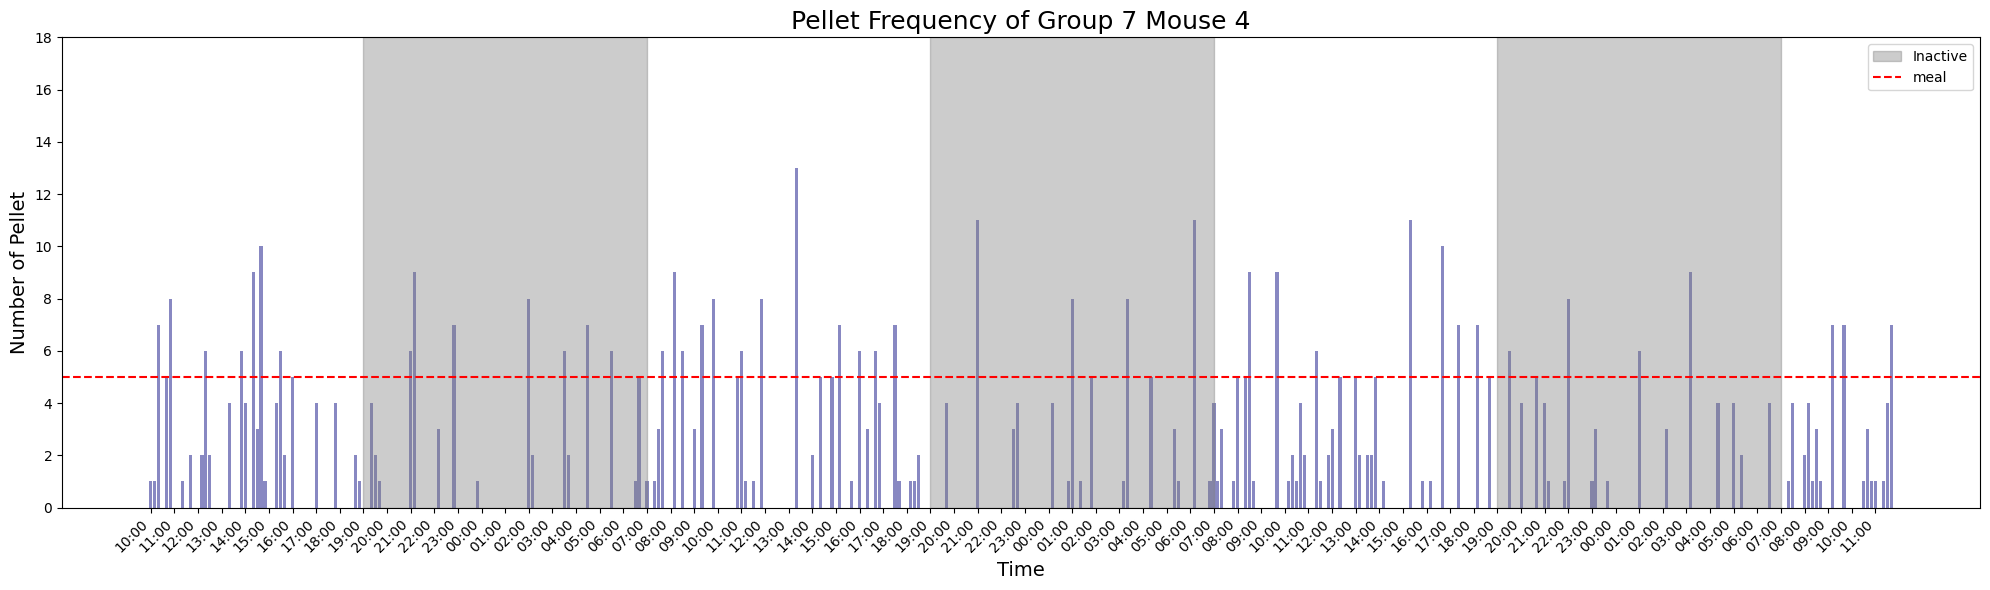

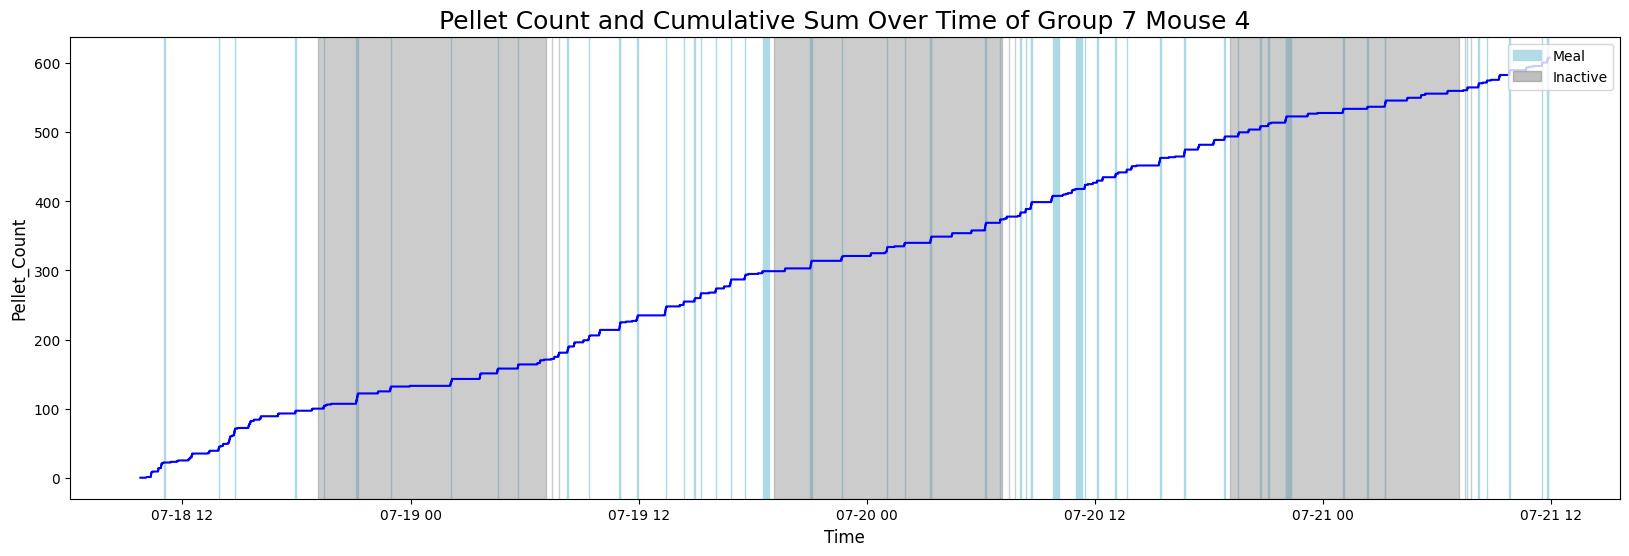

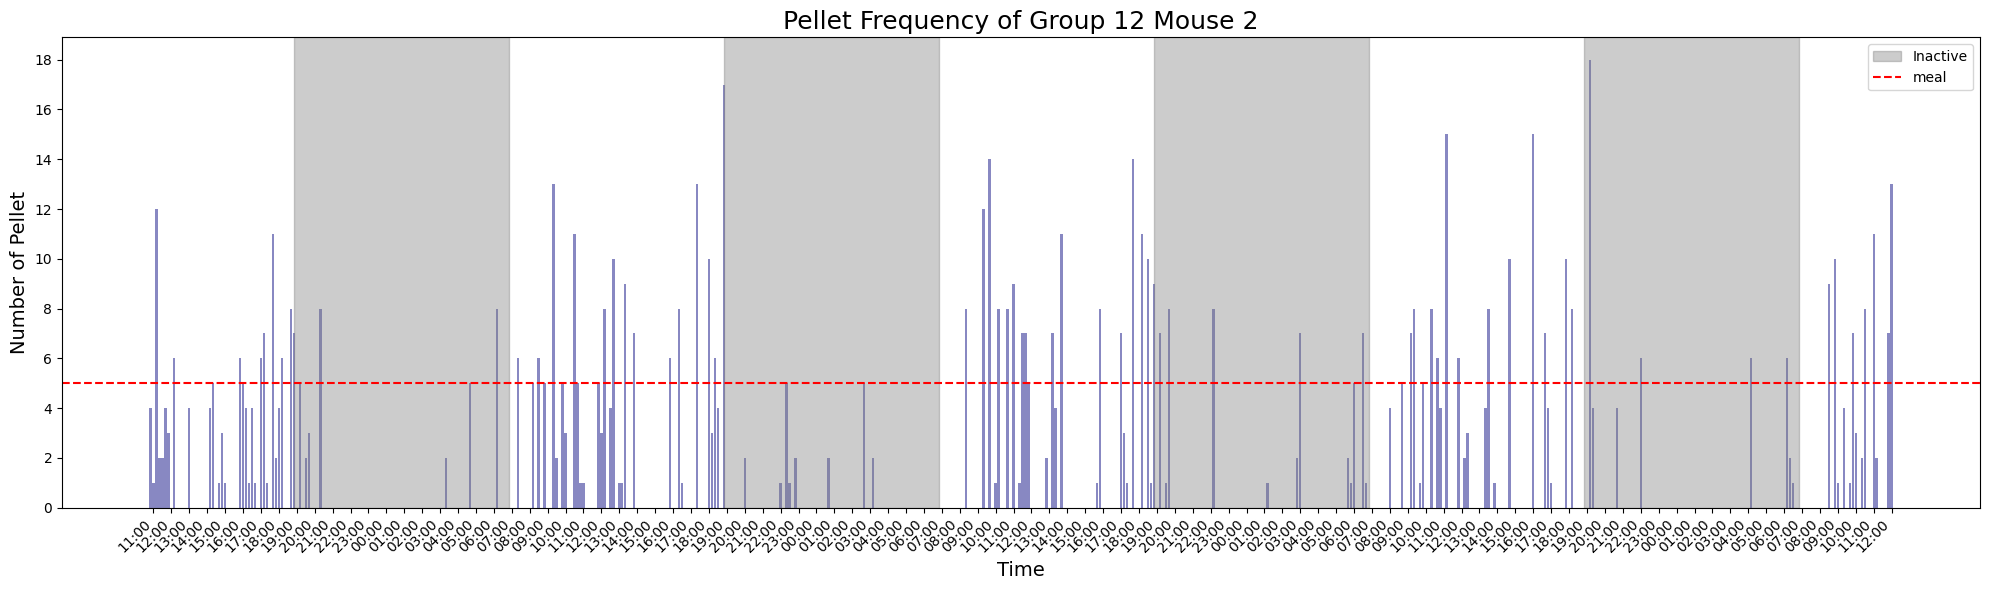

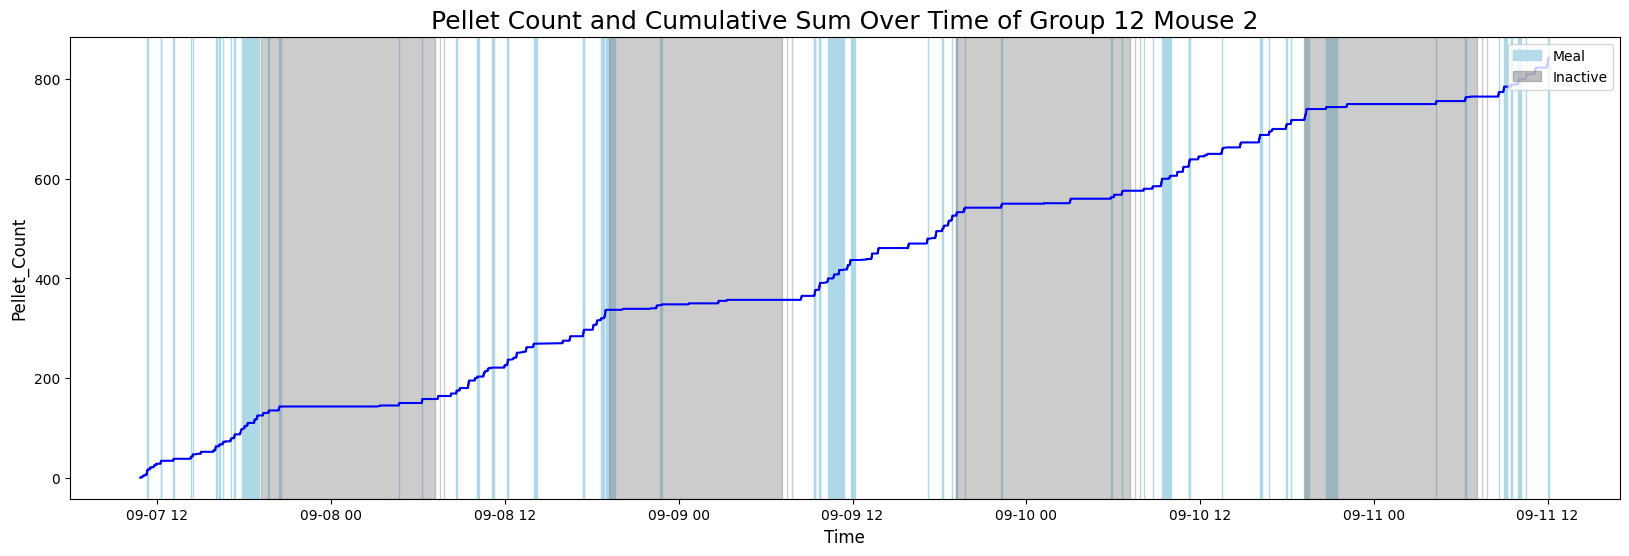

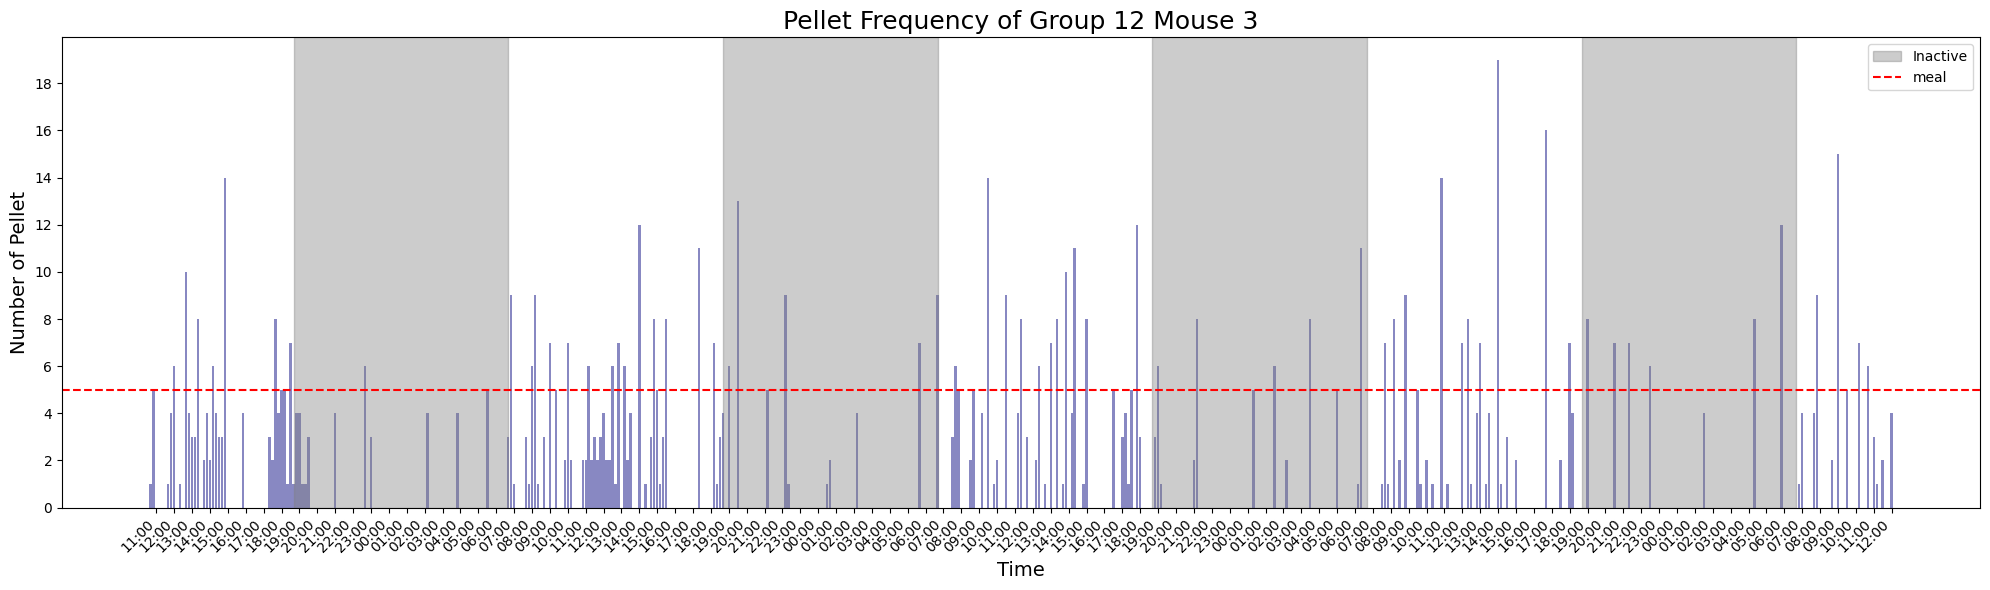

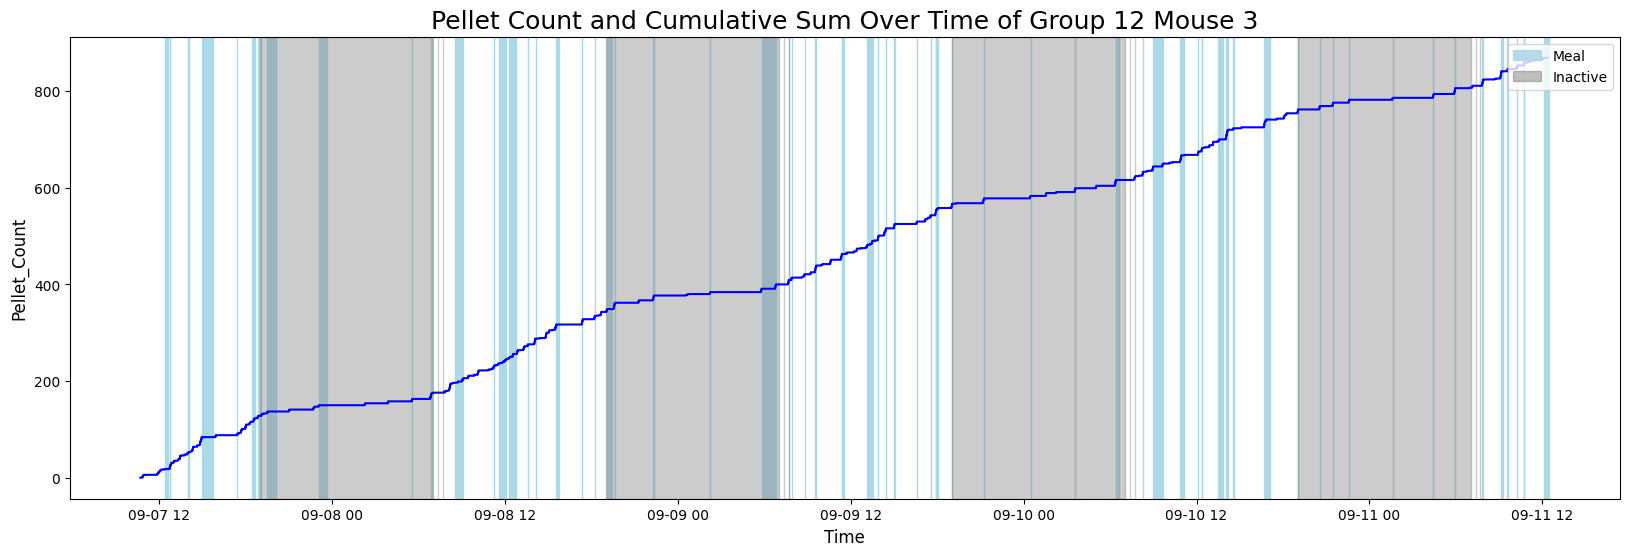

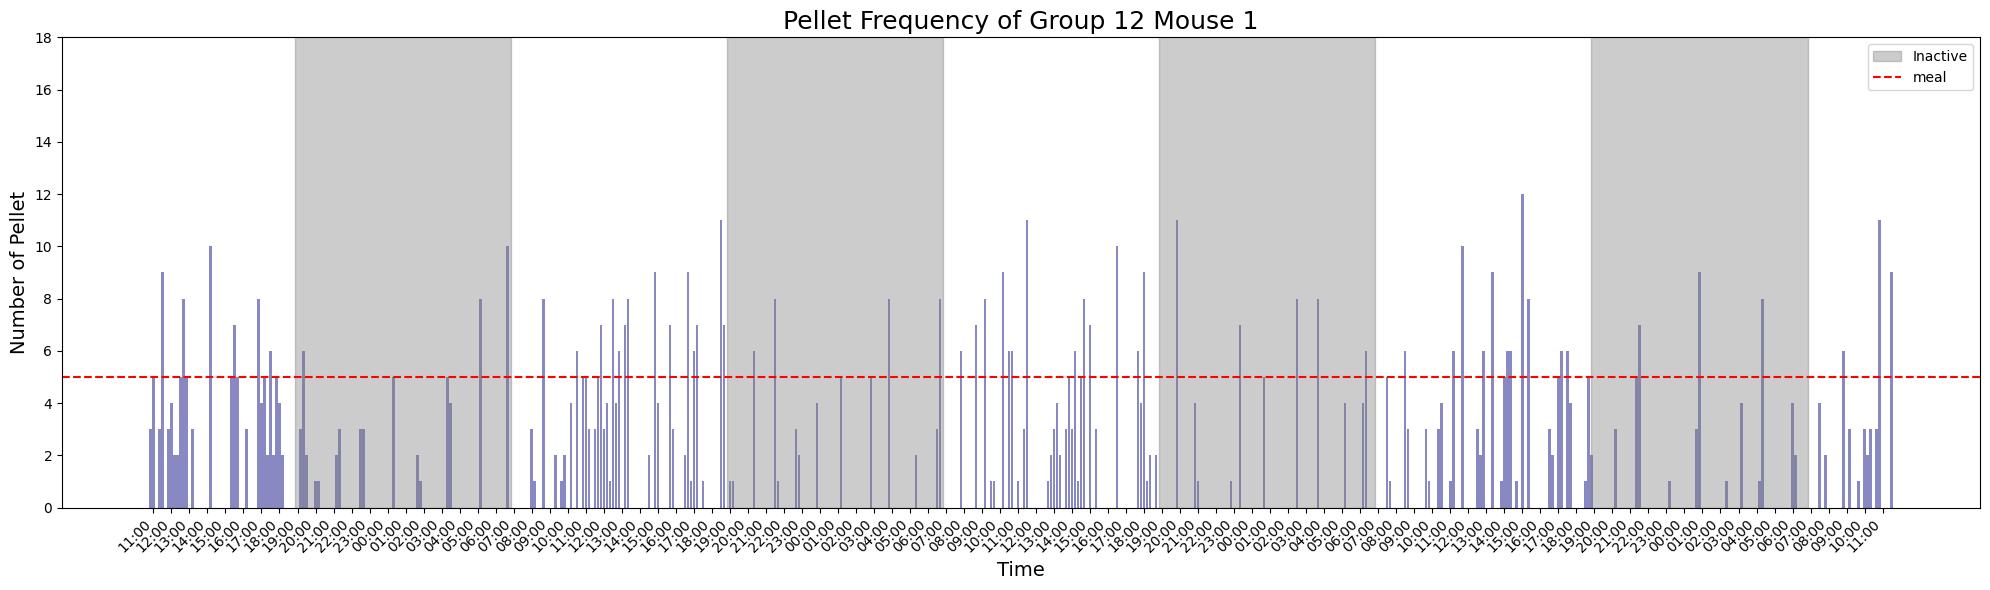

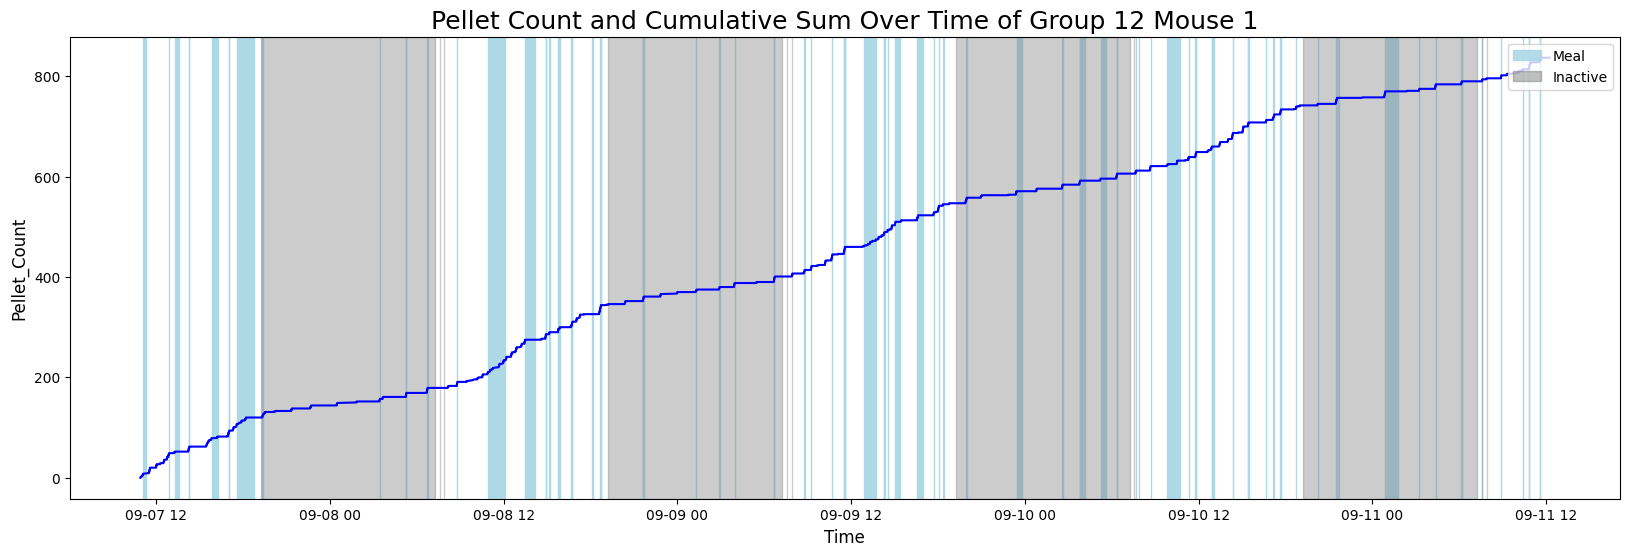

In [2]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
flip_ctrl_meal_count = []

for sheet in ctrl_sheets:
    data = read_excel_by_sheet(sheet, ctrl_path, cumulative_accuracy=False)
    meal, meal_pellet_cnt, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    val_idx = next((i for i, x in enumerate(meal_acc) if x >= 60), -1) # find first meal that has >60% accuracy
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    flip_ctrl_meal_count.append(avg)
    ctrl_avg_pellet.append(ml.average_pellet(group))
    ctrl_dark_meals.append(ml.active_meal(meal))
    ctrl_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

### Cask Group

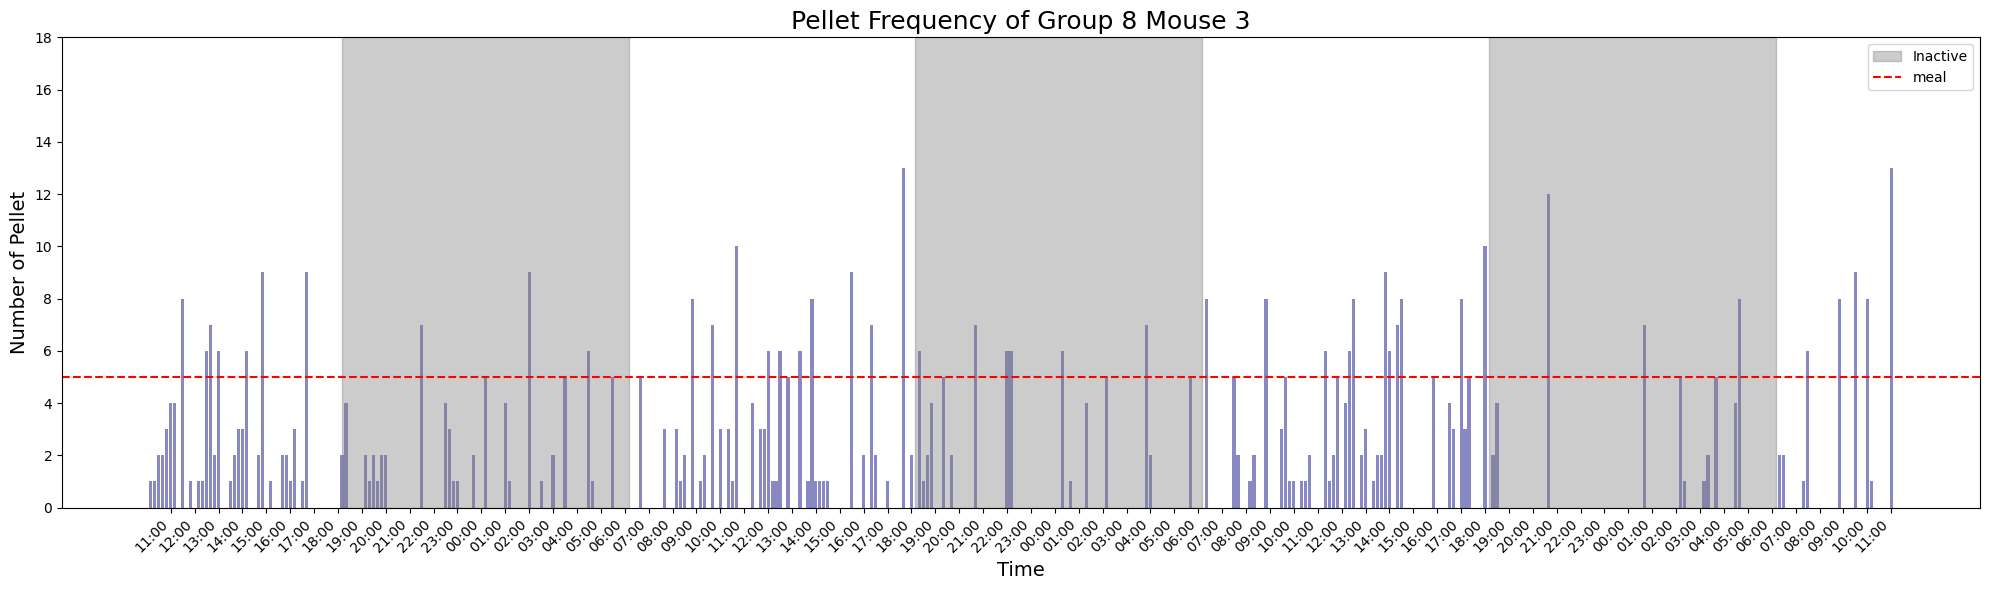

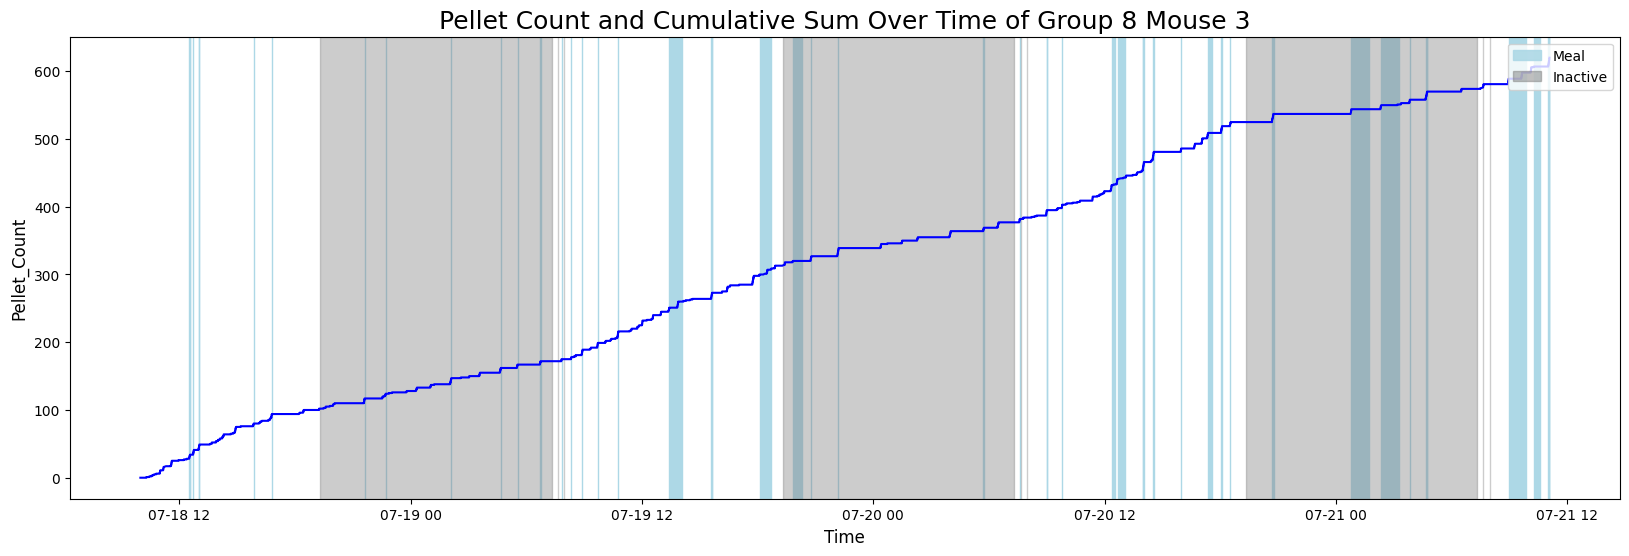

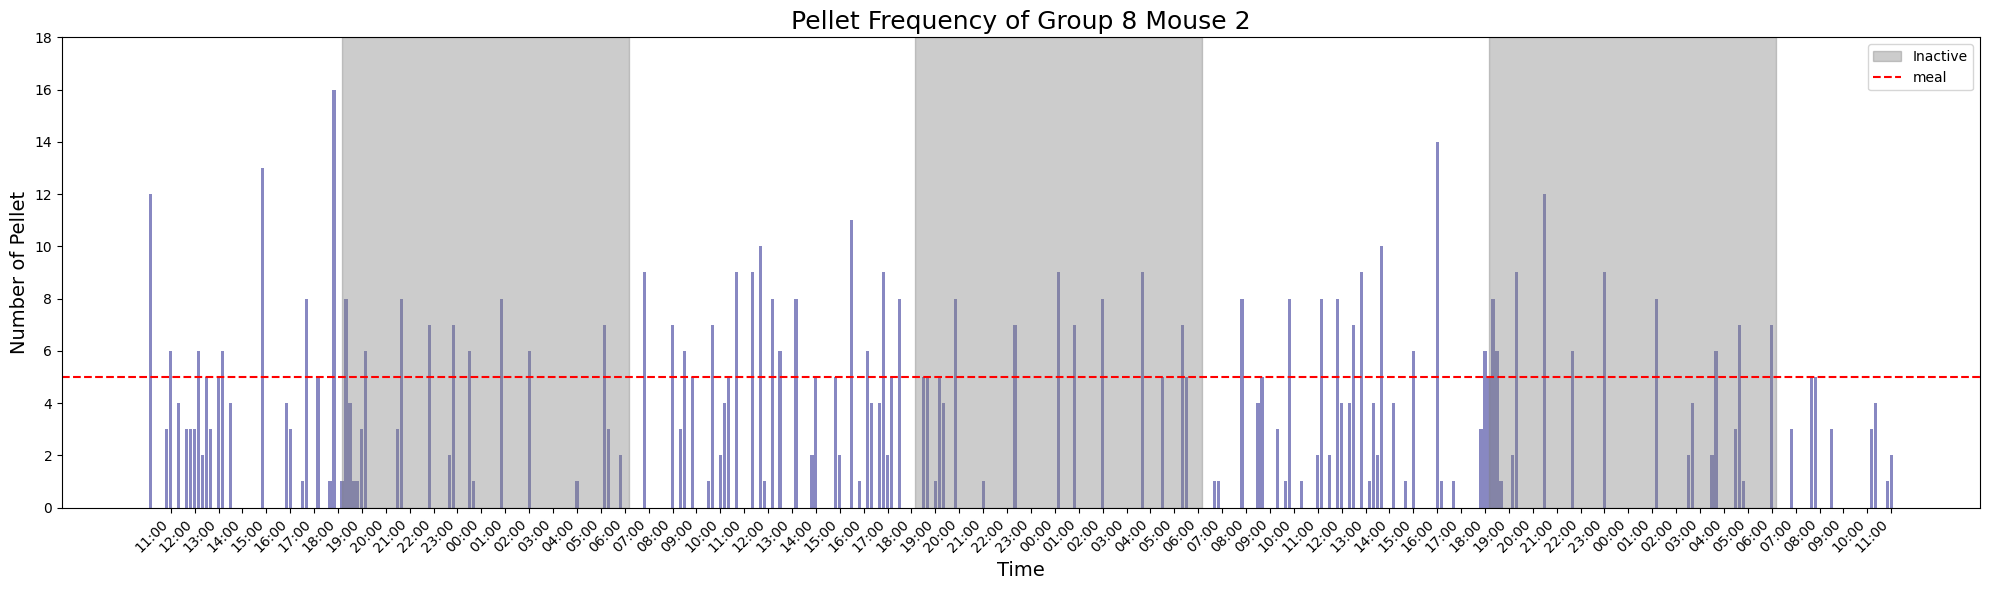

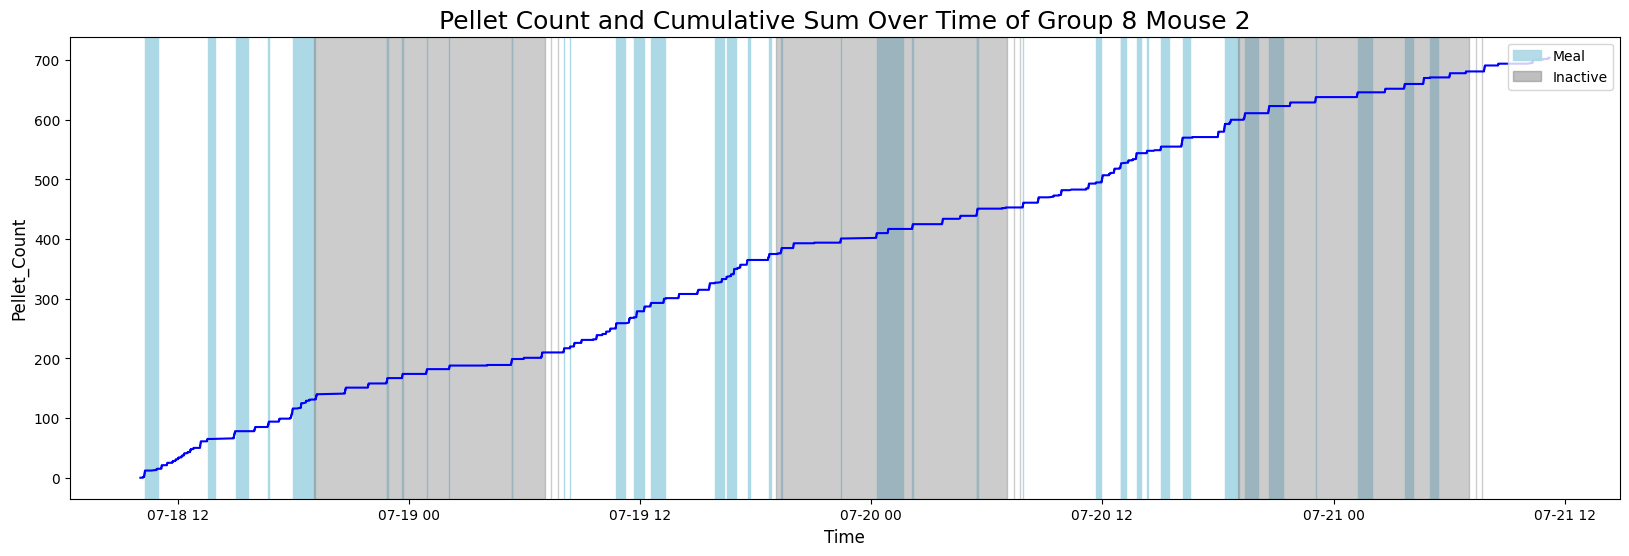

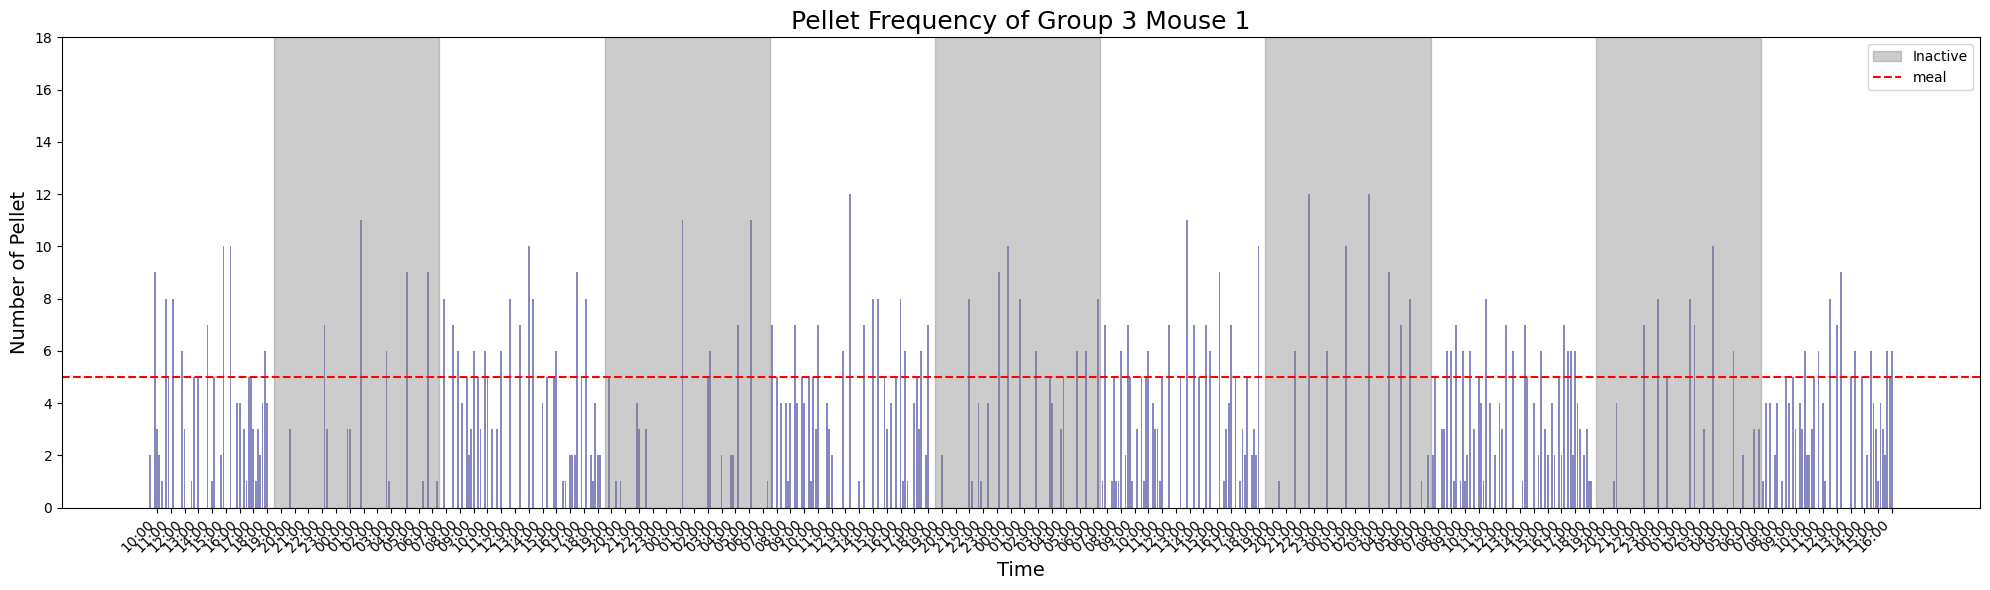

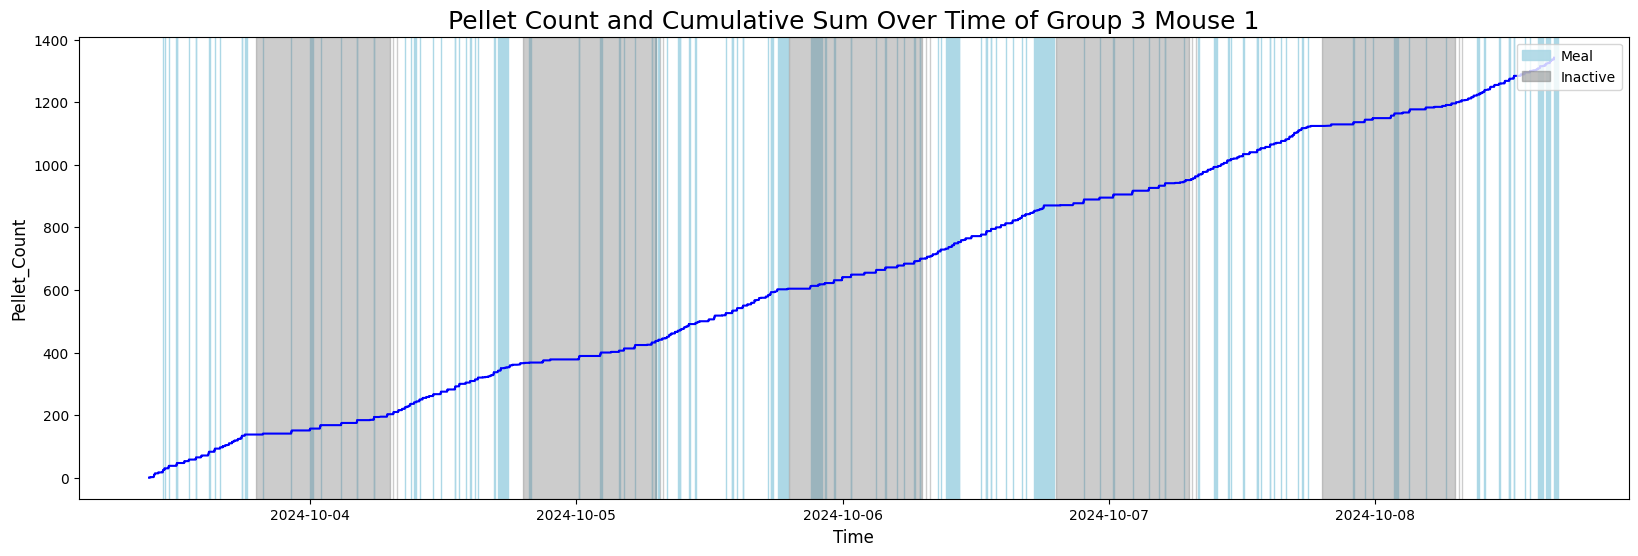

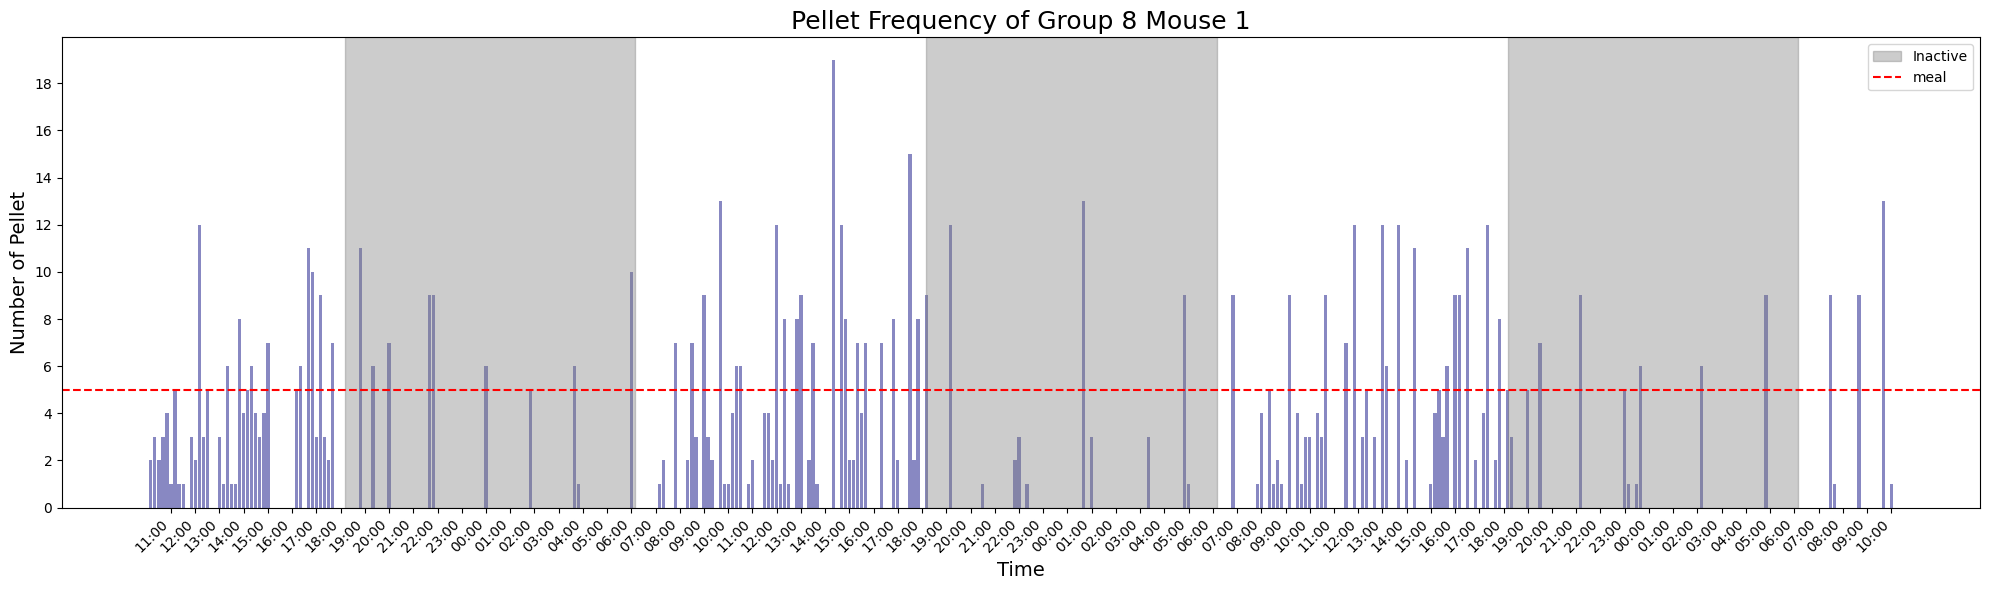

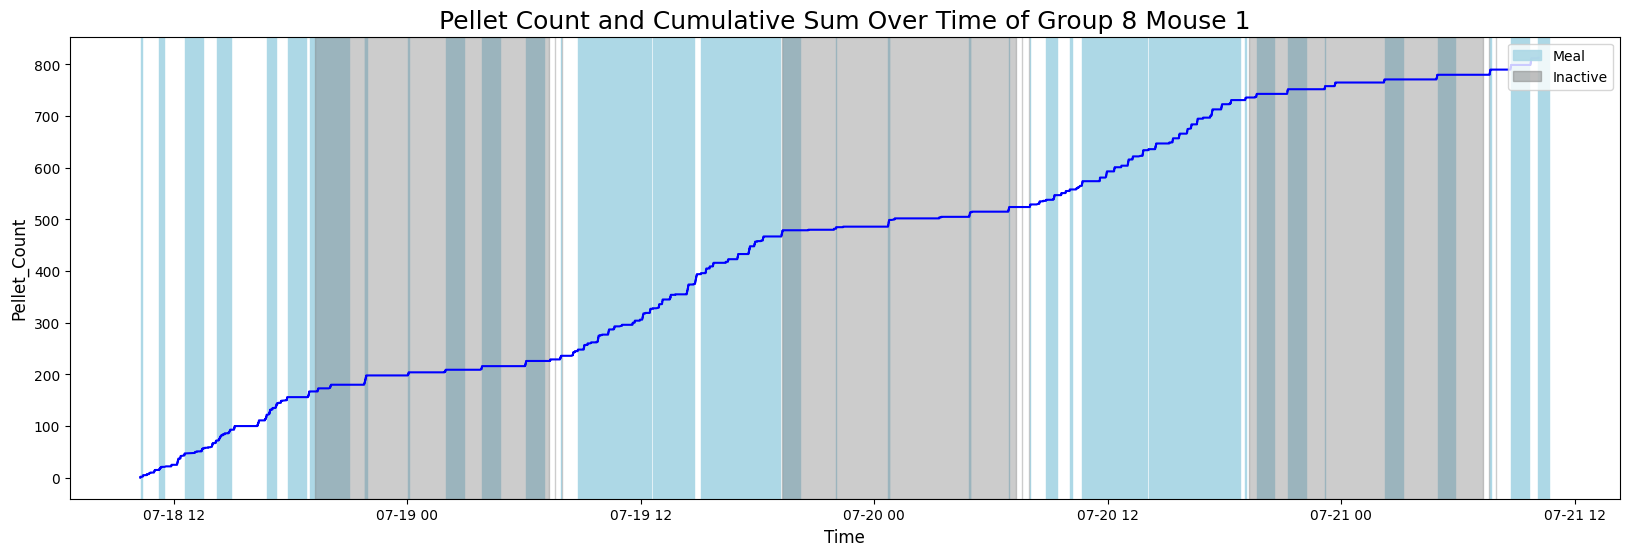

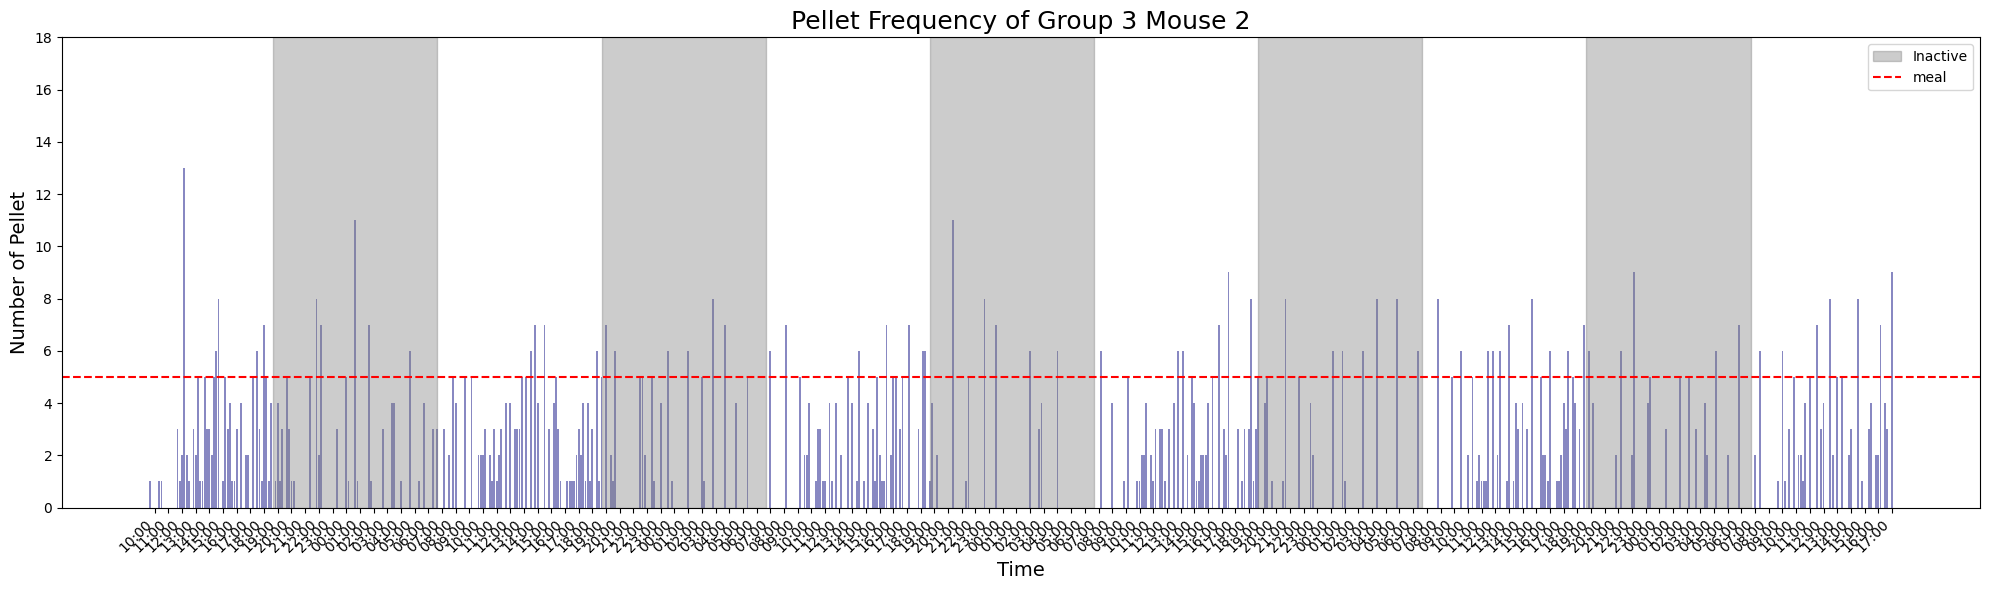

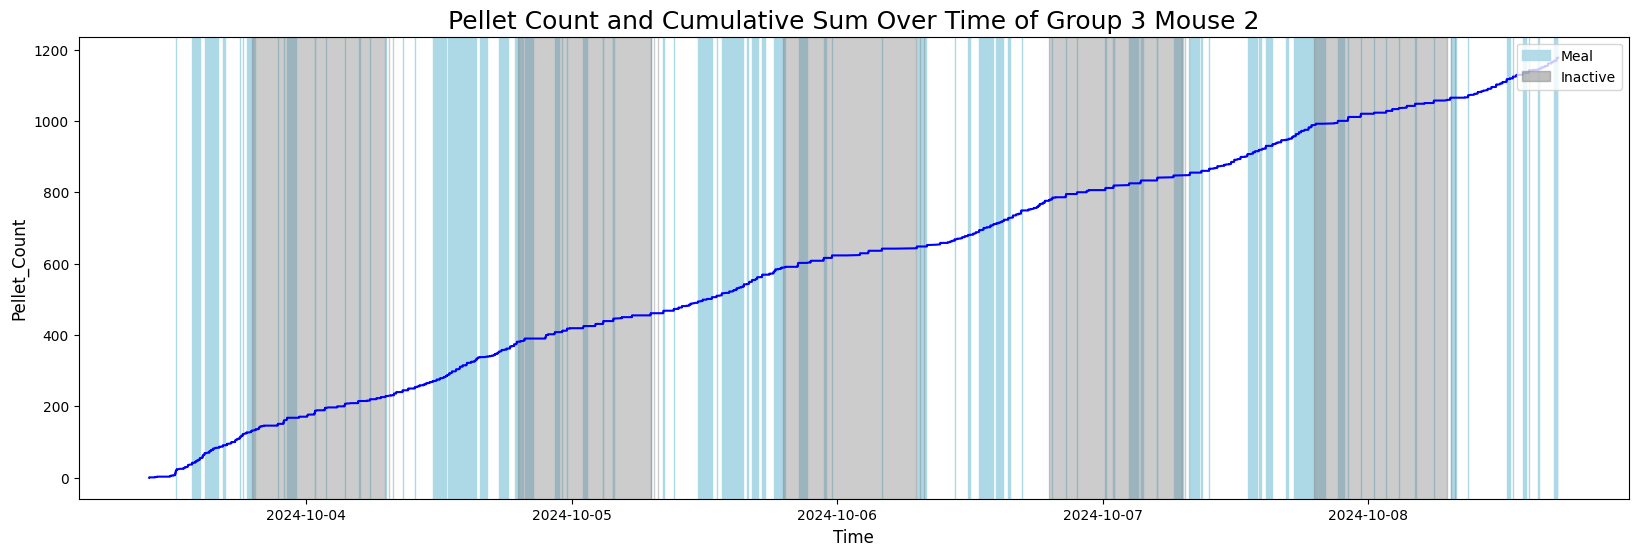

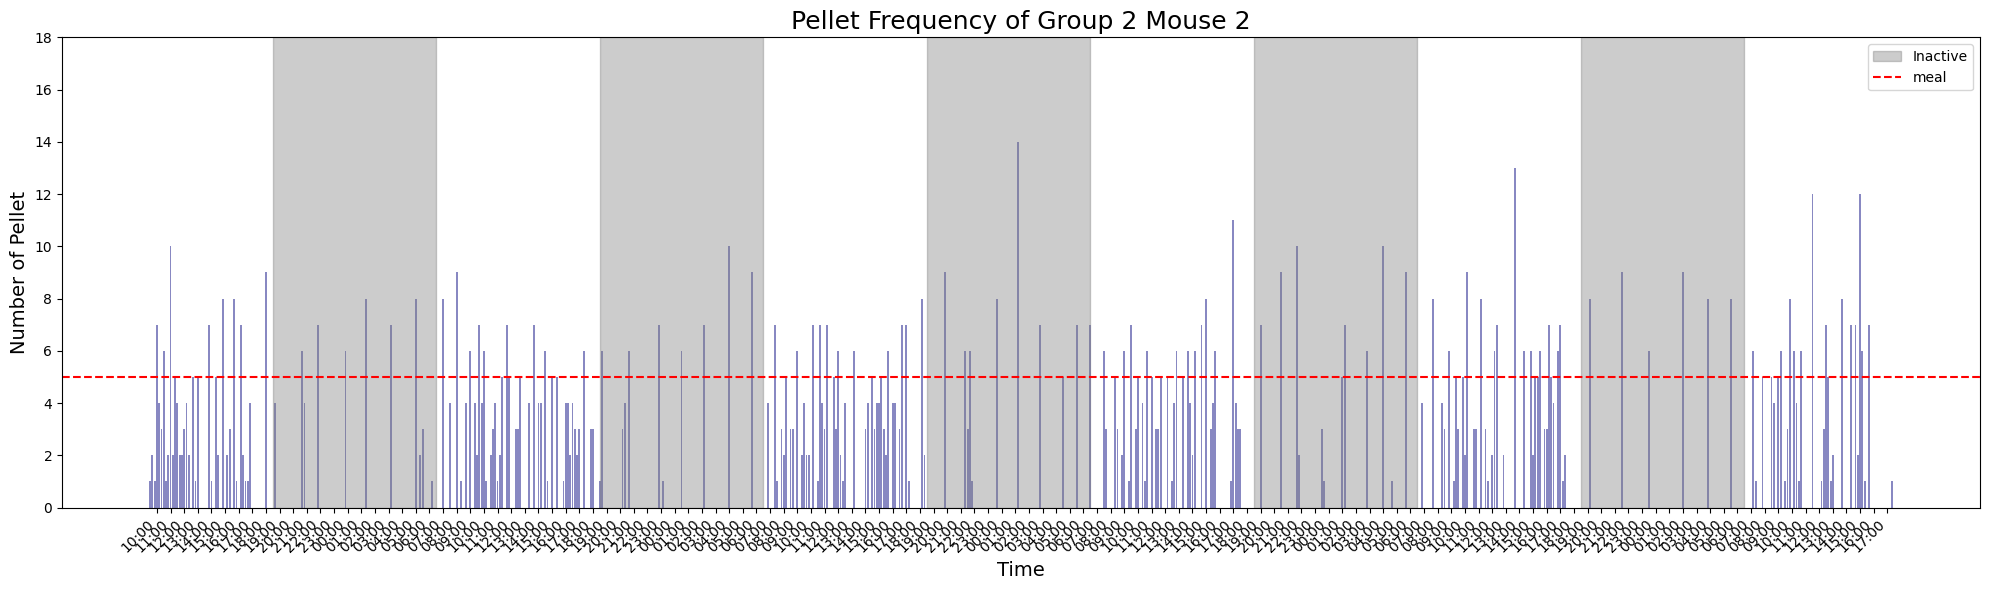

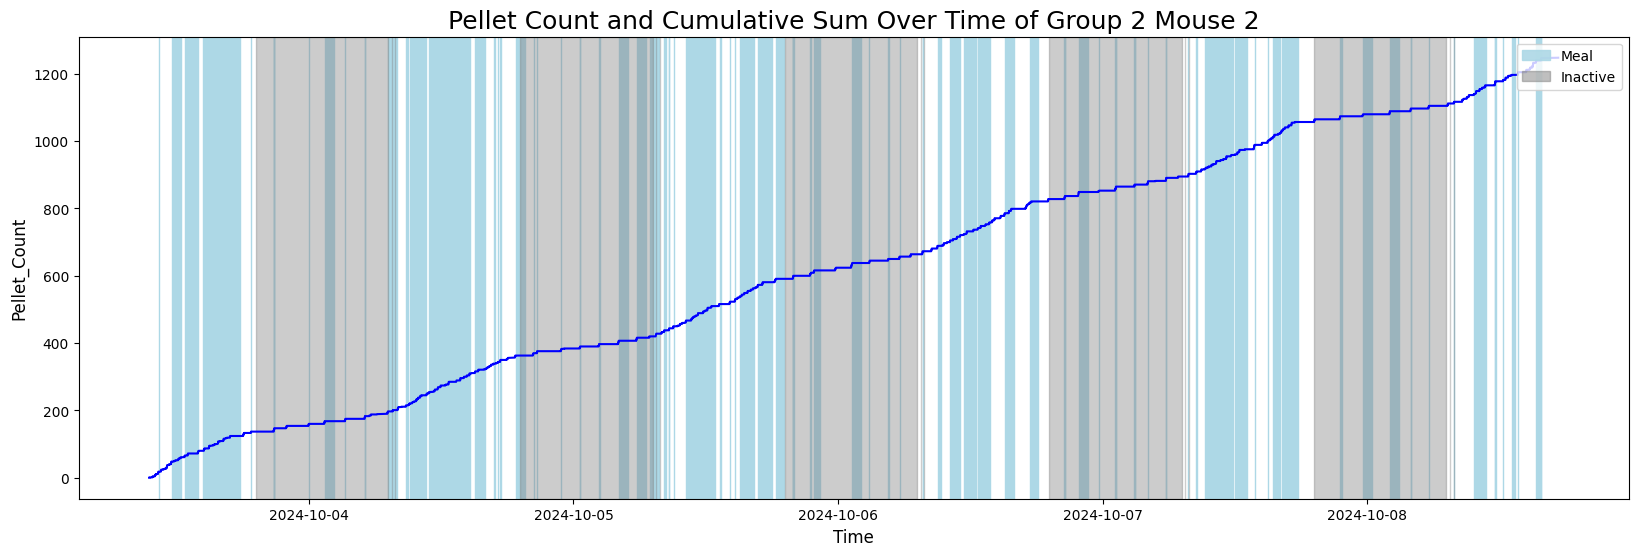

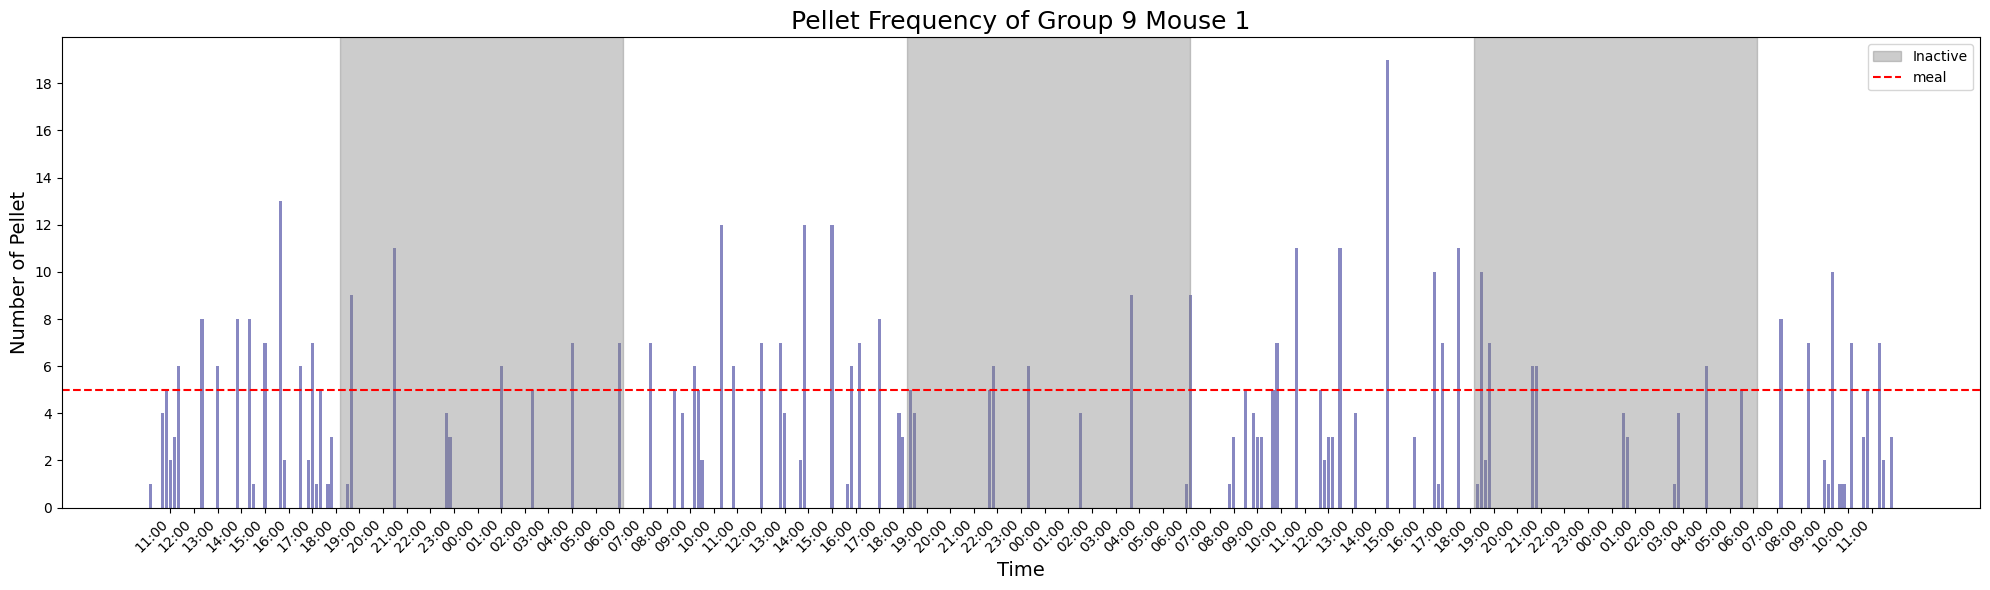

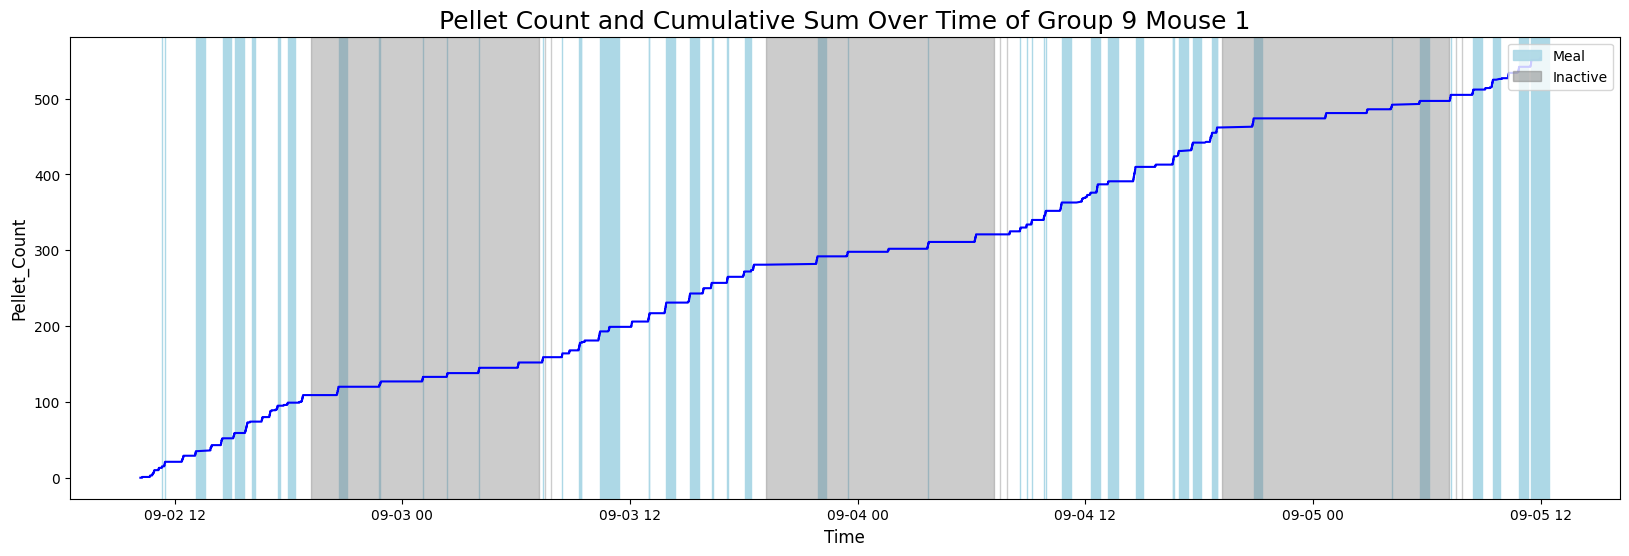

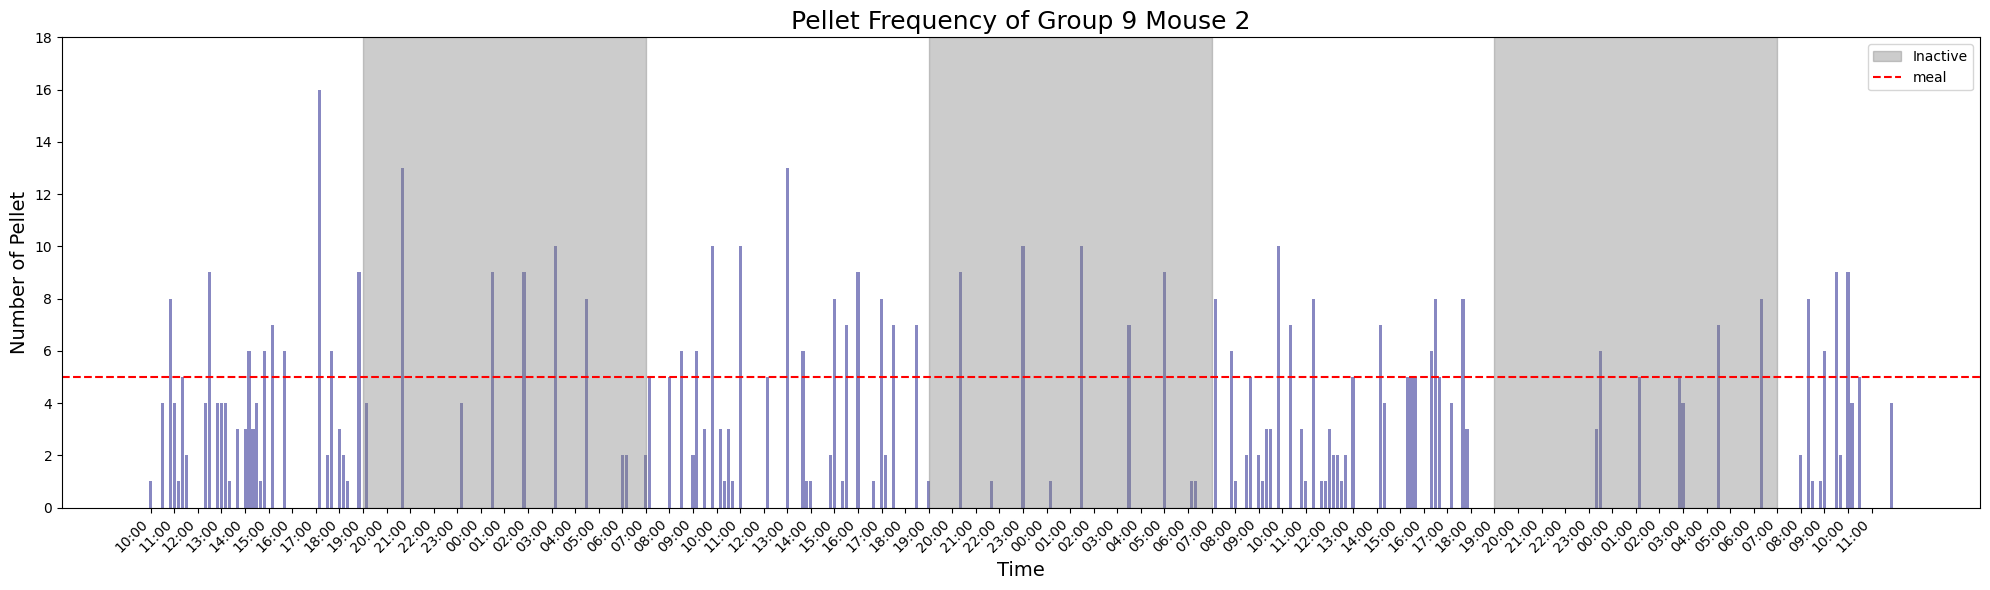

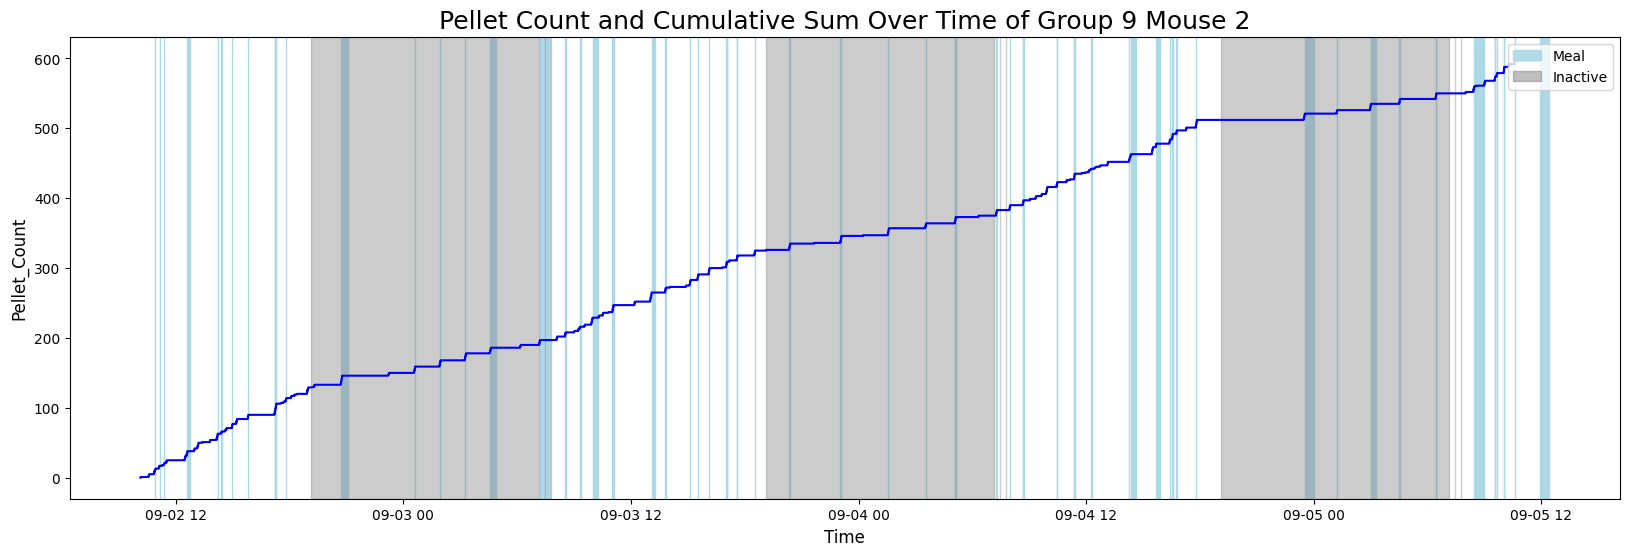

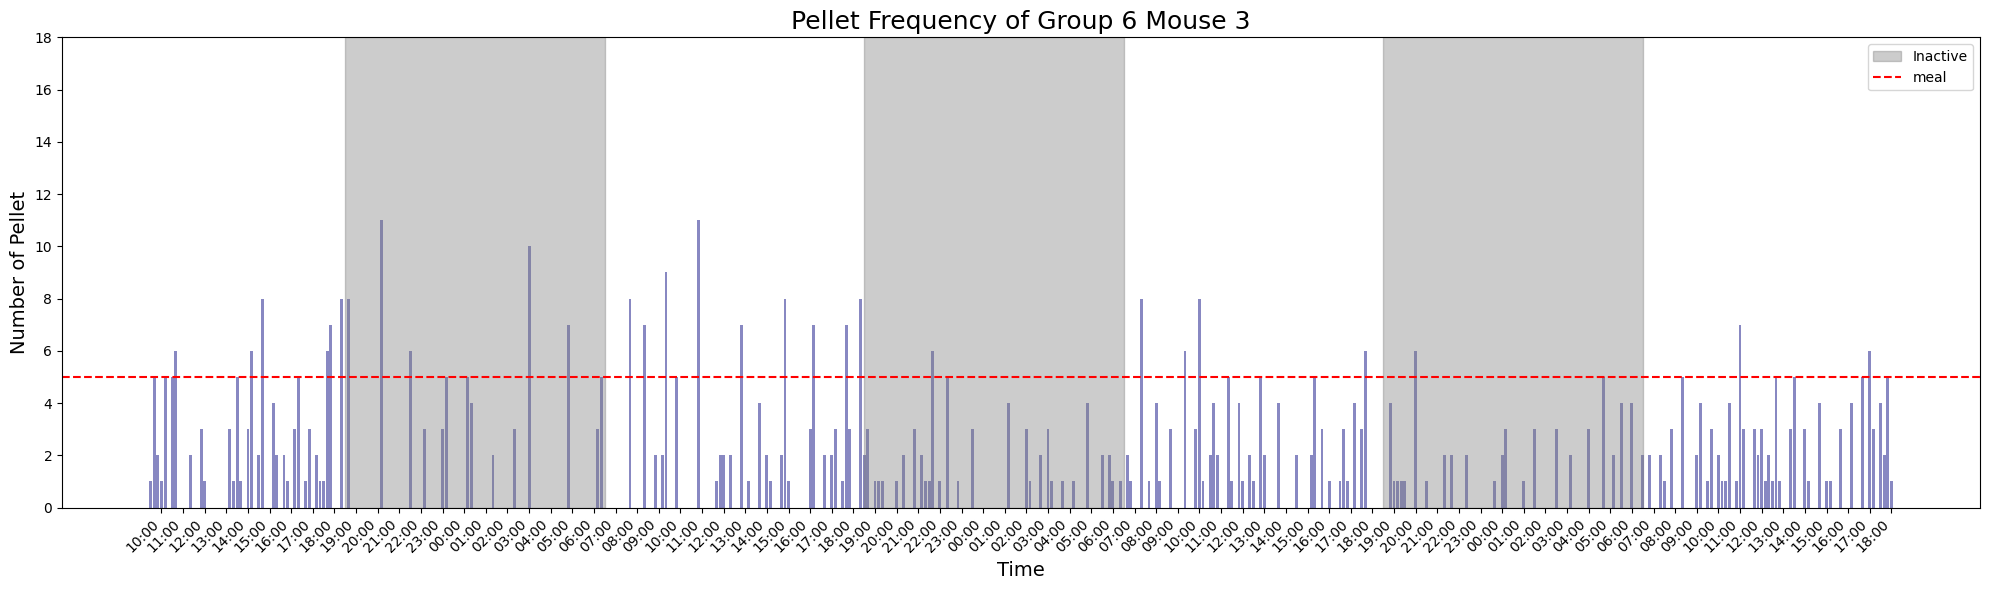

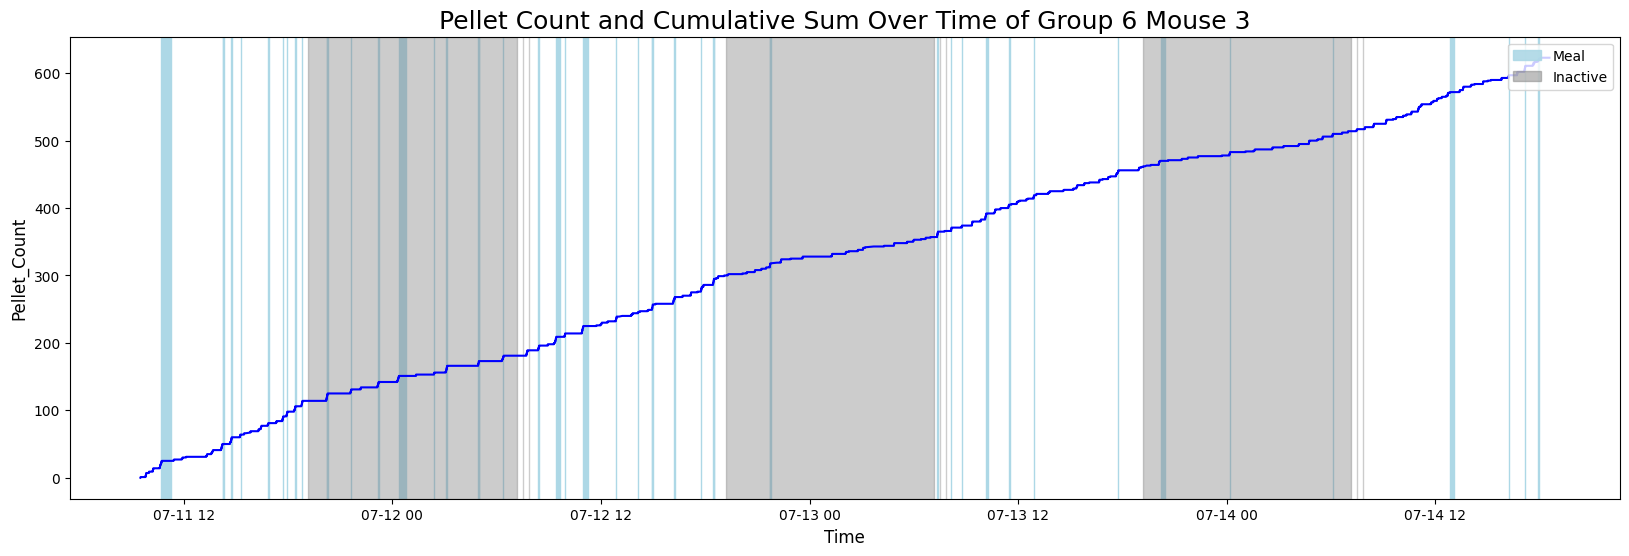

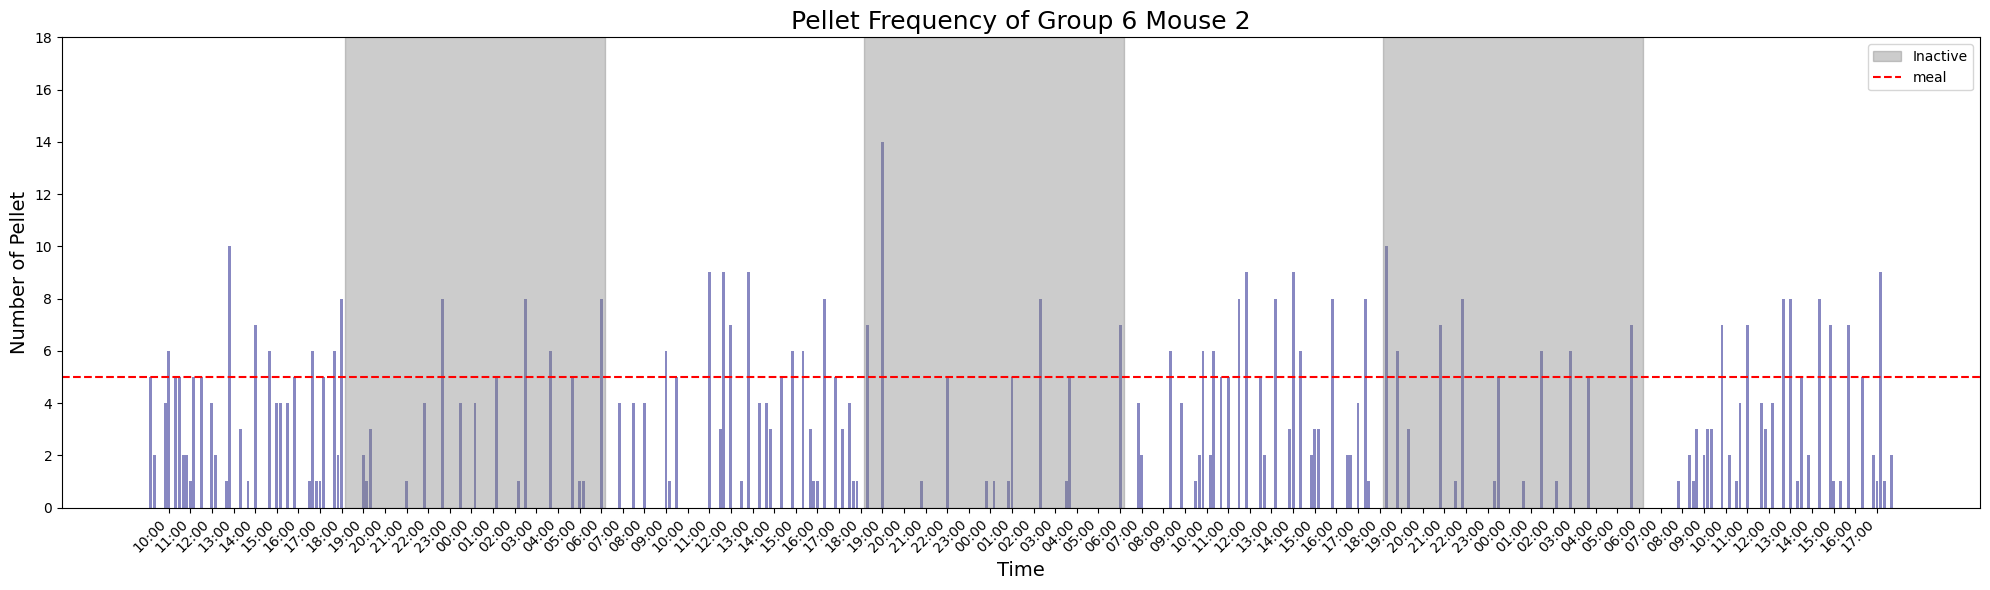

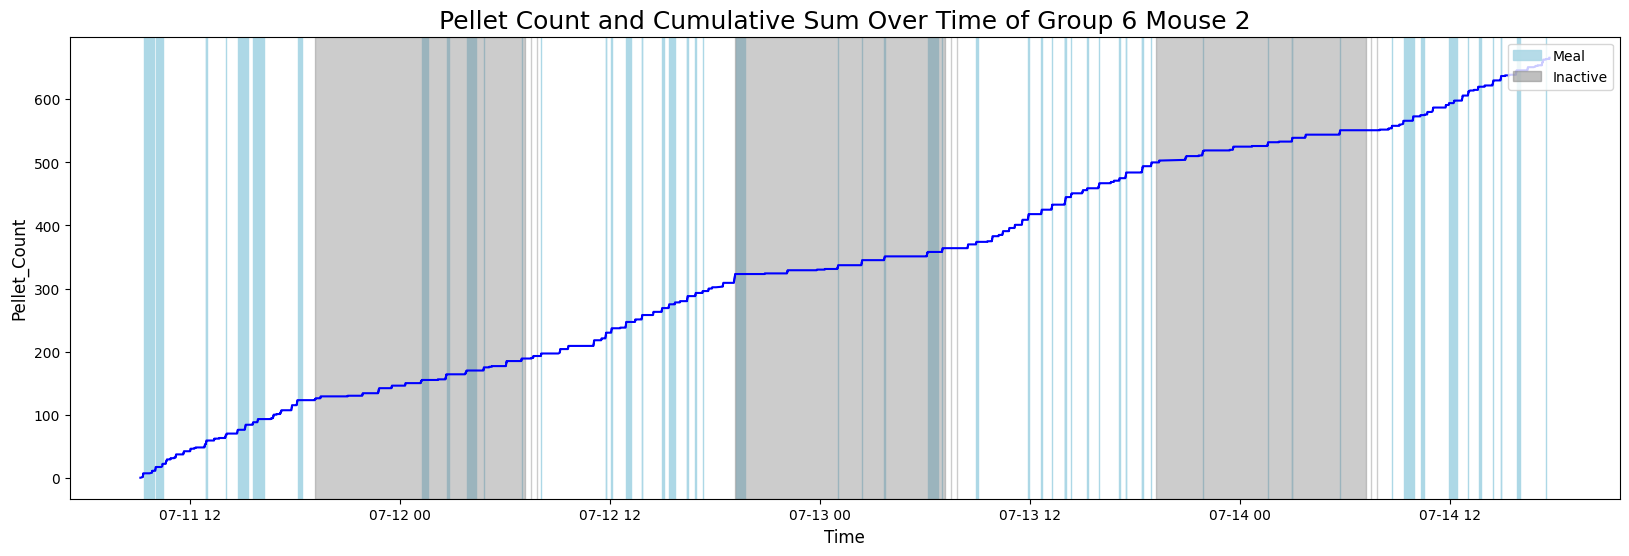

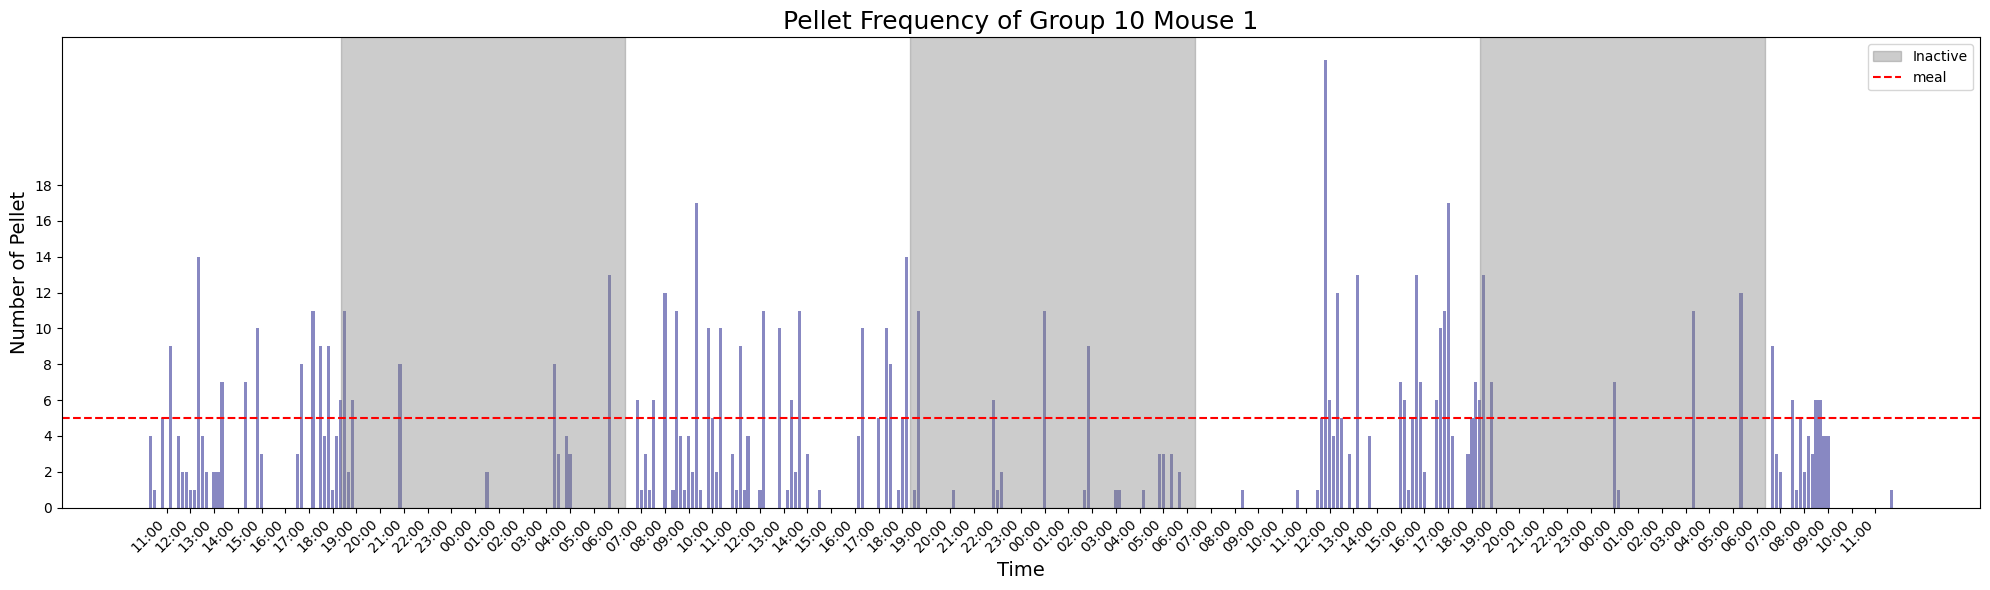

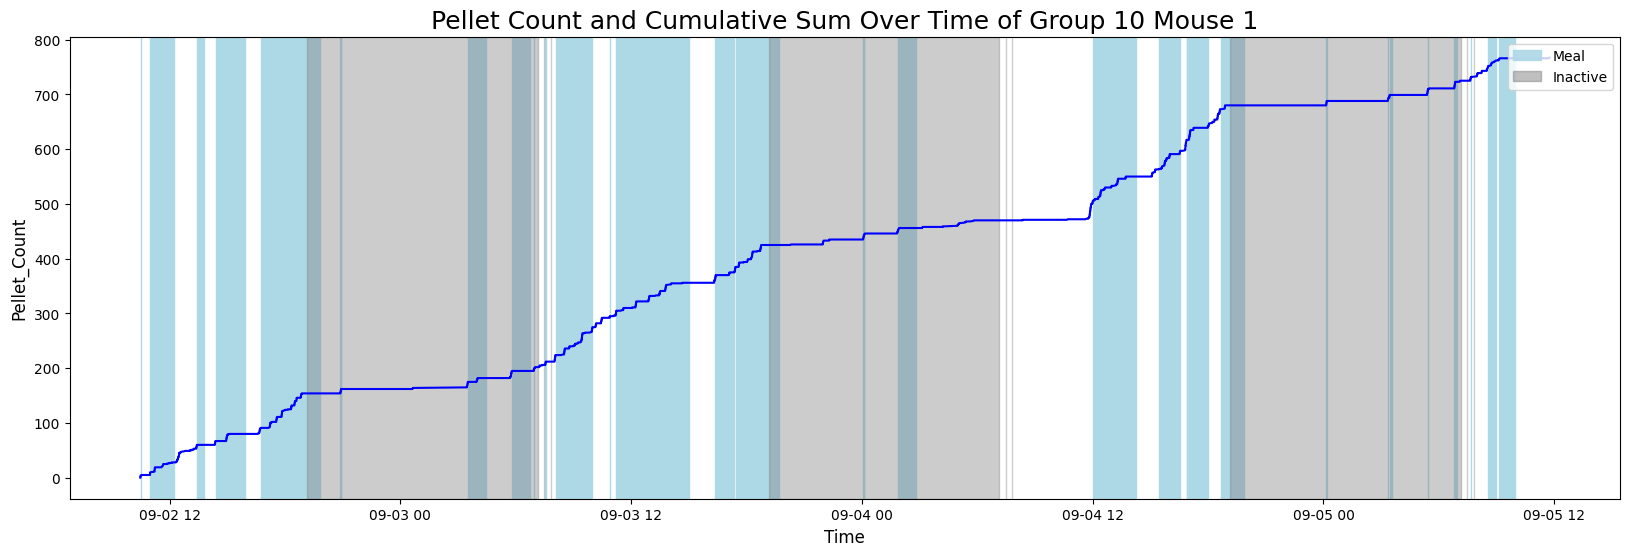

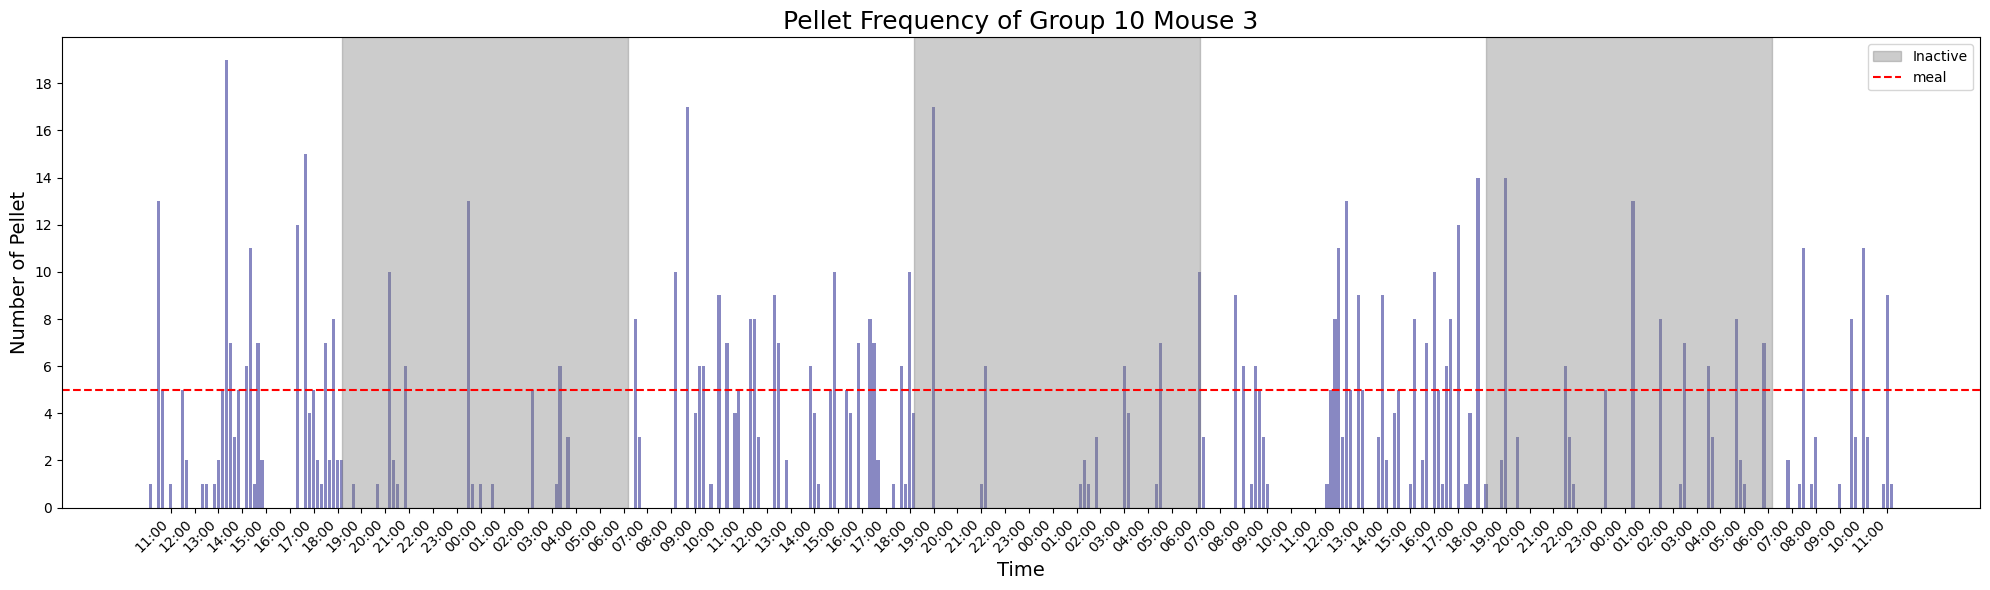

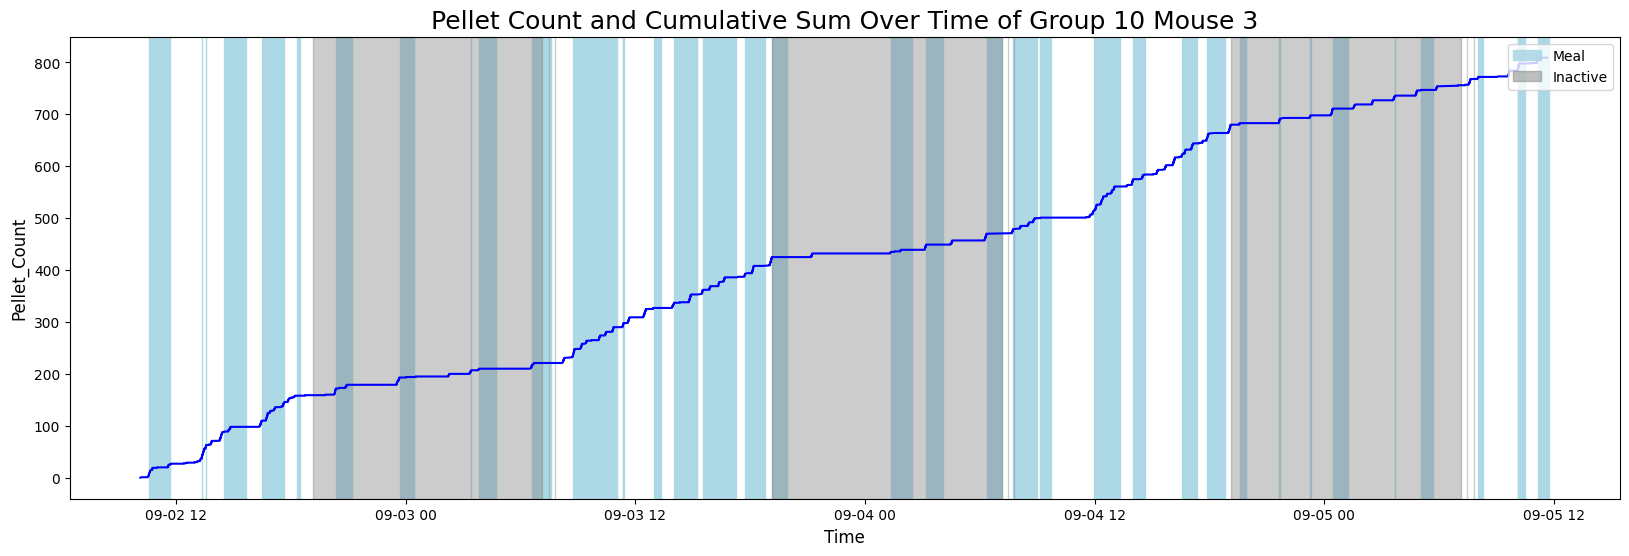

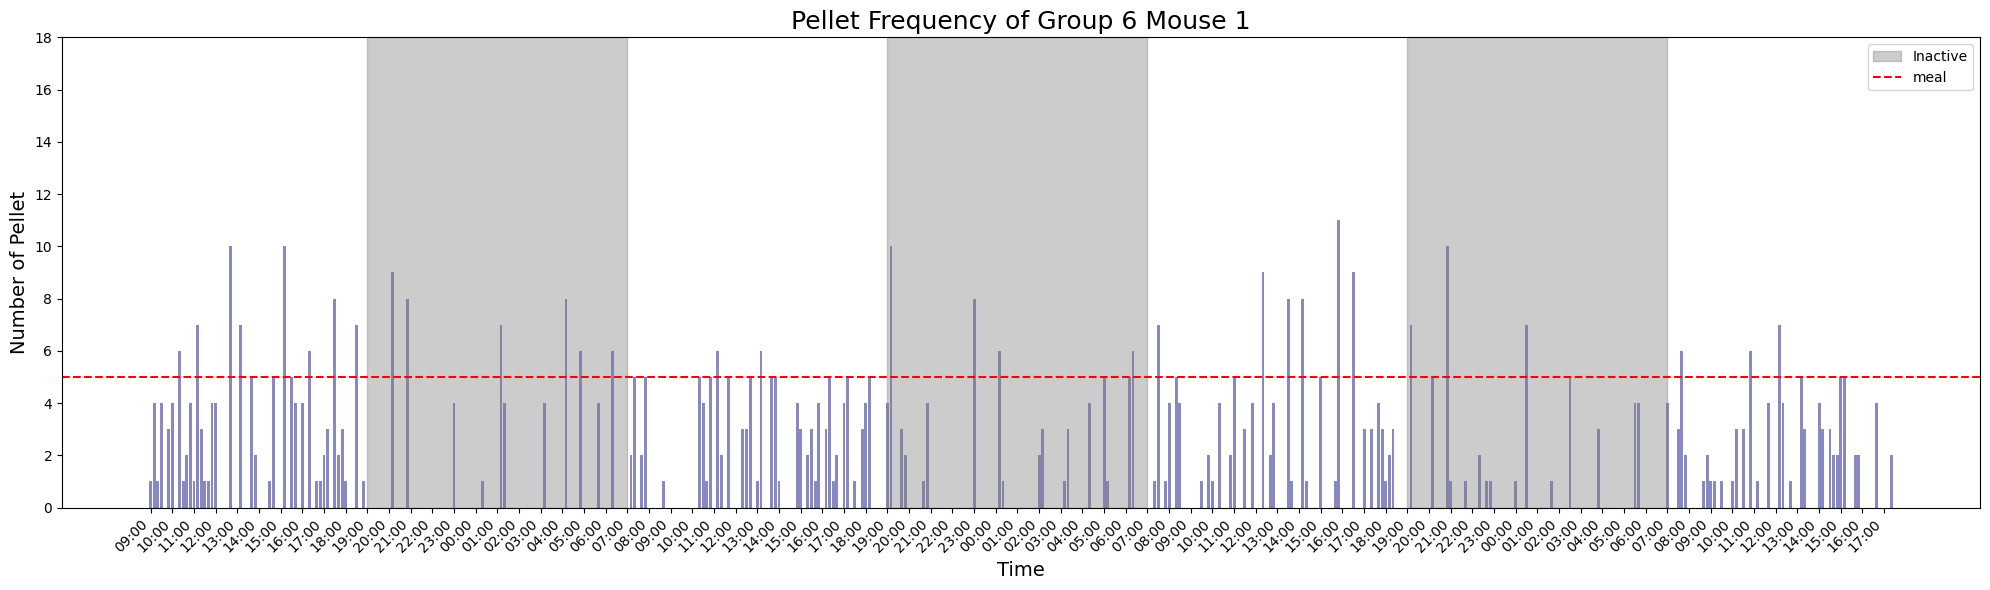

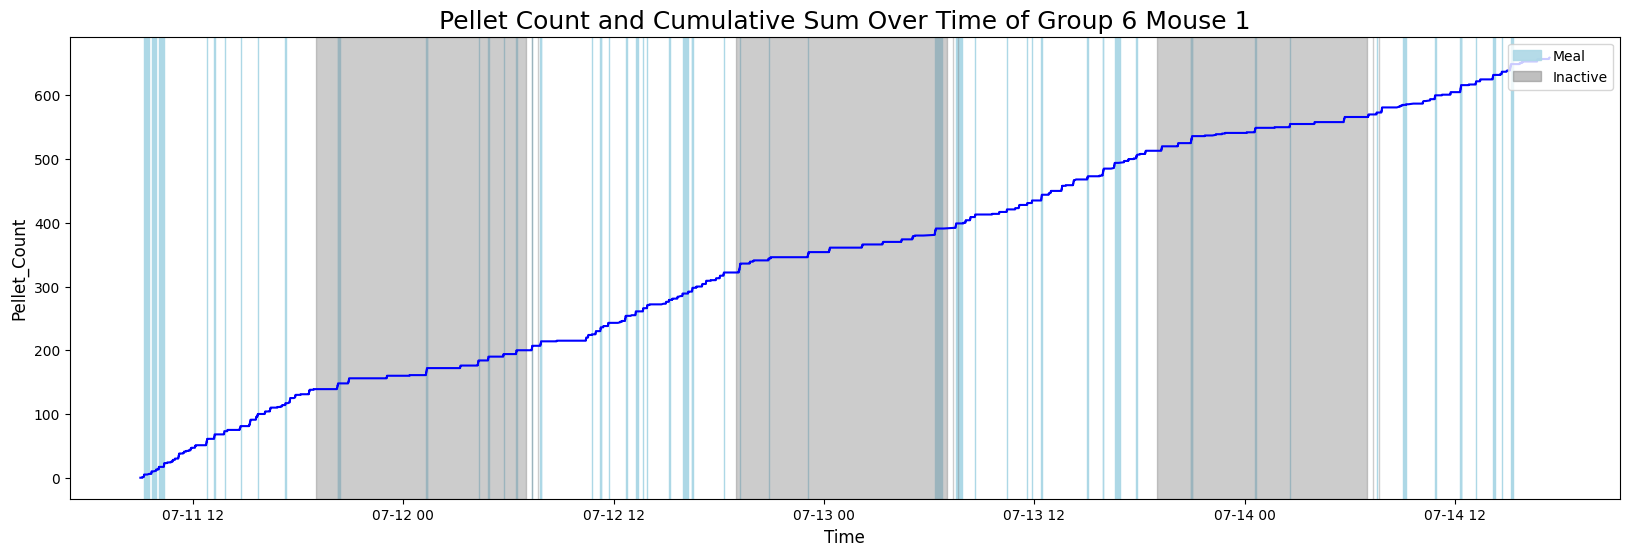

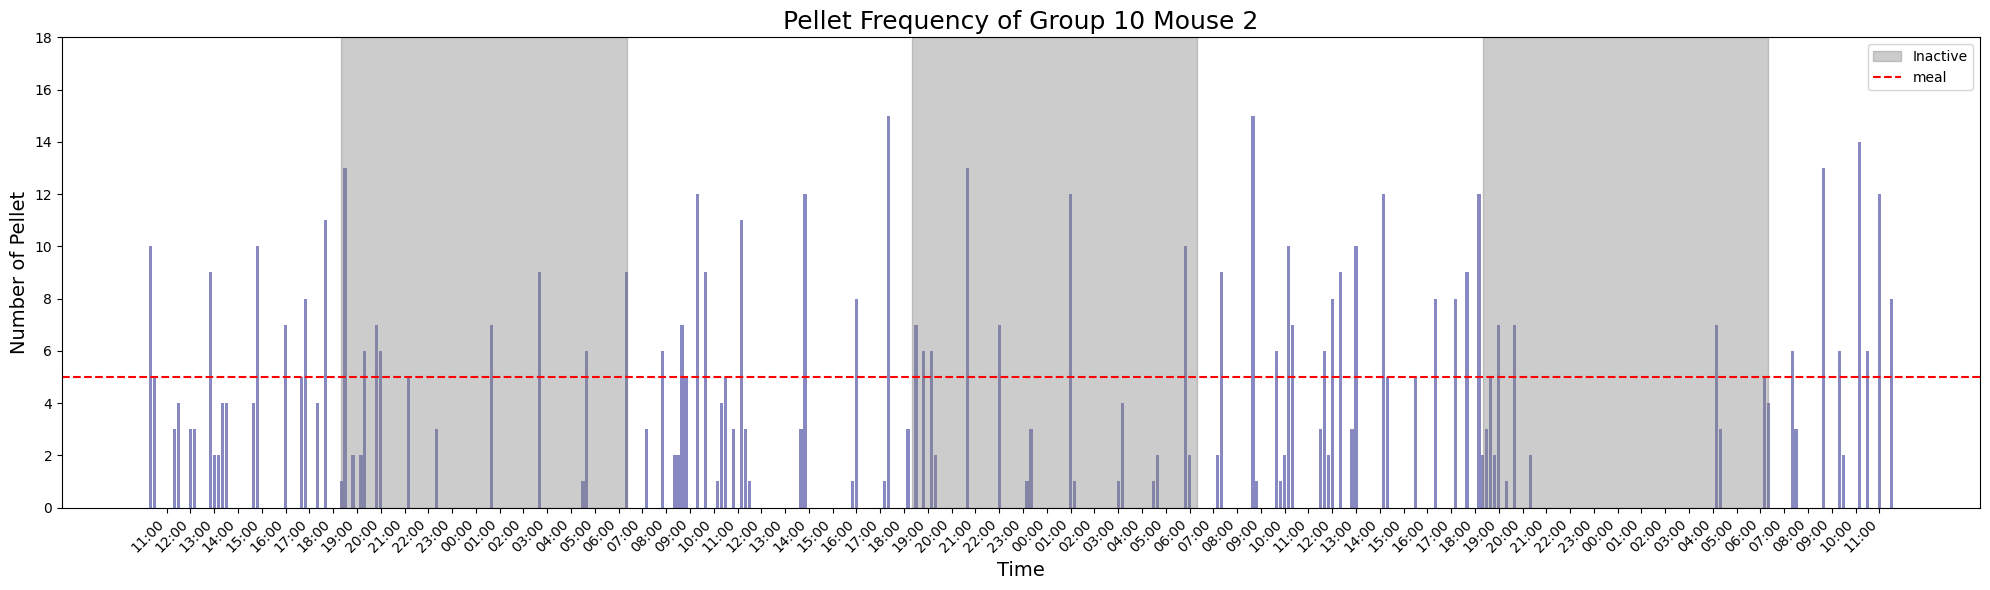

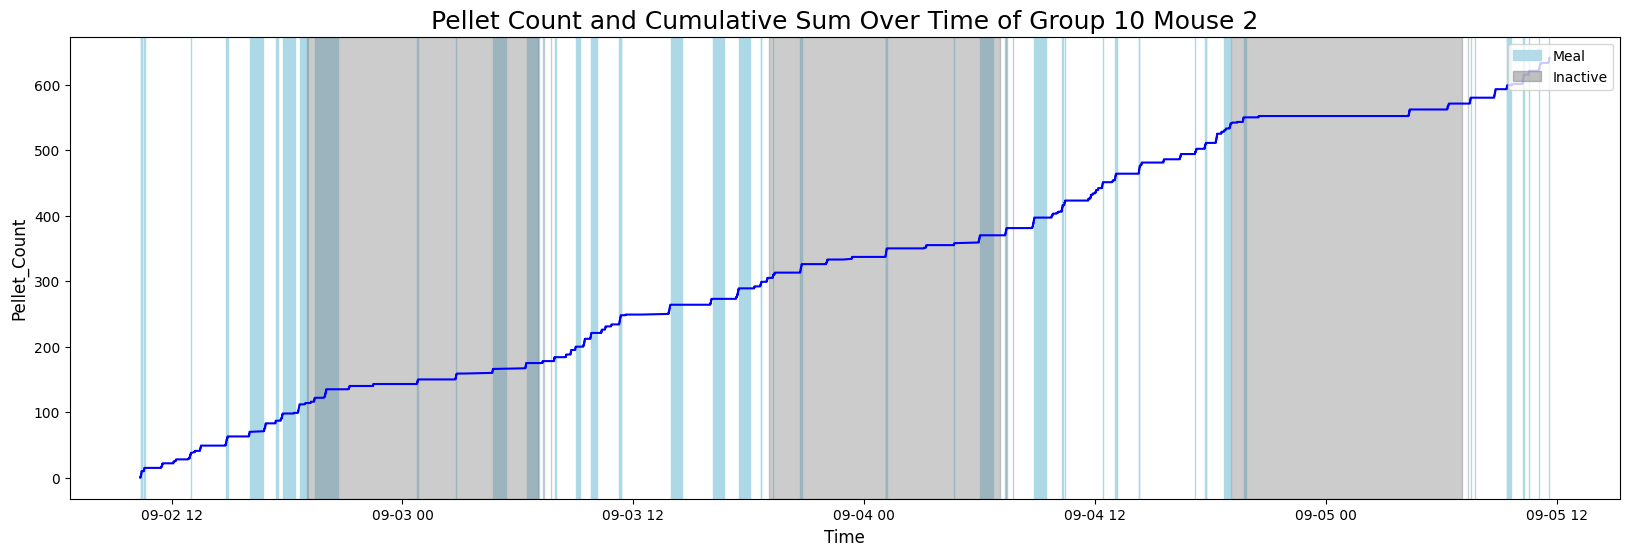

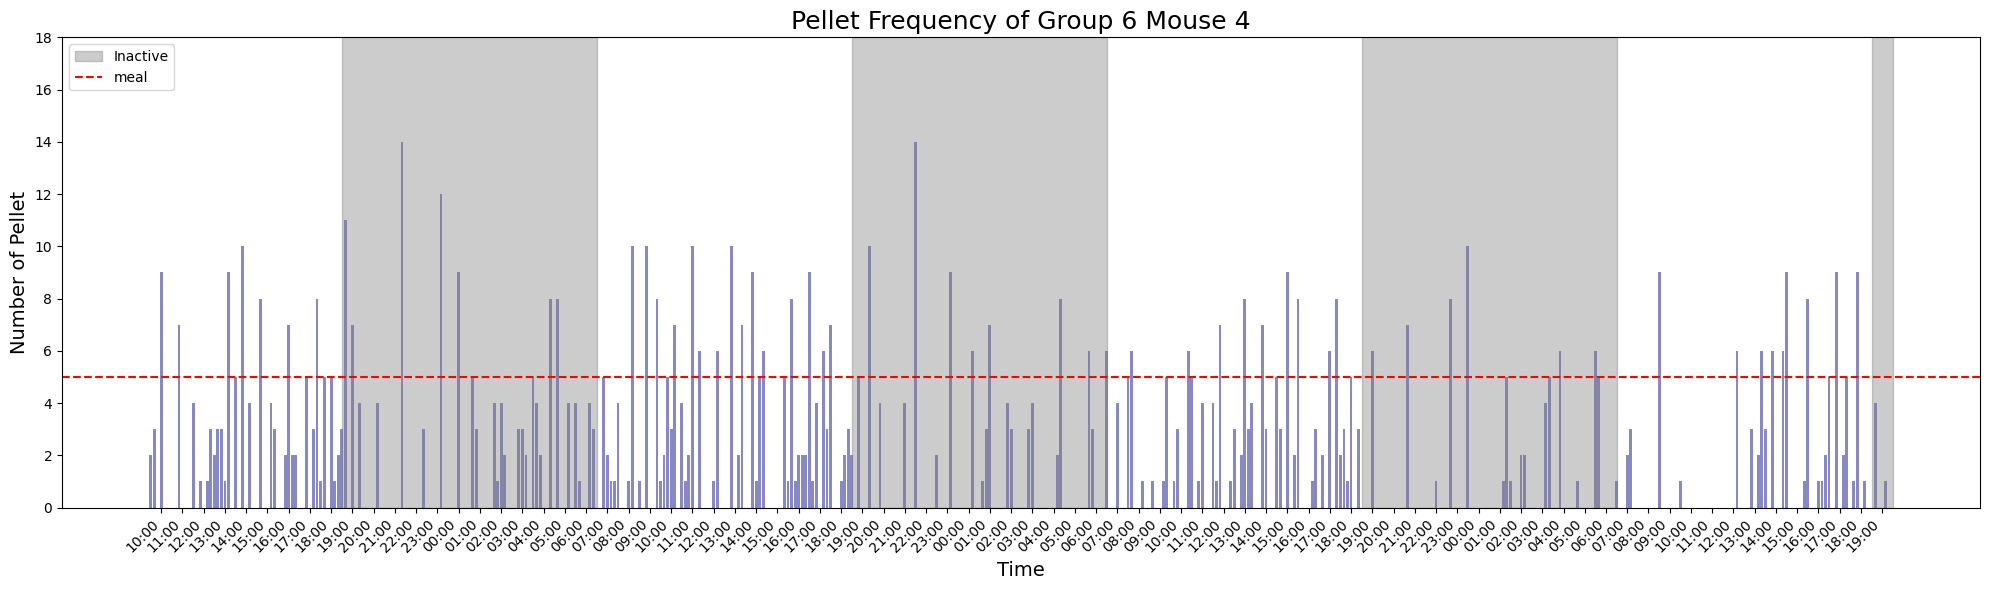

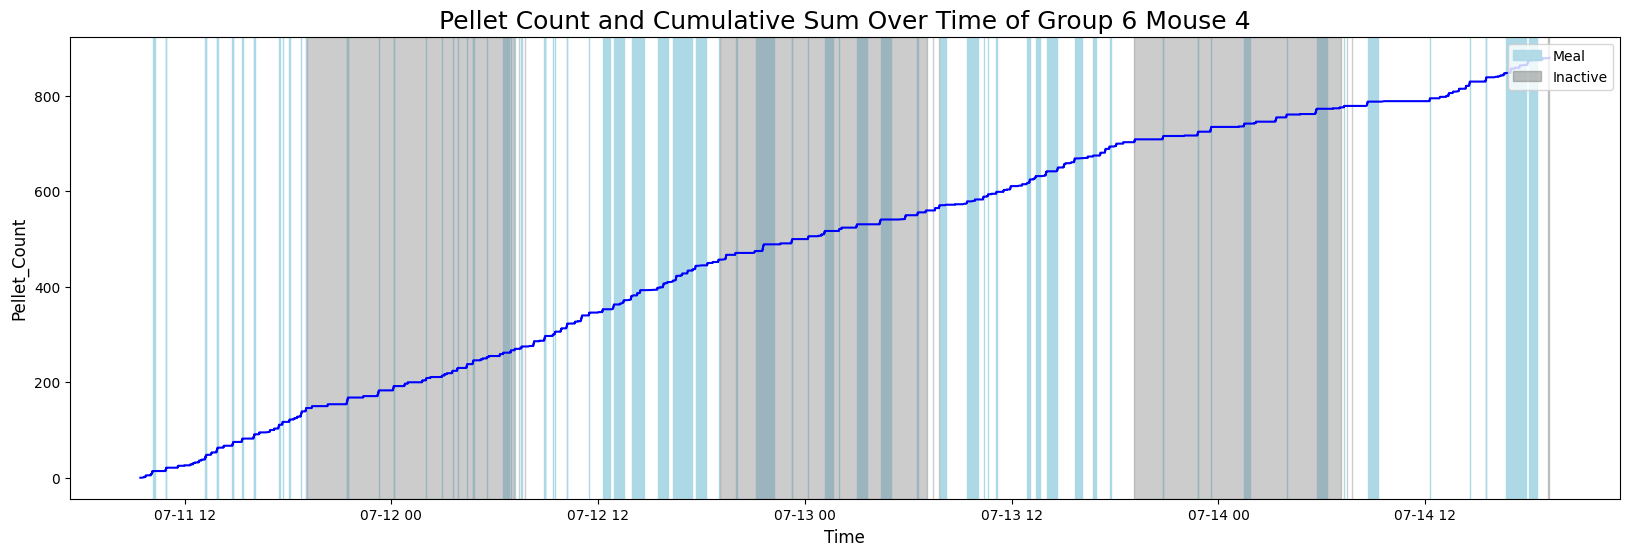

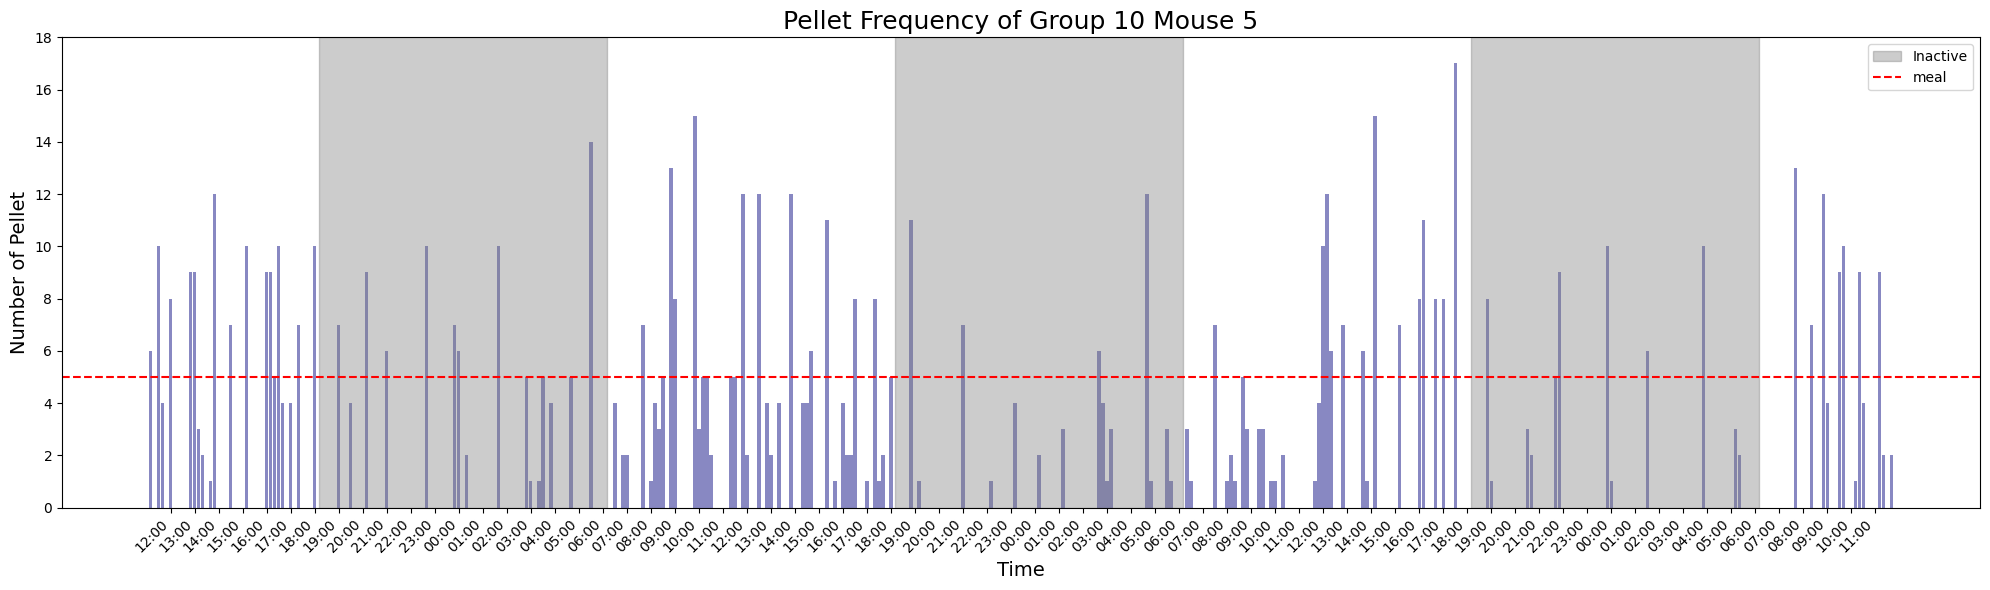

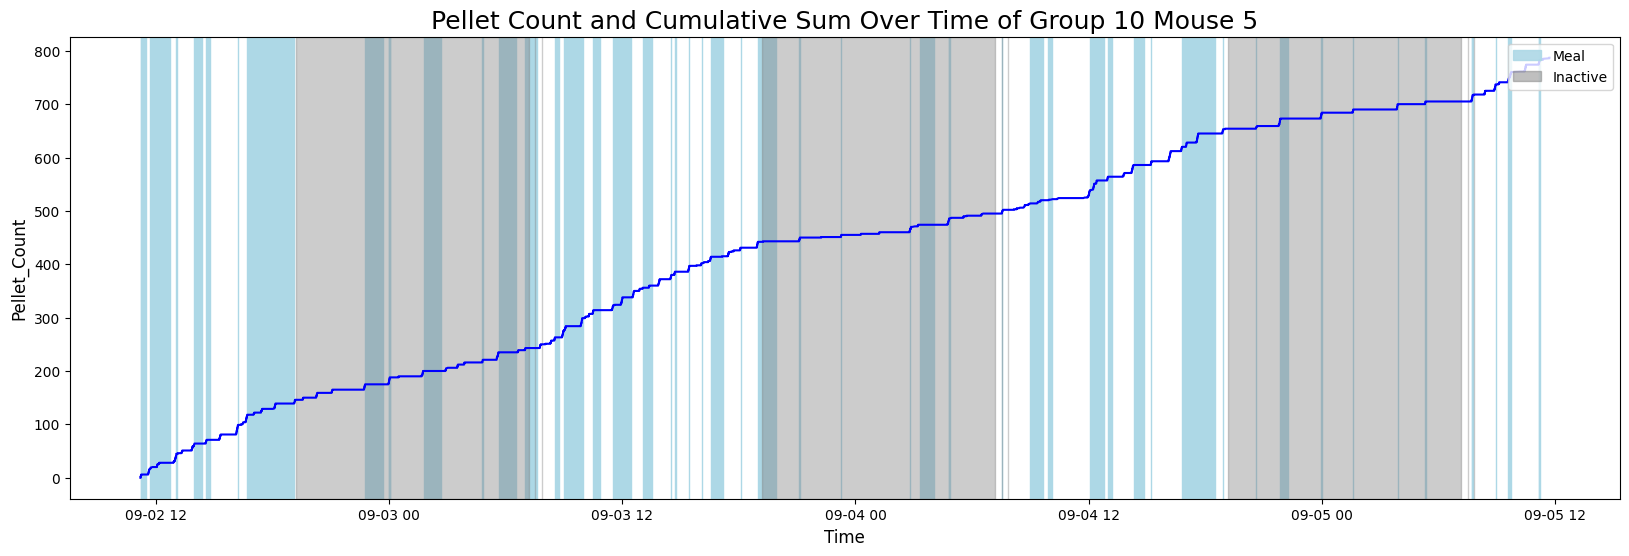

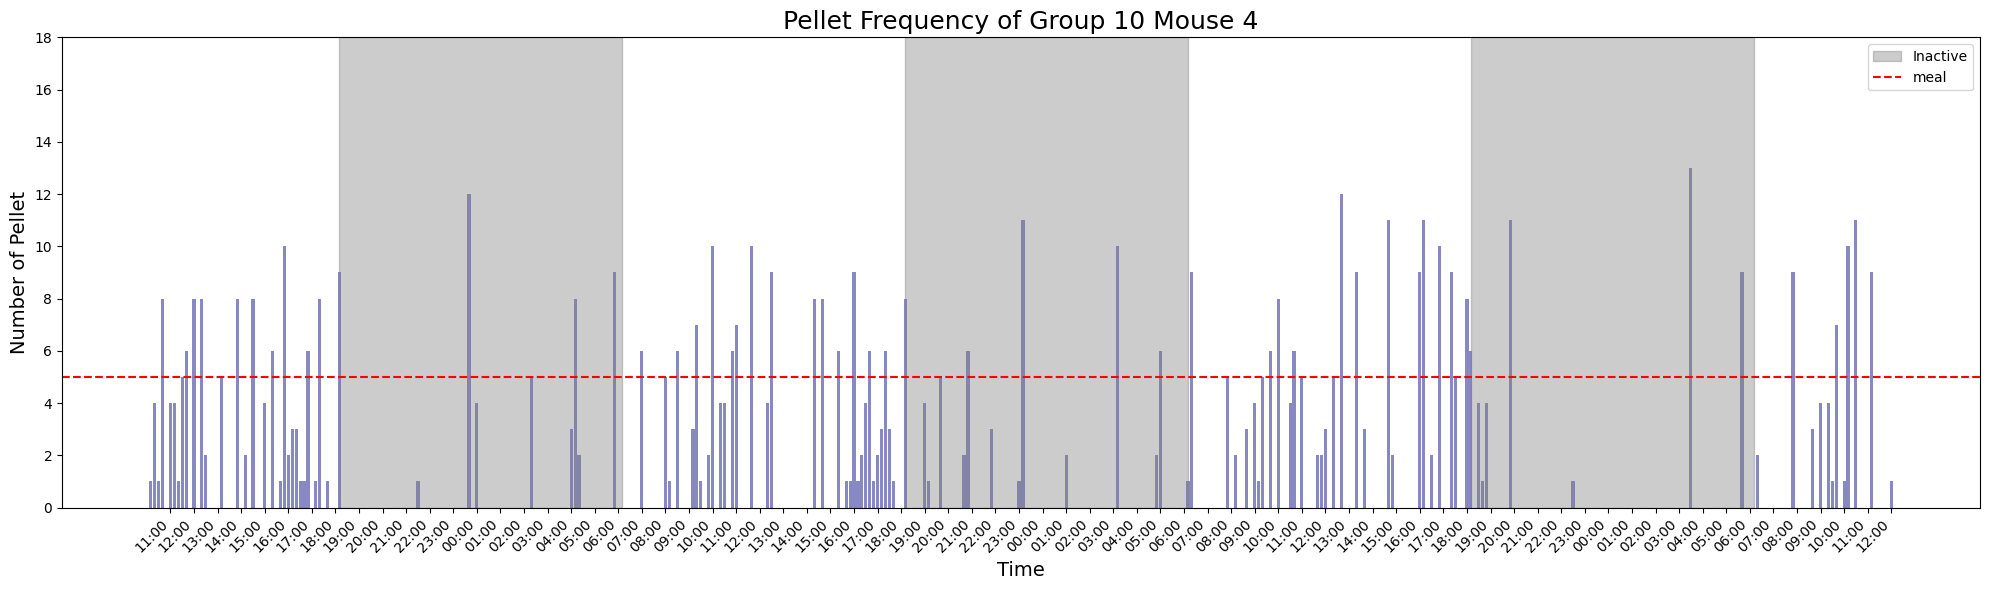

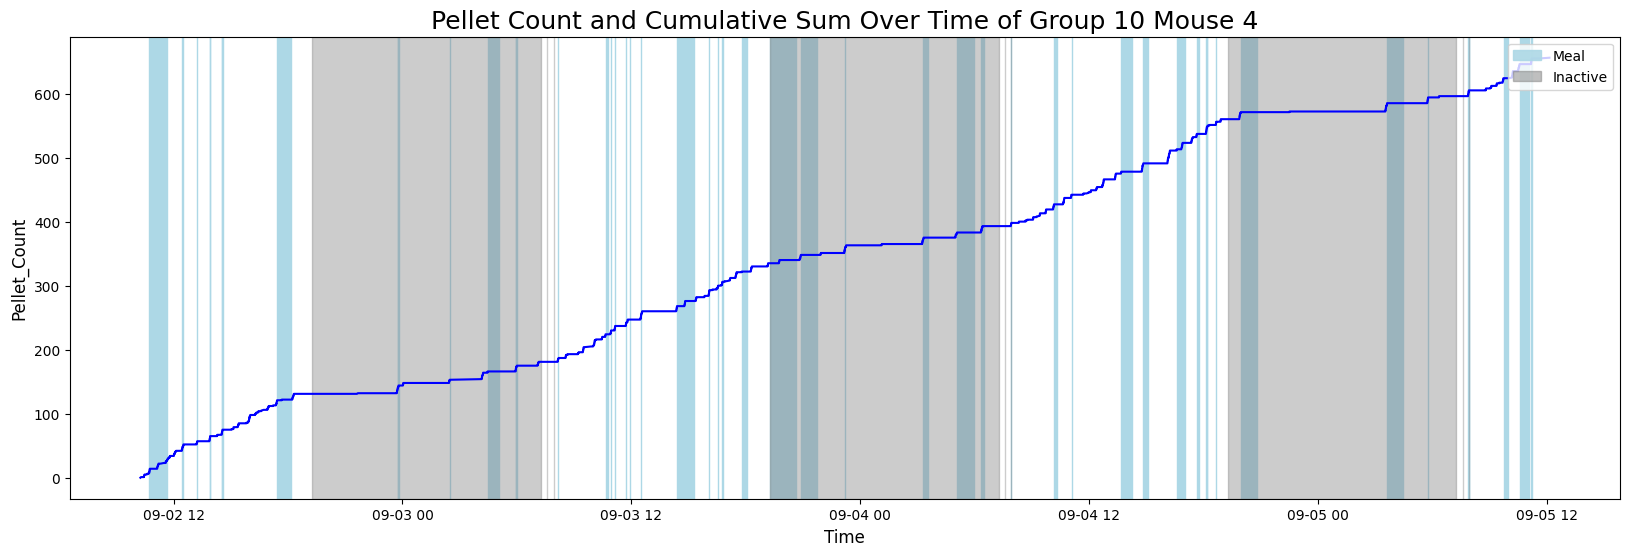

In [3]:
cask_avg_pellet = [] # pellet per hour
cask_dark_meals = [] # percentage of meals in inactive/dark phase
cask_fir_meal = []
flip_cask_meal_count = []

for sheet in cask_sheets:
    data = read_excel_by_sheet(sheet, cask_path, cumulative_accuracy=False)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    meal, meal_pellet_cnt, meal_acc = ml.find_meals_paper(data, time_threshold=time_threshold, pellet_threshold=pellet_threshold)
    avg = round(len(meal) / ml.experiment_duration(data), 2)
    val_idx = next((i for i, x in enumerate(meal_acc) if x >= 60), -1) # find first meal that has >60% accuracy
    meal_1 = (meal[1][0] - data['Time'][0]).total_seconds() / 3600
    cask_fir_meal.append(meal_1)
    flip_cask_meal_count.append(avg)
    cask_avg_pellet.append(ml.average_pellet(group))
    cask_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num)
    ml.graphing_cum_count(data, meal, bhv, num, flip=True)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import intervals as invs
import warnings

warnings.filterwarnings('ignore')
alpha = 0.1

### Meal Analysis

In [5]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [6]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  6.6779992471694575e-09
There is a significant difference between the two groups.


In [7]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  1.07283201203023e-14
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [8]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.08012713793009962
There is no significant difference between the two groups.


In [9]:
flip_cask_meal_count

[18.72,
 14.76,
 27.49,
 24.71,
 20.92,
 24.41,
 18.54,
 25.36,
 15.99,
 19.38,
 20.64,
 18.61,
 20.3,
 20.32,
 27.88,
 22.83,
 18.19]

#### Inactive and active meal between group

In [10]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.4917463697186134
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Control Size: 19
CASK Size: 17
Control Average: 185.0536842105263
CASK Average: 225.6070588235294
Control Standard Deviation: 33.29382645652132
CASK Standard Deviation: 30.22001670348353


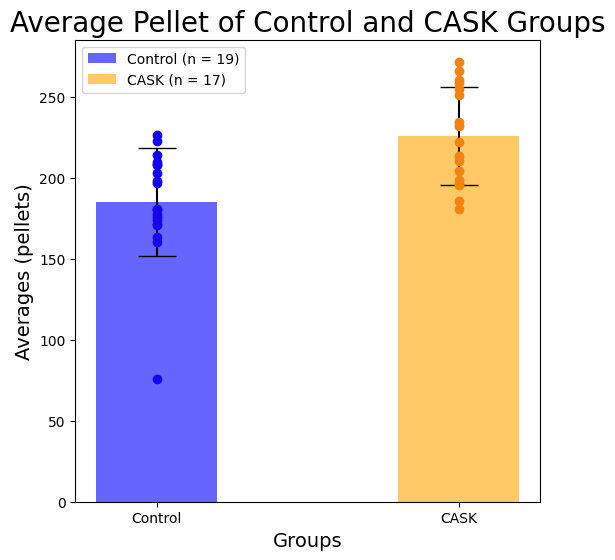

In [11]:
ml.graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', unit='pellets', exp_name='CASK')

In [12]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='greater')

P Value is  0.0002782863170801436
Experiment group is significantly greater than control group


#### Time needed to start the first meal

Control Size: 19
CASK Size: 17
Control Average: 1.399248538011696
CASK Average: 1.6579934640522875
Control Standard Deviation: 1.1322132928276205
CASK Standard Deviation: 1.187399736488884


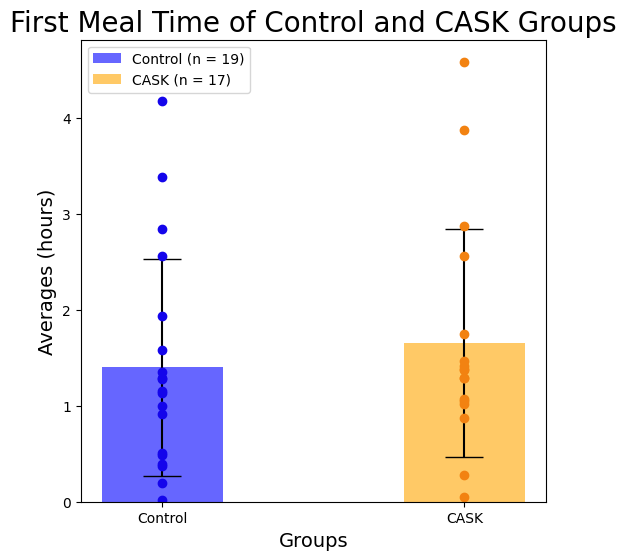

In [13]:
ml.graph_group_stats(ctrl_fir_meal, cask_fir_meal, stats_name='First Meal Time', unit='hours', exp_name='CASK')

In [14]:
invs.perform_T_test(ctrl_fir_meal, cask_fir_meal, test_side='less')

P Value is  0.7459914223901927
There is no significant difference between the two groups.
